# Aplicando algoritmos de Machine Learning

In [1]:
# Se importan las librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Buscando correlaciones

In [2]:
df = pd.read_csv('DataSet.csv')

In [3]:
corr_matrix = df.iloc[:,4:].corr()

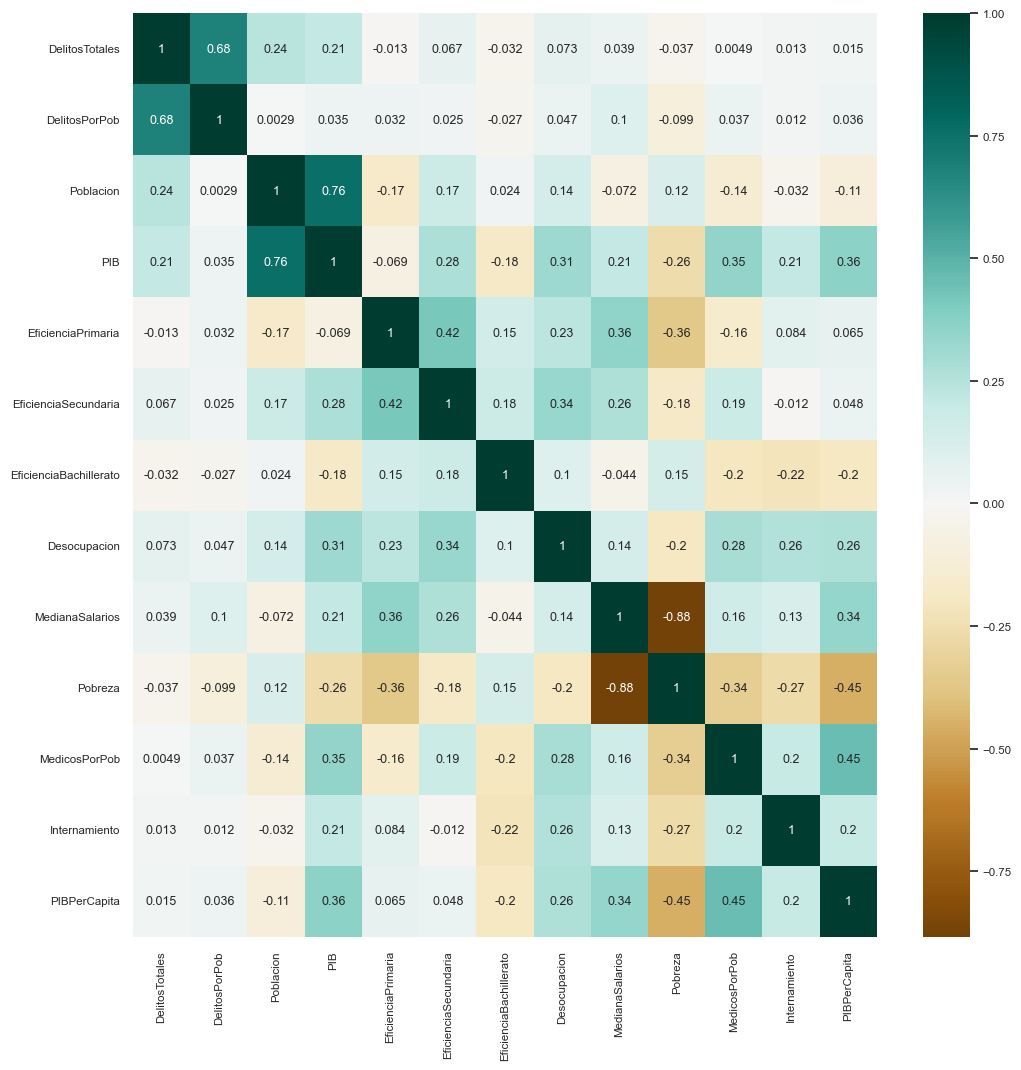

In [4]:
sns.set(font_scale= 0.75)
plt.figure(figsize=(12, 12))
sns.heatmap(corr_matrix, annot = True , cmap = 'BrBG', center=0)
plt.xticks(rotation = 90)
plt.savefig('corr_matrix.png', dpi = 200, bbox_inches = 'tight')
plt.show()

In [5]:
corr_matrix['DelitosTotales'].sort_values(ascending=False)

DelitosTotales            1.000000
DelitosPorPob             0.682484
Poblacion                 0.235152
PIB                       0.209514
Desocupacion              0.072871
EficienciaSecundaria      0.066541
MedianaSalarios           0.039230
PIBPerCapita              0.015157
Internamiento             0.012720
MedicosPorPob             0.004936
EficienciaPrimaria       -0.012883
EficienciaBachillerato   -0.031730
Pobreza                  -0.036581
Name: DelitosTotales, dtype: float64

In [6]:
corr_matrix['DelitosPorPob'].sort_values(ascending=False)

DelitosPorPob             1.000000
DelitosTotales            0.682484
MedianaSalarios           0.099643
Desocupacion              0.046996
MedicosPorPob             0.037203
PIBPerCapita              0.035597
PIB                       0.035082
EficienciaPrimaria        0.031823
EficienciaSecundaria      0.025143
Internamiento             0.012000
Poblacion                 0.002909
EficienciaBachillerato   -0.027279
Pobreza                  -0.099344
Name: DelitosPorPob, dtype: float64

### Seleccionando 4 tipos de delito

Observamos la incidencia nacional de los tipos de delito en el periodo de 2015 a 2023

In [7]:
df.groupby('Tipo de delito')['DelitosTotales'].sum().sort_values(ascending=False)

Tipo de delito
Robo                                                                             6125184.0
Violencia familiar                                                               1870093.0
Lesiones                                                                         1842775.0
Otros delitos del Fuero Común                                                    1659335.0
Daño a la propiedad                                                              1194847.0
Amenazas                                                                          927133.0
Fraude                                                                            711521.0
Narcomenudeo                                                                      571962.0
Homicidio                                                                         369566.0
Despojo                                                                           244777.0
Abuso de confianza                                                         

En este trabajo se analizarán 4 de los delitos más importantes según el IPM: Homicidios, Robos, Violencia familiar y Delitos sexuales. Se analizará la incidencia y la incidencia por cada 100 mil habitantes para cada uno de estos delitos.

Los Robos y Violencia familiar se pueden filtrar de manera directa:

In [8]:
df_robos = df[df['Tipo de delito'] == 'Robo']
df_robos = df_robos.drop(['Entidad', 'Tipo de delito'], axis=1)
df_robos.head(3)

Año  Clave_Ent  DelitosTotales  DelitosPorPob  Poblacion       PIB  \
32   2015          1         10719.0     821.189587  1305301.5  294497.0   
72   2015          2         48838.0    1410.669128  3462045.0  795081.0   
112  2015          3          9113.0    1269.686020   717736.5  156072.0   

     EficienciaPrimaria  EficienciaSecundaria  EficienciaBachillerato  \
32             99.48262              83.13134                66.79740   
72             98.14218              85.34541                59.74364   
112           100.85804              85.19199                63.96079   

     Desocupacion  MedianaSalarios   Pobreza  MedicosPorPob  Internamiento  \
32       4.503325      4696.703957  34.76592        1.90087       68.36443   
72       4.168160      5334.876700  28.59798        1.58419      265.21865   
112      4.786112      5887.002212  30.26271        2.33295       37.16185   

      PIBPerCapita  
32   225616.074141  
72   229656.460271  
112  217450.275972

In [9]:
df_viol_fam = df[df['Tipo de delito'] == 'Violencia familiar']
df_viol_fam = df_viol_fam.drop(['Entidad', 'Tipo de delito'], axis=1)
df_viol_fam.head(3)

Año  Clave_Ent  DelitosTotales  DelitosPorPob  Poblacion       PIB  \
39   2015          1           481.0      36.849724  1305301.5  294497.0   
79   2015          2          8892.0     256.842415  3462045.0  795081.0   
119  2015          3          1691.0     235.601784   717736.5  156072.0   

     EficienciaPrimaria  EficienciaSecundaria  EficienciaBachillerato  \
39             99.48262              83.13134                66.79740   
79             98.14218              85.34541                59.74364   
119           100.85804              85.19199                63.96079   

     Desocupacion  MedianaSalarios   Pobreza  MedicosPorPob  Internamiento  \
39       4.503325      4696.703957  34.76592        1.90087       68.36443   
79       4.168160      5334.876700  28.59798        1.58419      265.21865   
119      4.786112      5887.002212  30.26271        2.33295       37.16185   

      PIBPerCapita  
39   225616.074141  
79   229656.460271  
119  217450.275972

Los delitos sexuales se componen de la suma de las categorías 'Abuso sexual', 'Acoso sexual', 'Hostigamiento sexual', 'Violación simple' y 'Violación equiparada', por lo que es necesario un procedimiento diferente para obtener el dataframe

In [10]:
ds = ['Abuso sexual', 'Acoso sexual', 'Hostigamiento sexual', 'Violación simple', 'Violación equiparada']

In [11]:
# Se crea una mascara y se filtra el dataframe principal
mask = (df['Tipo de delito'] == ds[0]) | (df['Tipo de delito'] == ds[1]) | (df['Tipo de delito'] == ds[2]) | (df['Tipo de delito'] == ds[3]) | (df['Tipo de delito'] == ds[4])
df_delitos_s = df[mask]
df_delitos_s.head(8)

Año  Clave_Ent          Entidad        Tipo de delito  DelitosTotales  \
2   2015          1   Aguascalientes          Abuso sexual            18.0   
3   2015          1   Aguascalientes          Acoso sexual             0.0   
19  2015          1   Aguascalientes  Hostigamiento sexual            11.0   
36  2015          1   Aguascalientes  Violación equiparada            41.0   
37  2015          1   Aguascalientes      Violación simple            84.0   
42  2015          2  Baja California          Abuso sexual          1247.0   
43  2015          2  Baja California          Acoso sexual             0.0   
59  2015          2  Baja California  Hostigamiento sexual           115.0   

    DelitosPorPob  Poblacion       PIB  EficienciaPrimaria  \
2        1.378992  1305301.5  294497.0            99.48262   
3        0.000000  1305301.5  294497.0            99.48262   
19       0.842717  1305301.5  294497.0            99.48262   
36       3.141037  1305301.5  294497.0            99.48262   
37       6.435295  1305301.5  294497.0            99.48262   
42      36.019174  3462045.0  795081.0            98.14218   
43       0.000000  3462045.0  795081.0            98.14218   
59       3.321736  3462045.0  795081.0            98.14218   

    EficienciaSecundaria  EficienciaBachillerato  Desocupacion  \
2               83.13134                66.79740      4.503325   
3               83.13134                66.79740      4.503325   
19              83.13134                66.79740      4.503325   
36              83.13134                66.79740      4.503325   
37              83.13134                66.79740      4.503325   
42              85.34541                59.74364      4.168160   
43              85.34541                59.74364      4.168160   
59              85.34541                59.74364      4.168160   

    MedianaSalarios   Pobreza  MedicosPorPob  Internamiento   PIBPerCapita  
2       4696.703957  34.76592        1.90087       68.36443  225616.074141  
3       4696.703957  34.76592        1.90087       68.36443  225616.074141  
19      4696.703957  34.76592        1.90087       68.36443  225616.074141  
36      4696.703957  34.76592        1.90087       68.36443  225616.074141  
37      4696.703957  34.76592        1.90087       68.36443  225616.074141  
42      5334.876700  28.59798        1.58419      265.21865  229656.460271  
43      5334.876700  28.59798        1.58419      265.21865  229656.460271  
59      5334.876700  28.59798        1.58419      265.21865  229656.460271

Se obtiene la suma de los delitos sexuales por año y entidad federativa. Nótese que es posible aplicar esta operacion a 'DelitosPorPob' dado que el ponderado de una suma es igual a la suma de los ponderados

In [12]:
df_delitos_s = df_delitos_s.groupby(['Año', 'Clave_Ent'])[['DelitosTotales', 'DelitosPorPob']].sum().reset_index()
df_delitos_s.head(3)

Año  Clave_Ent  DelitosTotales  DelitosPorPob
0  2015          1           154.0      11.798041
1  2015          2          2443.0      70.565230
2  2015          3           246.0      34.274417

Se agregan nuevamente los demás parámetros. Nótese que estos parámetros no dependen del tipo de delito sino de la entidad federativa y el año, por lo que son iguales para los cuetro tipos de delito seleccionados

In [13]:
df_delitos_s = pd.merge(df_delitos_s, df_robos.drop(df_robos.iloc[:,2:4], axis=1), on=['Clave_Ent', 'Año'], how='inner')
df_delitos_s.head(3)

Año  Clave_Ent  DelitosTotales  DelitosPorPob  Poblacion       PIB  \
0  2015          1           154.0      11.798041  1305301.5  294497.0   
1  2015          2          2443.0      70.565230  3462045.0  795081.0   
2  2015          3           246.0      34.274417   717736.5  156072.0   

   EficienciaPrimaria  EficienciaSecundaria  EficienciaBachillerato  \
0            99.48262              83.13134                66.79740   
1            98.14218              85.34541                59.74364   
2           100.85804              85.19199                63.96079   

   Desocupacion  MedianaSalarios   Pobreza  MedicosPorPob  Internamiento  \
0      4.503325      4696.703957  34.76592        1.90087       68.36443   
1      4.168160      5334.876700  28.59798        1.58419      265.21865   
2      4.786112      5887.002212  30.26271        2.33295       37.16185   

    PIBPerCapita  
0  225616.074141  
1  229656.460271  
2  217450.275972

La definición de homicidio utilizada en este trabajo no toma en cuenta el género, por lo que es necesario combinar las categorías "Homicidio" y "Feminicidio".

In [14]:
# df_homicidios = df[df['Tipo de delito'] == 'Homicidio']
# df_homicidios = df_homicidios.drop(['Entidad', 'Tipo de delito'], axis=1)
# df_homicidios.head(3)

In [15]:
df_homicidios = df[(df['Tipo de delito'] == 'Homicidio') | (df['Tipo de delito'] == 'Feminicidio')]
df_homicidios.head(6)

Año  Clave_Ent              Entidad Tipo de delito  DelitosTotales  \
16  2015          1       Aguascalientes    Feminicidio             0.0   
18  2015          1       Aguascalientes      Homicidio           211.0   
56  2015          2      Baja California    Feminicidio            10.0   
58  2015          2      Baja California      Homicidio          1219.0   
96  2015          3  Baja California Sur    Feminicidio             0.0   
98  2015          3  Baja California Sur      Homicidio           201.0   

    DelitosPorPob  Poblacion       PIB  EficienciaPrimaria  \
16       0.000000  1305301.5  294497.0            99.48262   
18      16.164848  1305301.5  294497.0            99.48262   
56       0.288847  3462045.0  795081.0            98.14218   
58      35.210403  3462045.0  795081.0            98.14218   
96       0.000000   717736.5  156072.0           100.85804   
98      28.004706   717736.5  156072.0           100.85804   

    EficienciaSecundaria  EficienciaBachillerato  Desocupacion  \
16              83.13134                66.79740      4.503325   
18              83.13134                66.79740      4.503325   
56              85.34541                59.74364      4.168160   
58              85.34541                59.74364      4.168160   
96              85.19199                63.96079      4.786112   
98              85.19199                63.96079      4.786112   

    MedianaSalarios   Pobreza  MedicosPorPob  Internamiento   PIBPerCapita  
16      4696.703957  34.76592        1.90087       68.36443  225616.074141  
18      4696.703957  34.76592        1.90087       68.36443  225616.074141  
56      5334.876700  28.59798        1.58419      265.21865  229656.460271  
58      5334.876700  28.59798        1.58419      265.21865  229656.460271  
96      5887.002212  30.26271        2.33295       37.16185  217450.275972  
98      5887.002212  30.26271        2.33295       37.16185  217450.275972

In [16]:
df_homicidios = df_homicidios.groupby(['Año', 'Clave_Ent'])[['DelitosTotales', 'DelitosPorPob']].sum().reset_index()
df_homicidios.head(3)

Año  Clave_Ent  DelitosTotales  DelitosPorPob
0  2015          1           211.0      16.164848
1  2015          2          1229.0      35.499250
2  2015          3           201.0      28.004706

In [17]:
df_homicidios = pd.merge(df_homicidios, df_robos.drop(df_robos.iloc[:,2:4], axis=1), on=['Clave_Ent', 'Año'], how='inner')
df_homicidios.head(3)

Año  Clave_Ent  DelitosTotales  DelitosPorPob  Poblacion       PIB  \
0  2015          1           211.0      16.164848  1305301.5  294497.0   
1  2015          2          1229.0      35.499250  3462045.0  795081.0   
2  2015          3           201.0      28.004706   717736.5  156072.0   

   EficienciaPrimaria  EficienciaSecundaria  EficienciaBachillerato  \
0            99.48262              83.13134                66.79740   
1            98.14218              85.34541                59.74364   
2           100.85804              85.19199                63.96079   

   Desocupacion  MedianaSalarios   Pobreza  MedicosPorPob  Internamiento  \
0      4.503325      4696.703957  34.76592        1.90087       68.36443   
1      4.168160      5334.876700  28.59798        1.58419      265.21865   
2      4.786112      5887.002212  30.26271        2.33295       37.16185   

    PIBPerCapita  
0  225616.074141  
1  229656.460271  
2  217450.275972

### Correlación en homicidios

In [18]:
corr_homicidios = df_homicidios.iloc[:,2:].corr()

In [19]:
corr_homicidios['DelitosTotales'].sort_values(ascending=False)

DelitosTotales            1.000000
Poblacion                 0.703861
PIB                       0.483027
DelitosPorPob             0.439694
MedianaSalarios           0.077857
Pobreza                   0.058567
EficienciaSecundaria     -0.020936
Internamiento            -0.079354
Desocupacion             -0.093835
EficienciaBachillerato   -0.097618
PIBPerCapita             -0.191572
MedicosPorPob            -0.288129
EficienciaPrimaria       -0.310791
Name: DelitosTotales, dtype: float64

In [20]:
corr_homicidios['DelitosPorPob'].sort_values(ascending=False)

DelitosPorPob             1.000000
DelitosTotales            0.439694
MedianaSalarios           0.213874
Internamiento            -0.034596
MedicosPorPob            -0.058147
EficienciaBachillerato   -0.093564
Pobreza                  -0.113373
PIBPerCapita             -0.144350
Poblacion                -0.158352
PIB                      -0.184330
EficienciaSecundaria     -0.188518
Desocupacion             -0.209955
EficienciaPrimaria       -0.235532
Name: DelitosPorPob, dtype: float64

### Correlación en robos

In [21]:
corr_robos = df_robos.iloc[:,2:].corr()

In [22]:
corr_robos['DelitosTotales'].sort_values(ascending=False)

DelitosTotales            1.000000
Poblacion                 0.866312
PIB                       0.757810
DelitosPorPob             0.479526
Desocupacion              0.284003
EficienciaSecundaria      0.206752
MedianaSalarios           0.069077
Internamiento             0.046037
PIBPerCapita              0.041787
MedicosPorPob             0.040784
EficienciaPrimaria       -0.056699
Pobreza                  -0.081172
EficienciaBachillerato   -0.113702
Name: DelitosTotales, dtype: float64

In [23]:
corr_robos['DelitosPorPob'].sort_values(ascending=False)

DelitosPorPob             1.000000
DelitosTotales            0.479526
MedianaSalarios           0.346228
Desocupacion              0.323634
PIB                       0.235630
EficienciaPrimaria        0.170843
MedicosPorPob             0.159644
PIBPerCapita              0.145471
Poblacion                 0.109968
EficienciaSecundaria      0.071652
Internamiento             0.070375
EficienciaBachillerato   -0.103859
Pobreza                  -0.369362
Name: DelitosPorPob, dtype: float64

### Correlación en violencia familiar

In [24]:
corr_viol_fam = df_viol_fam.iloc[:,2:].corr()

In [25]:
corr_viol_fam['DelitosTotales'].sort_values(ascending=False)

DelitosTotales            1.000000
PIB                       0.826902
Poblacion                 0.613032
DelitosPorPob             0.497441
EficienciaSecundaria      0.357172
MedianaSalarios           0.335329
MedicosPorPob             0.249955
Desocupacion              0.230816
PIBPerCapita              0.228808
Internamiento             0.146317
EficienciaPrimaria       -0.031196
EficienciaBachillerato   -0.147288
Pobreza                  -0.315127
Name: DelitosTotales, dtype: float64

In [26]:
corr_viol_fam['DelitosPorPob'].sort_values(ascending=False)

DelitosPorPob             1.000000
MedianaSalarios           0.581473
DelitosTotales            0.497441
MedicosPorPob             0.283884
EficienciaSecundaria      0.256995
PIBPerCapita              0.196051
PIB                       0.148496
Desocupacion              0.132446
EficienciaPrimaria        0.089575
Internamiento             0.089373
Poblacion                -0.124674
EficienciaBachillerato   -0.131483
Pobreza                  -0.546900
Name: DelitosPorPob, dtype: float64

### Correlación en delitos sexuales

In [27]:
corr_delitos_s = df_delitos_s.iloc[:,2:].corr()

In [28]:
corr_delitos_s['DelitosTotales'].sort_values(ascending=False)

DelitosTotales            1.000000
Poblacion                 0.743338
PIB                       0.731755
DelitosPorPob             0.483080
EficienciaSecundaria      0.275870
MedianaSalarios           0.258278
Desocupacion              0.153478
PIBPerCapita              0.098839
MedicosPorPob             0.067772
Internamiento             0.032009
EficienciaPrimaria       -0.042757
EficienciaBachillerato   -0.108904
Pobreza                  -0.214147
Name: DelitosTotales, dtype: float64

In [29]:
corr_delitos_s['DelitosPorPob'].sort_values(ascending=False)

DelitosPorPob             1.000000
MedianaSalarios           0.634398
DelitosTotales            0.483080
EficienciaSecundaria      0.263732
PIBPerCapita              0.241885
PIB                       0.180261
EficienciaPrimaria        0.177191
MedicosPorPob             0.133000
Internamiento            -0.005244
Desocupacion             -0.007612
Poblacion                -0.013234
EficienciaBachillerato   -0.170466
Pobreza                  -0.534161
Name: DelitosPorPob, dtype: float64

## Homicidios

Se seleccionan los atributos de entrenamiento y las etiquetas de la regresion

In [30]:
features = ['Poblacion', 'PIB', 'EficienciaPrimaria', 'EficienciaSecundaria', 'EficienciaBachillerato', 
            'Desocupacion', 'MedianaSalarios', 'Pobreza', 'MedicosPorPob', 'Internamiento', 'PIBPerCapita']

In [31]:
X = df_homicidios[features]
y = df_homicidios['DelitosTotales']

Se divide el dataset en un set de entrenamiento y un set de test. El set de entrenamiento consta de todas las instancias de 2015 a 2022, mientras que el set de test corresponde a las instancias de 2023

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X.values,y.values,train_size = 0.89, shuffle = False)

Se crean listas para comparar los modelos y escoger los de mejor desempeño

In [33]:
models = ['LR', 'PR', 'RG', 'LA', 'KNN', 'LSVR', 'NLSVR', 'GSVR', 'DT', 'RF', 'ET', 'AB', 'GB']
hom_rmse = []
hom_std = []

### Regresion

#### Linear Regression

Se escala el set de entrenamiento

In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [35]:
X_train_scaled = scaler.fit_transform(X_train)

Evaluamos la regresion utilizando la funcion normal

In [36]:
X_b = np.c_[np.ones((len(X_train_scaled), 1)), X_train_scaled]

In [37]:
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y_train)

In [38]:
theta_best

array([1304.9140625 ,  347.80849221,  336.84944038, -344.13377766,
        -14.50139165,  -97.65054007,  -59.17121073,  448.51072592,
        175.21043919, -330.17802887,  -37.10138634, -181.70094337])

Evaluamos el resultado de la regresion

In [39]:
y_predict = X_b.dot(theta_best)

In [40]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
lin_mse = mean_squared_error(y_train, y_predict)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

549.9578614051005

In [41]:
y_train.mean()

1304.9140625

In [42]:
lin_rmse/y_train.mean()*100

42.14514022107111

El error representa más del 40% de la media de los datos de entrenamiento. Se evaluará su desempeño al generalizar utilizando Cross Validation

##### Cross Validation

In [43]:
def cross_validation(X, y, k):
    
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)
    X = X[indices]
    y = y[indices]

    fold_size = X.shape[0] // k
    scores = []

    for i in range(k):
        # Crear sets de entrenamiento y validacion
        start, end = i * fold_size, (i + 1) * fold_size
        X_val, y_val = X[start:end], y[start:end]
        X_train = np.concatenate([X[:start], X[end:]], axis=0)
        y_train = np.concatenate([y[:start], y[end:]], axis=0)
        
        # Entrenar el modelo
        X_train_b = np.c_[np.ones((len(X_train), 1)), X_train]
        theta_best = np.linalg.inv(X_train_b.T.dot(X_train_b)).dot(X_train_b.T).dot(y_train)
        
        # Evaluar el modelo
        
        X_val_b = np.c_[np.ones((len(X_val), 1)), X_val]
        y_predict = X_val_b.dot(theta_best)

        score = mean_squared_error(y_val, y_predict)
        score = np.sqrt(score)
        scores.append(score)
    
    return scores

In [44]:
scores = cross_validation(X_train_scaled, y_train, 5)
scores

[633.3836735043936,
 527.7126294078957,
 570.0795433887738,
 516.0787320191417,
 597.3937476066167]

In [45]:
rmse = np.mean(scores)
std = np.std(scores)
nrmse = np.mean(scores)/y_train.mean()

hom_rmse.append(rmse)
hom_std.append(std)    

print('CV_RMSE:', rmse)
print('CV_NRMSE:', nrmse)
print('CV_Standard Dev:', std)

CV_RMSE: 568.9296651853643
CV_NRMSE: 0.4359901402973534
CV_Standard Dev: 43.49232247461079


Los siguientes modelos se implementarán utilizando los regresores disponibles en la librería scikit-learn

#### Polynomial Regression

Para este modelo se utilizara la clase _LinearRegression_ de sklearn, asi como un _Pipeline_ para preparar los datos de manera mas directa

In [46]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [47]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)

In [48]:
from sklearn.pipeline import Pipeline

model_poly_regression = Pipeline([
     ("poly_features", poly_features),
    ('scaler', scaler),   
    ('regression', regression)  
])

In [49]:
model_poly_regression.fit(X_train, y_train)

Pipeline(steps=[('poly_features', PolynomialFeatures(include_bias=False)),
                ('scaler', StandardScaler()),
                ('regression', LinearRegression())])

In [50]:
y_predict = model_poly_regression.predict(X_train)

In [51]:
lin_mse = mean_squared_error(y_train, y_predict)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

351.83130417637466

In [52]:
lin_rmse/y_train.mean()*100

26.962028710329317

Se observa que este modelo presenta un mejor desempeño que el modelo lineal. Se evaluará qué tan bien generaliza utilizando la clase _CrossValidation_ de sklearn

In [53]:
from sklearn.model_selection import cross_val_score

poly_scores = cross_val_score(model_poly_regression, X_train, y_train,
                               scoring = 'neg_mean_squared_error', cv =5)

Se define una función para obtener el RMSE promedio al evaluar el modelo en _CrossValidation_

In [54]:
def display_scores(list_rmse, list_std, scores):
    rmse_scores = np.sqrt(-scores)
    rmse = rmse_scores.mean()
    std = rmse_scores.std()
    nrmse = rmse_scores.mean()/y_train.mean()
    
    list_rmse.append(rmse)
    list_std.append(std)    
    
    print('CV_Scores:', rmse_scores)
    print('CV_RMSE:', rmse)
    print('CV_NRMSE:', nrmse)
    print('CV_Standard Dev:', rmse_scores.std())

In [55]:
display_scores(hom_rmse, hom_std, poly_scores)

CV_Scores: [1707.21888845  592.13748768  828.4404766   688.87624527  848.98601278]
CV_RMSE: 933.1318221561471
CV_NRMSE: 0.7150906323811245
CV_Standard Dev: 398.29373689835774


Pese a tener una puntuación aceptable en el set de entrenamiento, el modelo no generaliza bien en datos nuevos. A continuación se presentan las curvas de aprendizaje

In [56]:
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(5, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   
    plt.xlabel("Tamaño de set de entrenamiento", fontsize=14)
    plt.ylabel("RMSE", fontsize=14) 
    plt.axis([0, 205, 0, y.mean()*1.5])

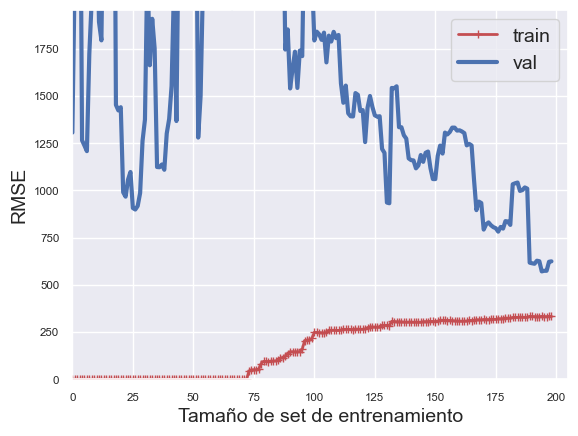

In [57]:
plot_learning_curves(model_poly_regression, X_train, y_train)
plt.show()    

Se utilizará el procedimiento anterior para evaluar el desempeño de otros modelos de regresión

#### Ridge

In [58]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky")

In [59]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)

In [60]:
model_ridge_reg = Pipeline([
    ("poly_features", poly_features),
    ('scaler', scaler),   
    ('ridge_reg', ridge_reg)  
])

In [61]:
model_ridge_reg.fit(X_train, y_train)

Pipeline(steps=[('poly_features', PolynomialFeatures(include_bias=False)),
                ('scaler', StandardScaler()),
                ('ridge_reg', Ridge(alpha=1, solver='cholesky'))])

Se define una función para el despliegue de métricas de evaluación

In [62]:
def display_metrics(model, X, y):
    y_predict = model.predict(X)
    mse = mean_squared_error(y, y_predict)
    rmse = np.sqrt(mse)
    nrmse = rmse/y.mean()
    mape = mean_absolute_percentage_error(y, y_predict)
    r2 = r2_score(y, y_predict)
    mae = mean_absolute_error(y, y_predict)
    print('RMSE: ', rmse)
    print('NRMSE:', nrmse)
    print('MAPE:', mape)
    print('MAE', mae)
    print('R2:', r2)

In [63]:
display_metrics(model_ridge_reg, X_train, y_train)

RMSE:  453.3804489136189
NRMSE: 0.34744084836132183
MAPE: 0.5163054894157086
MAE 327.39716460357647
R2: 0.79717162265838


In [64]:
ridge_scores = cross_val_score(model_ridge_reg, X_train, y_train,
                               scoring = 'neg_mean_squared_error', cv =5)

In [65]:
display_scores(hom_rmse, hom_std, ridge_scores)

CV_Scores: [1001.90011728  456.04277957  516.77347085  593.35158728  465.0541812 ]
CV_RMSE: 606.6244272353131
CV_NRMSE: 0.4648769176976458
CV_Standard Dev: 203.57269019262125


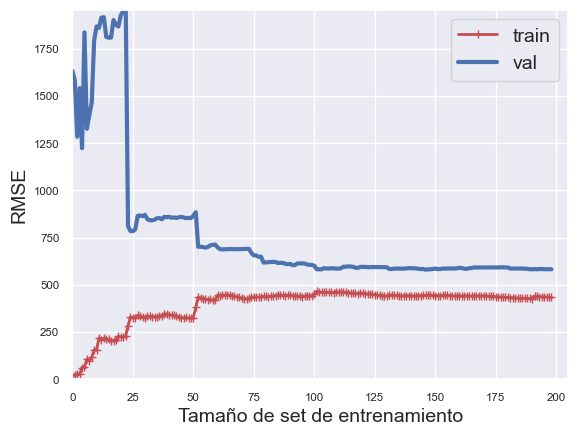

In [66]:
plot_learning_curves(model_ridge_reg, X_train, y_train)
plt.show()  

#### Lasso

In [67]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=1, max_iter=100_000, tol = 0.01)

In [68]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)

In [69]:
model_lasso_reg = Pipeline([
    ("poly_features", poly_features),
    ('scaler', scaler),   
    ('lasso_reg', lasso_reg)  
])

In [70]:
model_lasso_reg.fit(X_train,y_train)

Pipeline(steps=[('poly_features', PolynomialFeatures(include_bias=False)),
                ('scaler', StandardScaler()),
                ('lasso_reg', Lasso(alpha=1, max_iter=100000, tol=0.01))])

In [71]:
display_metrics(model_lasso_reg, X_train, y_train)

RMSE:  430.91331367983685
NRMSE: 0.33022351897586116
MAPE: 0.5076318026840845
MAE 312.9743859498854
R2: 0.8167757448626493


In [72]:
lasso_scores = cross_val_score(model_lasso_reg, X_train, y_train,
                               scoring = 'neg_mean_squared_error', cv =5)

In [73]:
display_scores(hom_rmse, hom_std, lasso_scores)

CV_Scores: [1082.10124467  445.85523005  487.73492013  560.85277778  460.97887507]
CV_RMSE: 607.5046095387368
CV_NRMSE: 0.46555143131407306
CV_Standard Dev: 240.5674336782201


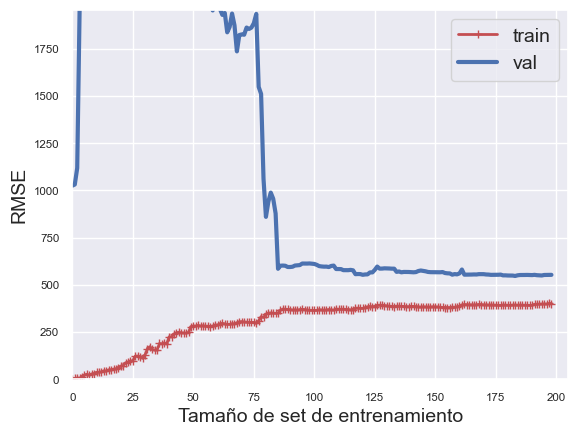

In [74]:
plot_learning_curves(model_lasso_reg, X_train, y_train)
plt.show()  

Observamos que tanto Ridge como Lasso ofrecen resultados similares, por lo que no vale la pena evaluar Elastic Net

### K nearest neighbors

In [75]:
from sklearn.neighbors import KNeighborsRegressor
neig_reg = KNeighborsRegressor(n_neighbors=4)

In [76]:
model_neig_reg = Pipeline([
    ('scaler', scaler),   
    ('neig_reg', neig_reg)  
])

In [77]:
model_neig_reg.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('neig_reg', KNeighborsRegressor(n_neighbors=4))])

In [78]:
display_metrics(model_neig_reg, X_train, y_train)

RMSE:  259.424198553107
NRMSE: 0.1988055811553544
MAPE: 0.2498574307149887
MAE 174.6728515625
R2: 0.9335914332284846


In [79]:
neig_reg_scores = cross_val_score(model_neig_reg, X_train, y_train,
                               scoring = 'neg_mean_squared_error', cv =5)

In [80]:
display_scores(hom_rmse, hom_std, neig_reg_scores)

CV_Scores: [534.2193588  330.49692977 356.42759763 381.05252842 410.07273237]
CV_RMSE: 402.4538293976157
CV_NRMSE: 0.3084140488352011
CV_Standard Dev: 70.95692710307628


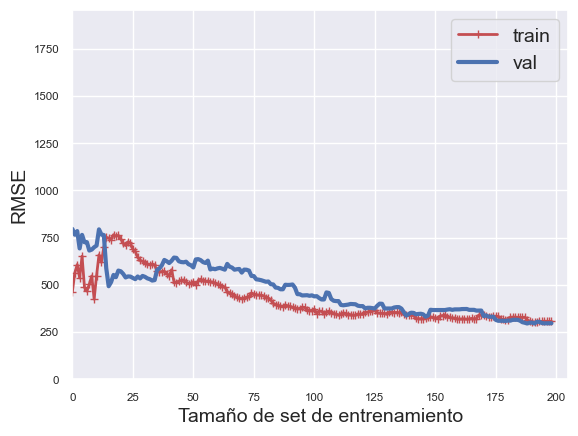

In [81]:
plot_learning_curves(model_neig_reg, X_train, y_train)
plt.savefig('learning-curves/hom-knn.png', dpi = 200, bbox_inches = 'tight')
plt.show()  

### Support Vector Machines

#### LinearSVR

In [82]:
from sklearn.svm import LinearSVR
svm_reg = LinearSVR(epsilon=1.5, dual=True)

In [83]:
model_lin_svm = Pipeline([
    ('scaler', scaler),   
    ('svm_reg', svm_reg)  
])

In [84]:
model_lin_svm.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_reg', LinearSVR(dual=True, epsilon=1.5))])

In [85]:
display_metrics(model_lin_svm, X_train, y_train)

RMSE:  1451.1664379200931
NRMSE: 1.1120781663889021
MAPE: 0.6995053055554431
MAE 1086.8371874501488
R2: -1.0779619516570644


In [86]:
svm_lin_scores = cross_val_score(model_lin_svm, X_train, y_train,
                               scoring = 'neg_mean_squared_error', cv =5)

In [87]:
display_scores(hom_rmse, hom_std, svm_lin_scores)

CV_Scores: [1220.69399725 1307.47308026 1716.79026142 1564.40691414 1573.6176686 ]
CV_RMSE: 1476.596384335904
CV_NRMSE: 1.131565998688825
CV_Standard Dev: 183.79643143016855


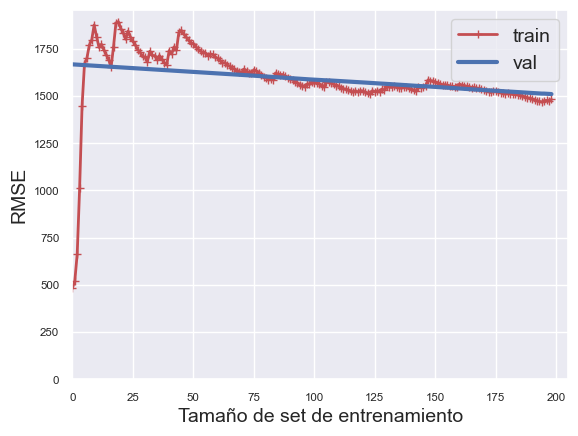

In [88]:
plot_learning_curves(model_lin_svm, X_train, y_train)
plt.show()

#### Non linear SVR

In [89]:
from sklearn.svm import SVR
svm_poly_reg = SVR(kernel="poly", degree=2, C=100, epsilon=0.1)

In [90]:
model_poly_svm = Pipeline([
    ('scaler', scaler),   
    ('svm_poly_reg', svm_poly_reg)  
])

In [91]:
model_poly_svm.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_poly_reg', SVR(C=100, degree=2, kernel='poly'))])

In [92]:
display_metrics(model_poly_svm, X_train, y_train)

RMSE:  860.1928708965319
NRMSE: 0.6591950348427883
MAPE: 1.021190307304407
MAE 609.4143924829527
R2: 0.26987903737173047


In [93]:
poly_svm_scores = cross_val_score(model_poly_svm, X_train, y_train,
                               scoring = 'neg_mean_squared_error', cv =5)

In [94]:
display_scores(hom_rmse, hom_std, poly_svm_scores)

CV_Scores: [1078.40049645  783.10580437 1074.22773228 1009.47532922  842.43774134]
CV_RMSE: 957.5294207307355
CV_NRMSE: 0.7337873414409123
CV_Standard Dev: 122.14449056869186


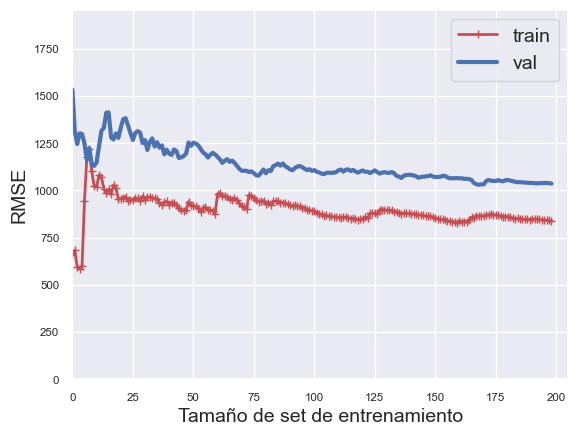

In [95]:
plot_learning_curves(model_poly_svm, X_train, y_train)
plt.show()

#### Gaussian Kernel

In [96]:
svm_gauss_reg = SVR(kernel="rbf", gamma=0.1, C=100)

In [97]:
model_gauss_svm = Pipeline([
    ('scaler', scaler),   
    ('svm_gauss_reg', svm_gauss_reg)  
])

In [98]:
model_gauss_svm.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_gauss_reg', SVR(C=100, gamma=0.1))])

In [99]:
display_metrics(model_gauss_svm, X_train, y_train)

RMSE:  643.8838095960222
NRMSE: 0.4934300488435591
MAPE: 0.6783265127256903
MAE 430.315366652476
R2: 0.5909106722876872


In [100]:
gauss_svm_scores = cross_val_score(model_gauss_svm, X_train, y_train,
                               scoring = 'neg_mean_squared_error', cv =5)

In [101]:
display_scores(hom_rmse, hom_std, gauss_svm_scores)

CV_Scores: [617.66174268 575.11926089 777.6102136  838.96465206 716.53802132]
CV_RMSE: 705.1787781100653
CV_NRMSE: 0.540402466626085
CV_Standard Dev: 97.82506308116889


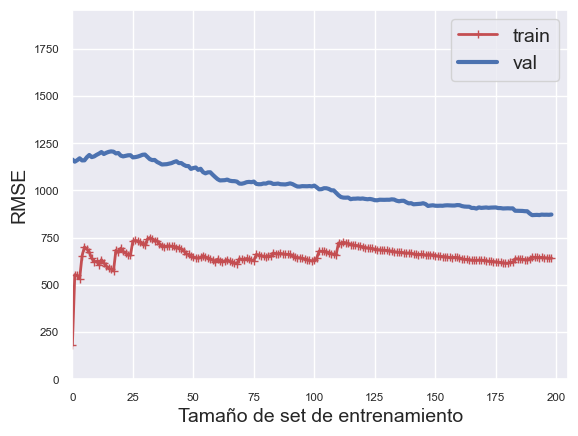

In [102]:
plot_learning_curves(model_gauss_svm, X_train, y_train)
plt.show()

### Decision Tree

In [103]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(max_depth=5)

In [104]:
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5)

In [105]:
display_metrics(tree_reg, X_train, y_train)

RMSE:  303.3474978803232
NRMSE: 0.2324654983786131
MAPE: 0.2894724285698331
MAE 204.621013195581
R2: 0.9092003918932022


In [106]:
tree_reg_scores = cross_val_score(tree_reg, X_train, y_train,
                               scoring = 'neg_mean_squared_error', cv =5)

In [107]:
display_scores(hom_rmse, hom_std, tree_reg_scores)

CV_Scores: [733.6174361  461.95928726 539.01616591 539.19415798 524.86937405]
CV_RMSE: 559.731284261665
CV_NRMSE: 0.42894110834342014
CV_Standard Dev: 91.50081930308265


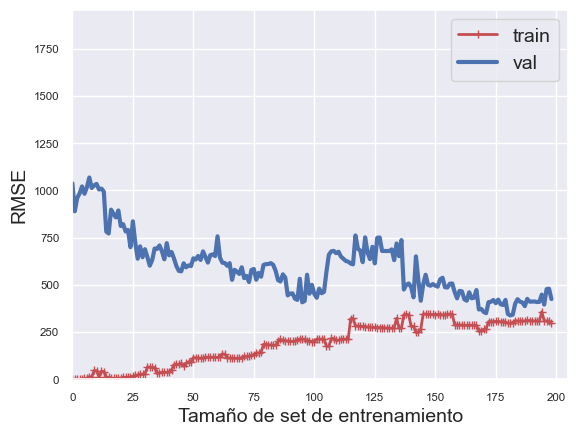

In [108]:
plot_learning_curves(tree_reg, X_train, y_train)
plt.show()

### Random Forest

In [109]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor(n_estimators = 50,  max_leaf_nodes=64, n_jobs=-1, random_state=42)

In [110]:
forest_reg.fit(X_train, y_train)

RandomForestRegressor(max_leaf_nodes=64, n_estimators=50, n_jobs=-1,
                      random_state=42)

In [111]:
display_metrics(tree_reg, X_train, y_train)

RMSE:  325.68818171430456
NRMSE: 0.24958592375833527
MAPE: 0.21767224518653966
MAE 205.95524708581348
R2: 0.8953336356233624


In [112]:
forest_reg_scores = cross_val_score(forest_reg, X_train, y_train,
                               scoring = 'neg_mean_squared_error', cv =5)

In [113]:
display_scores(hom_rmse, hom_std, forest_reg_scores)

CV_Scores: [548.52986332 300.64676253 400.35281123 500.57480091 388.52798184]
CV_RMSE: 427.72644396561765
CV_NRMSE: 0.3277813123924532
CV_Standard Dev: 87.56189796296263


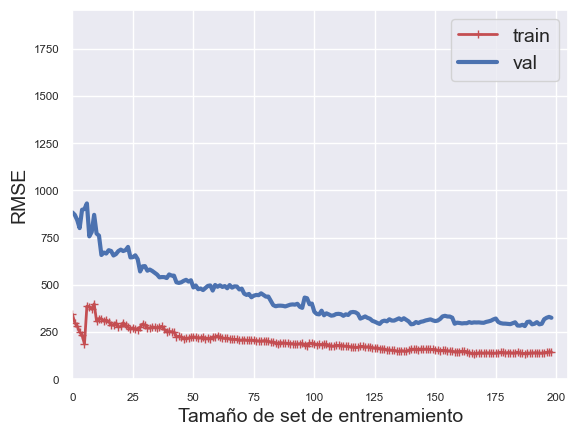

In [114]:
plot_learning_curves(forest_reg, X_train, y_train)
plt.savefig('learning-curves/hom-rf.png', dpi = 200, bbox_inches = 'tight')
plt.show()

#### Extra Trees

In [115]:
from sklearn.ensemble import ExtraTreesRegressor
extra_trees_reg = ExtraTreesRegressor(n_estimators = 50, n_jobs=-1, random_state=42)

In [116]:
extra_trees_reg.fit(X_train, y_train)

ExtraTreesRegressor(n_estimators=50, n_jobs=-1, random_state=42)

In [117]:
display_metrics(extra_trees_reg, X_train, y_train)

RMSE:  0.0
NRMSE: 0.0
MAPE: 0.0
MAE 0.0
R2: 1.0


In [118]:
extra_trees_reg_scores = cross_val_score(extra_trees_reg, X_train, y_train,
                               scoring = 'neg_mean_squared_error', cv =5)

In [119]:
display_scores(hom_rmse, hom_std, extra_trees_reg_scores)

CV_Scores: [467.53001347 255.61975817 275.30412954 316.81424423 349.48263988]
CV_RMSE: 332.9501570581671
CV_NRMSE: 0.2551510222981961
CV_Standard Dev: 74.76427422547607


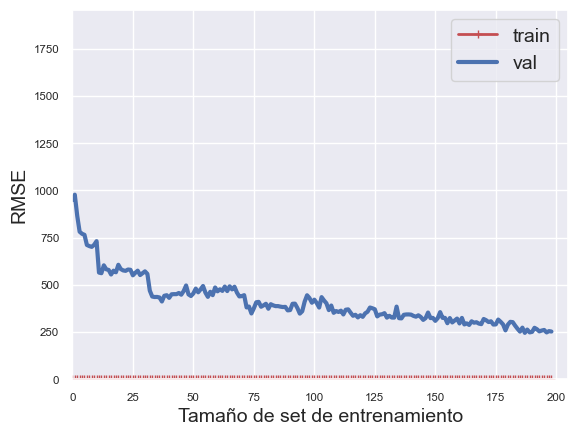

In [120]:
plot_learning_curves(extra_trees_reg, X_train, y_train)
plt.savefig('learning-curves/hom-et.png', dpi = 200, bbox_inches = 'tight')
plt.show()

### Boosting

#### Adaboost

In [121]:
from sklearn.ensemble import AdaBoostRegressor
model_adaboost = AdaBoostRegressor(n_estimators=100, learning_rate=0.5, random_state=42)

In [122]:
model_adaboost.fit(X_train, y_train)

AdaBoostRegressor(learning_rate=0.5, n_estimators=100, random_state=42)

In [123]:
display_metrics(model_adaboost, X_train, y_train)

RMSE:  339.7245168923511
NRMSE: 0.26034244449898486
MAPE: 0.6010712469196022
MAE 297.78576217721115
R2: 0.886117519147049


In [124]:
adaboost_scores = cross_val_score(model_adaboost, X_train, y_train,
                               scoring = 'neg_mean_squared_error', cv =5)

In [125]:
display_scores(hom_rmse, hom_std, adaboost_scores)

CV_Scores: [543.57539469 362.01506992 425.85390497 545.31270617 483.74401363]
CV_RMSE: 472.1002178726162
CV_NRMSE: 0.36178644359778767
CV_Standard Dev: 70.51497511984606


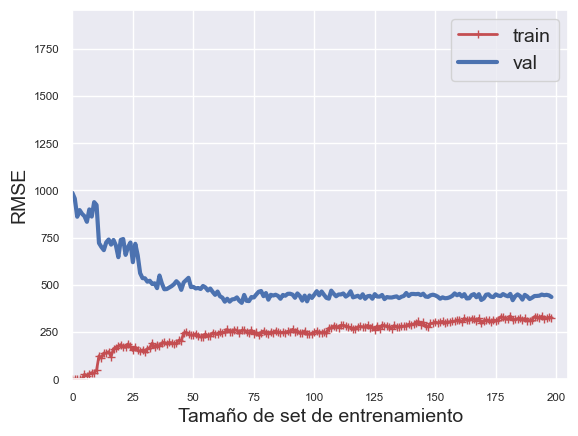

In [126]:
plot_learning_curves(model_adaboost, X_train, y_train)
plt.show()

#### Gradient Boosting

In [127]:
from sklearn.ensemble import GradientBoostingRegressor
model_gbrt = GradientBoostingRegressor(max_depth=4, n_estimators=50, random_state=42)

In [128]:
model_gbrt.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=4, n_estimators=50, random_state=42)

In [129]:
display_metrics(model_gbrt, X_train, y_train)

RMSE:  103.51778856200674
NRMSE: 0.07932919993496257
MAPE: 0.12306711042872316
MAE 78.56925077886498
R2: 0.9894261508279285


In [130]:
gbrt_scores = cross_val_score(model_gbrt, X_train, y_train,
                               scoring = 'neg_mean_squared_error', cv =5)

In [131]:
display_scores(hom_rmse, hom_std, gbrt_scores)

CV_Scores: [523.95700689 252.47402377 392.1119086  512.07157413 350.39352201]
CV_RMSE: 406.2016070822457
CV_NRMSE: 0.3112860982615441
CV_Standard Dev: 102.00001562705049


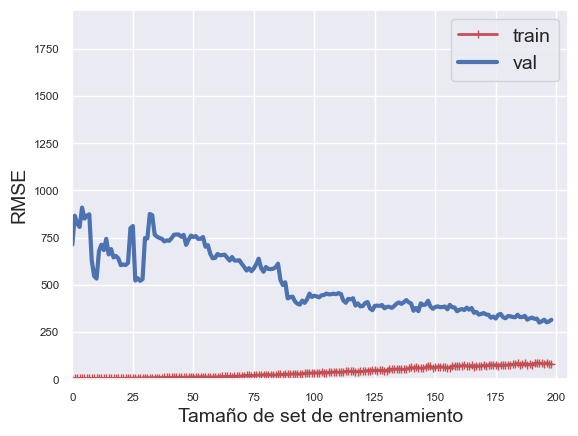

In [132]:
plot_learning_curves(model_gbrt, X_train, y_train)
plt.savefig('learning-curves/hom-gb.png', dpi = 200, bbox_inches = 'tight')
plt.show()

### Selección de los mejores modelos

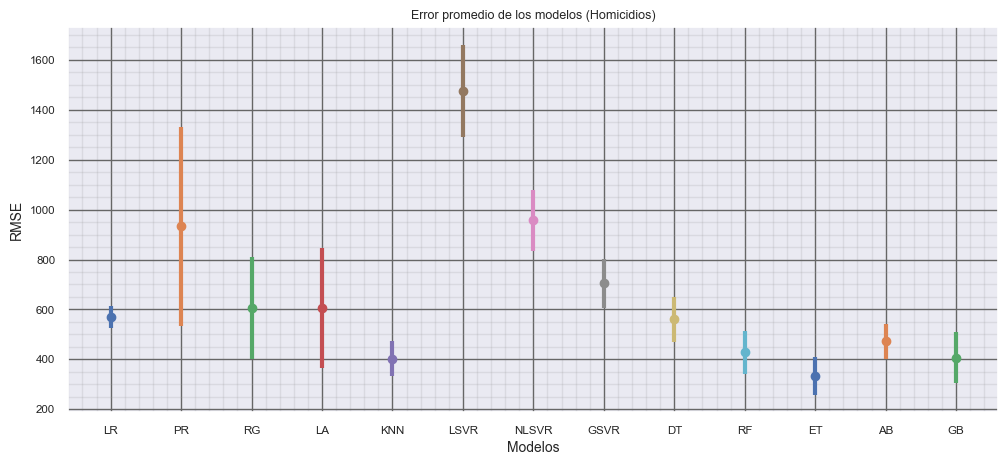

In [133]:
# Grafica para comparar visualmente los resultados
plt.figure(figsize=(12, 5))
for i, (model_mean, model_sd) in enumerate(zip(hom_rmse, hom_std)):
    plt.errorbar(i, model_mean,
                 xerr=0,
                 yerr=model_sd,
                 fmt='o',
                 linewidth=3)
plt.xticks(list(range(0, len(models))), models)
plt.title("Error promedio de los modelos (Homicidios)")
plt.grid('visible',
         which='major',
         color='#666',
         linestyle='-')
plt.minorticks_on ()
plt.grid('visible',
         which='minor',
         color='#999',
         linestyle='-',
         alpha=0.2)
plt.xlabel("Modelos", fontsize=10)
plt.ylabel("RMSE", fontsize=10) 
plt.savefig('box-plots/bp_homicidios.png', dpi = 200, bbox_inches = 'tight')
plt.show()

Se observa que los modelos con menor error en CrossValidation son: K-Nearest Neighbors, Random Forest, Extra Trees y Gradient Boosting

### Tuning de los mejores modelos

A continuación se realiza el ajuste de hiperparámetros utilizando _GridSearchCV_

#### K Nearest Neighbors

In [134]:
n_neighbors=[1, 2, 3, 4, 5, 6, 8, 10]  

params = {'neig_reg__n_neighbors': n_neighbors}

In [135]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV( model_neig_reg, param_grid = params, cv = 5, scoring = 'neg_mean_squared_error',
                           n_jobs = -1, verbose = 2
                   )

In [136]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('neig_reg',
                                        KNeighborsRegressor(n_neighbors=4))]),
             n_jobs=-1,
             param_grid={'neig_reg__n_neighbors': [1, 2, 3, 4, 5, 6, 8, 10]},
             scoring='neg_mean_squared_error', verbose=2)

In [137]:
kneig_tuned = grid_search.best_estimator_

In [138]:
grid_search.best_params_

{'neig_reg__n_neighbors': 3}

Se despliegan las métricas obtenidas en el set de test

In [139]:
display_metrics(kneig_tuned, X_test, y_test)

RMSE:  259.87199706992504
NRMSE: 0.1941516601194808
MAPE: 0.25426790701894314
MAE 208.96875
R2: 0.9303912740900637


#### Random Forest

In [140]:
param_grid = {
    'n_estimators': [10, 50, 100, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

In [141]:
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv = 5, scoring = 'neg_mean_squared_error',
                    n_jobs = -1, verbose = 2
                   )

In [142]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 50, 100, 500]},
             scoring='neg_mean_squared_error', verbose=2)

In [143]:
random_forest_tuned = grid_search.best_estimator_

In [144]:
grid_search.best_params_

{'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 500}

In [145]:
display_metrics(random_forest_tuned, X_test, y_test)

RMSE:  245.7703689958969
NRMSE: 0.18361626372498835
MAPE: 0.2217197390710599
MAE 192.0186386645751
R2: 0.9377407678894982


Los modelos basados en árboles de desición permiten desplegar la importancia que el modelo le da a cada atributo.

In [146]:
for name, score in zip(X.keys().to_list(), random_forest_tuned.feature_importances_):
    print(name,':', score)

Poblacion : 0.6752477184378457
PIB : 0.04042568164243091
EficienciaPrimaria : 0.02752780618731098
EficienciaSecundaria : 0.03091152839276847
EficienciaBachillerato : 0.03761716231284426
Desocupacion : 0.025028945039040674
MedianaSalarios : 0.02156214177118286
Pobreza : 0.013832704662193832
MedicosPorPob : 0.060616807081478805
Internamiento : 0.04055518453380726
PIBPerCapita : 0.02667431993909625


#### Extra trees

In [147]:
param_grid = {
    'n_estimators': [10, 50, 100, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

In [148]:
grid_search = GridSearchCV(ExtraTreesRegressor(random_state=42), param_grid, cv=5, scoring = 'neg_mean_squared_error',
                    n_jobs = -1, verbose = 2)

In [149]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5, estimator=ExtraTreesRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 50, 100, 500]},
             scoring='neg_mean_squared_error', verbose=2)

In [150]:
extra_trees_tuned = grid_search.best_estimator_

In [151]:
grid_search.best_params_

{'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 10}

In [152]:
display_metrics(extra_trees_tuned, X_test, y_test)

RMSE:  297.25843816870866
NRMSE: 0.22208325600949472
MAPE: 0.32570908436601437
MAE 240.821875
R2: 0.9089220807774999


#### Gradient Boosting

In [153]:
param_grid = {
    'n_estimators': [10, 50, 100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

In [154]:
grid_search = GridSearchCV(GradientBoostingRegressor(random_state=42), param_grid, cv=5, scoring = 'neg_mean_squared_error',
                    n_jobs = -1, verbose = 2)

In [155]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 45 candidates, totalling 225 fits


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [10, 50, 100, 200, 300]},
             scoring='neg_mean_squared_error', verbose=2)

In [156]:
gbrt_tuned = grid_search.best_estimator_

In [157]:
grid_search.best_params_

{'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 300}

In [158]:
display_metrics(gbrt_tuned, X_test, y_test)

RMSE:  293.8349343519846
NRMSE: 0.21952553929920404
MAPE: 0.2533645120556005
MAE 235.03206781509857
R2: 0.911007875783038


### Modelo con mejor desempeño

De los 4 modelos preseleccionados, se elige aquel con mejores métricas, es decir, el modelo que presente
menos error y mayor coeficiente de determinación. A continuación se presenta un gráfico con las predicciones del modelo con mejor desempeño comparadas con los valores reales en el set de test.

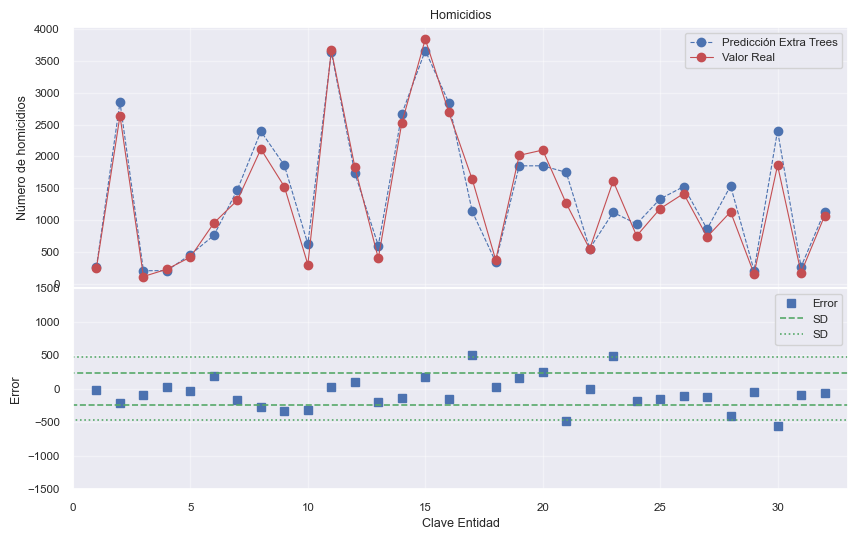

In [159]:
y_real  = y_test #Valores reales de target
muestra_datos = X_test #Datos para predicción

especie = range(1, len(y_real)+1) #Cantidad de eleemntos
y_prediccion = list(random_forest_tuned.predict(muestra_datos)) #Valores de prediccion  de target


list_delta=[]

for i in range(len(y_real)):
    delta= y_real[i] -y_prediccion[i]
    list_delta.append(delta)

list_delta = np.array(list_delta)
std_list = np.std(list_delta)


fig, axs = plt.subplots(2, 1, sharex=True,gridspec_kw={'height_ratios': [1.3, 1], 'hspace': 0}, figsize=(10, 6))
fig.subplots_adjust(hspace=0)

axs[0].plot(especie, y_prediccion, 'ob--', linewidth=0.8 ,label='Predicción Extra Trees')
axs[0].plot(especie, y_real, 'or-' , linewidth=0.8 ,  label='Valor Real')
axs[0].grid (linestyle='-', alpha=0.4)
axs[0].set_ylabel('Número de homicidios')
axs[0].set_title('Homicidios')
axs[0].legend()


axs[1].plot(especie, list_delta  , 's', linewidth=0.8 ,label='Error')
axs[1].plot([-5,40,40,-5], [std_list,std_list,-std_list,-std_list]  , 'g--', linewidth=1.18 ,label='SD')
axs[1].plot([-5,40,40,-5], [2*std_list,2*std_list,-2*std_list,-2*std_list]  , 'g:', linewidth=1.18 ,label='SD')

axs[1].set_ylim(-1500, 1500)
axs[1].set_xlim(0, 33)

axs[1].grid (linestyle='-', alpha=0.4)

axs[1].set_xlabel('Clave Entidad')
axs[1].set_ylabel('Error')
axs[1].legend(loc='upper right')

plt.savefig('results/homicidios.png', dpi = 200, bbox_inches = 'tight')
plt.show()

In [160]:
#Error para Yucatan
print('Valor real:', y_real[30])
print('Valor predicho: ', y_prediccion[30])


Valor real: 173.0
Valor predicho:  264.94782172666515


El segundo gráfico muestra la desviación de las predicciones del modelo comparada con la desviación estándar de los valores reales, para 1 y 2 desviaciones estándar.

Se utilizará la metodología anterior en los demás tipos de delito

## Homicidios por cada 100 mil habitantes

In [161]:
X = df_homicidios[features]
y = df_homicidios['DelitosPorPob']

In [162]:
X_train, X_test, y_train, y_test = train_test_split(X.values,y.values,train_size = 0.89, shuffle = False)

In [163]:
homporpob_rmse = []
homporpob_std = []

### Regresion

#### Linear Regression

In [164]:
lr = LinearRegression()

In [165]:
model_lr = Pipeline([
    ('scaler', scaler),   
    ('lr', lr)  
])

In [166]:
model_lr.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('lr', LinearRegression())])

In [167]:
display_metrics(model_lr, X_train, y_train)

RMSE:  18.620575918035865
NRMSE: 0.5098418040510538
MAPE: 0.5668095657170376
MAE 13.984579313989412
R2: 0.3213910197036358


In [168]:
lr_scores = cross_val_score(model_lr, X_train, y_train,
                               scoring = 'neg_mean_squared_error', cv =5)

In [169]:
display_scores(homporpob_rmse, homporpob_std, lr_scores)

CV_Scores: [21.64227343 19.43539227 18.28293515 20.99576719 20.81235217]
CV_RMSE: 20.233744041503513
CV_NRMSE: 0.554011251329522
CV_Standard Dev: 1.2118120782009043


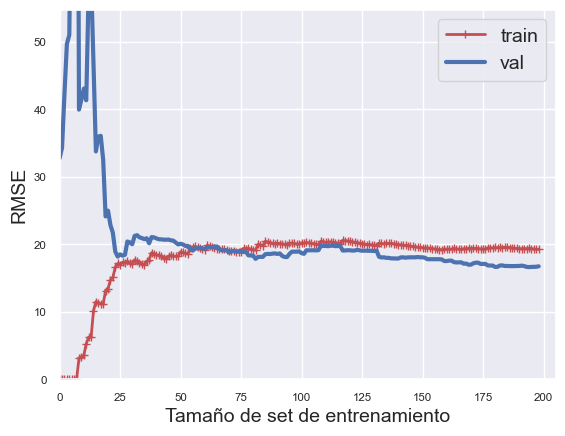

In [170]:
plot_learning_curves(model_lr, X_train, y_train)
plt.show()

#### Polynomial Regression

In [171]:
regression = LinearRegression()

In [172]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)

In [173]:
model_poly_regression = Pipeline([
     ("poly_features", poly_features),
    ('scaler', scaler),   
    ('regression', regression)  
])

In [174]:
model_poly_regression.fit(X_train, y_train)

Pipeline(steps=[('poly_features', PolynomialFeatures(include_bias=False)),
                ('scaler', StandardScaler()),
                ('regression', LinearRegression())])

In [175]:
display_metrics(model_poly_regression, X_train, y_train)

RMSE:  12.46226735406735
NRMSE: 0.3412238643064731
MAPE: 0.3680346906575792
MAE 9.090626255734263
R2: 0.696032247704861


In [176]:
poly_scores = cross_val_score(model_poly_regression, X_train, y_train,
                               scoring = 'neg_mean_squared_error', cv =5)

In [177]:
display_scores(homporpob_rmse, homporpob_std, poly_scores)

CV_Scores: [50.80614411 21.60512624 17.01717622 24.13364654 28.89924488]
CV_RMSE: 28.49226759856005
CV_NRMSE: 0.7801342545954686
CV_Standard Dev: 11.799853652763655


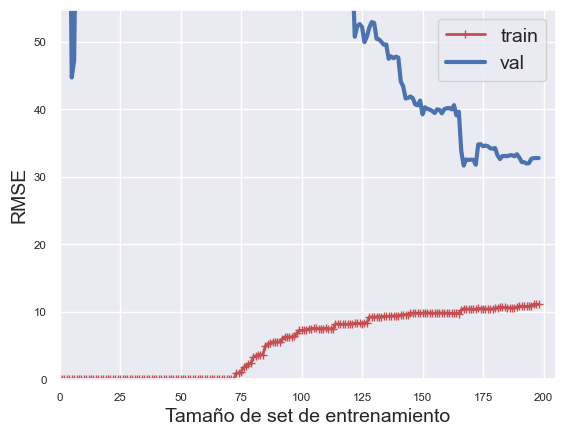

In [178]:
plot_learning_curves(model_poly_regression, X_train, y_train)
plt.show()    

#### Ridge

In [179]:
ridge_reg = Ridge(alpha=1, solver="cholesky")

In [180]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)

In [181]:
model_ridge_reg = Pipeline([
    ("poly_features", poly_features),
    ('scaler', scaler),   
    ('ridge_reg', ridge_reg)  
])

In [182]:
model_ridge_reg.fit(X_train, y_train)

Pipeline(steps=[('poly_features', PolynomialFeatures(include_bias=False)),
                ('scaler', StandardScaler()),
                ('ridge_reg', Ridge(alpha=1, solver='cholesky'))])

In [183]:
display_metrics(model_ridge_reg, X_train, y_train)

RMSE:  16.19366237556949
NRMSE: 0.443391551158043
MAPE: 0.49075280092443896
MAE 11.943585774826586
R2: 0.4867563972861967


In [184]:
ridge_scores = cross_val_score(model_ridge_reg, X_train, y_train,
                               scoring = 'neg_mean_squared_error', cv =5)

In [185]:
display_scores(homporpob_rmse, homporpob_std, ridge_scores)

CV_Scores: [26.38264972 18.88876051 16.38405879 19.45010338 19.94044797]
CV_RMSE: 20.20920407594214
CV_NRMSE: 0.5533393333196691
CV_Standard Dev: 3.320698796817373


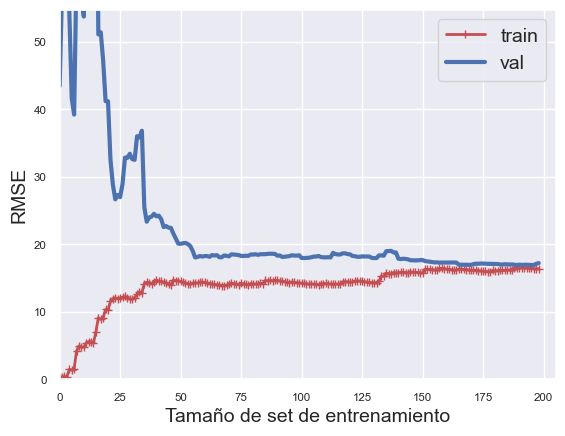

In [186]:
plot_learning_curves(model_ridge_reg, X_train, y_train)
plt.show()  

#### Lasso

In [187]:
lasso_reg = Lasso(alpha=0.2, max_iter=100_000)

In [188]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)

In [189]:
model_lasso_reg = Pipeline([
    ("poly_features", poly_features),
    ('scaler', scaler),   
    ('lasso_reg', lasso_reg)  
])

In [190]:
model_lasso_reg.fit(X_train,y_train)

Pipeline(steps=[('poly_features', PolynomialFeatures(include_bias=False)),
                ('scaler', StandardScaler()),
                ('lasso_reg', Lasso(alpha=0.2, max_iter=100000))])

In [191]:
display_metrics(model_lasso_reg, X_train, y_train)

RMSE:  17.856059858254515
NRMSE: 0.48890892588119095
MAPE: 0.5397349555142672
MAE 13.255467644162035
R2: 0.3759711758372697


In [192]:
lasso_scores = cross_val_score(model_lasso_reg, X_train, y_train,
                               scoring = 'neg_mean_squared_error', cv =5)

In [193]:
display_scores(homporpob_rmse, homporpob_std, lasso_scores)

CV_Scores: [23.47873723 19.24075945 17.73345453 20.36092486 20.70474912]
CV_RMSE: 20.303725039507977
CV_NRMSE: 0.5559273702739059
CV_Standard Dev: 1.8963639359470077


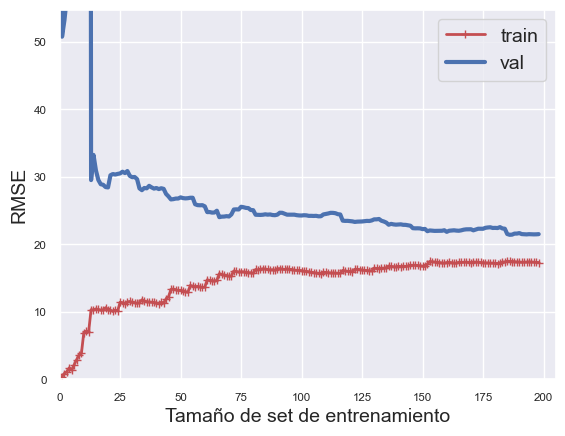

In [194]:
plot_learning_curves(model_lasso_reg, X_train, y_train)
plt.show()  

### K nearest neighbors

In [195]:
neig_reg = KNeighborsRegressor(n_neighbors=4)

In [196]:
model_neig_reg = Pipeline([
    ('scaler', scaler),   
    ('neig_reg', neig_reg)  
])

In [197]:
model_neig_reg.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('neig_reg', KNeighborsRegressor(n_neighbors=4))])

In [198]:
display_metrics(model_neig_reg, X_train, y_train)

RMSE:  10.478017671754879
NRMSE: 0.2868939959838701
MAPE: 0.23107855348494266
MAE 6.520949474352326
R2: 0.785122156258149


In [199]:
neig_reg_scores = cross_val_score(model_neig_reg, X_train, y_train,
                               scoring = 'neg_mean_squared_error', cv =5)

In [200]:
display_scores(homporpob_rmse, homporpob_std, neig_reg_scores)

CV_Scores: [16.88711562 16.68983837 10.84053887 13.35457965 16.04836419]
CV_RMSE: 14.76408733852883
CV_NRMSE: 0.4042489854758939
CV_Standard Dev: 2.3343554845765


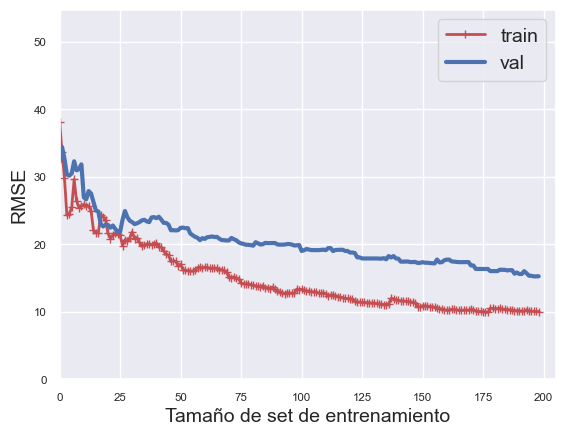

In [201]:
plot_learning_curves(model_neig_reg, X_train, y_train)
plt.savefig('learning-curves/homporpob-knn.png', dpi = 200, bbox_inches = 'tight')
plt.show()  

### Support Vector Machines

#### LinearSVR

In [202]:
svm_reg = LinearSVR(epsilon=1.5, dual=True)

In [203]:
model_lin_svm = Pipeline([
    ('scaler', scaler),   
    ('svm_reg', svm_reg)  
])

In [204]:
model_lin_svm.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_reg', LinearSVR(dual=True, epsilon=1.5))])

In [205]:
display_metrics(model_lin_svm, X_train, y_train)

RMSE:  20.1091383675531
NRMSE: 0.5505994781447655
MAPE: 0.4520868549711901
MAE 13.53010952905344
R2: 0.20855578500869476


In [206]:
svm_lin_scores = cross_val_score(model_lin_svm, X_train, y_train,
                               scoring = 'neg_mean_squared_error', cv =5)

In [207]:
display_scores(homporpob_rmse, homporpob_std, svm_lin_scores)

CV_Scores: [20.23685461 22.49818668 20.52437485 20.38795763 22.28360717]
CV_RMSE: 21.186196189185733
CV_NRMSE: 0.5800899249099805
CV_Standard Dev: 0.990158735127973


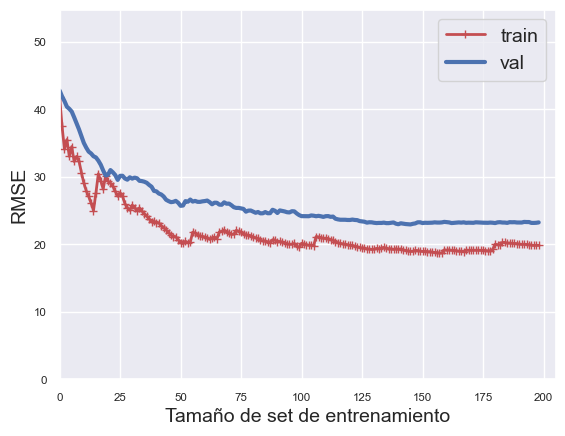

In [208]:
plot_learning_curves(model_lin_svm, X_train, y_train)
plt.show()  

#### Non linear SVR

In [209]:
svm_poly_reg = SVR(kernel="poly", degree=2, C=100, epsilon=0.1)

In [210]:
model_poly_svm = Pipeline([
    ('scaler', scaler),   
    ('svm_poly_reg', svm_poly_reg)  
])

In [211]:
model_poly_svm.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_poly_reg', SVR(C=100, degree=2, kernel='poly'))])

In [212]:
display_metrics(model_poly_svm, X_train, y_train)

RMSE:  16.843263786715504
NRMSE: 0.46117800184735813
MAPE: 0.4020743219463122
MAE 11.068068209176763
R2: 0.44475342957320285


In [213]:
poly_svm_scores = cross_val_score(model_poly_svm, X_train, y_train,
                               scoring = 'neg_mean_squared_error', cv =5)

In [214]:
display_scores(homporpob_rmse, homporpob_std, poly_svm_scores)

CV_Scores: [55.33987766 21.62360434 17.1032708  20.41122755 23.9750235 ]
CV_RMSE: 27.690600771351235
CV_NRMSE: 0.7581841675932649
CV_Standard Dev: 14.001266390925059


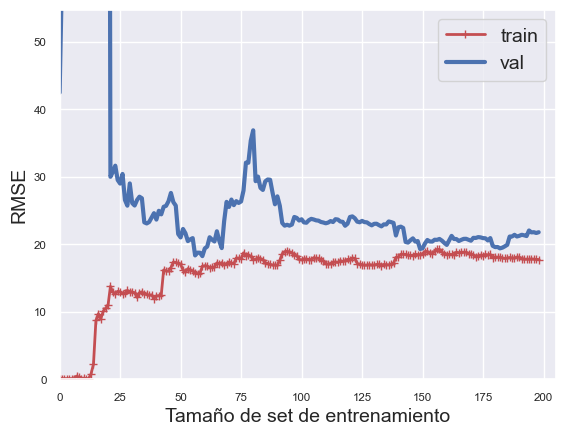

In [215]:
plot_learning_curves(model_poly_svm, X_train, y_train)
plt.show()

#### Gaussian Kernel

In [216]:
svm_gauss_reg = SVR(kernel="rbf", gamma=0.1, C=100)

In [217]:
model_gauss_svm = Pipeline([
    ('scaler', scaler),   
    ('svm_gauss_reg', svm_gauss_reg)  
])

In [218]:
model_gauss_svm.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_gauss_reg', SVR(C=100, gamma=0.1))])

In [219]:
display_metrics(model_gauss_svm, X_train, y_train)

RMSE:  9.705830141195282
NRMSE: 0.2657510686448235
MAPE: 0.1629418609769584
MAE 4.540716735364944
R2: 0.8156263907883677


In [220]:
gauss_svm_scores = cross_val_score(model_gauss_svm, X_train, y_train,
                               scoring = 'neg_mean_squared_error', cv =5)

In [221]:
display_scores(homporpob_rmse, homporpob_std, gauss_svm_scores)

CV_Scores: [15.19702759 15.83617583 10.62314737 11.47176219 17.50595288]
CV_RMSE: 14.126813173222832
CV_NRMSE: 0.3868000616861612
CV_Standard Dev: 2.63859184068768


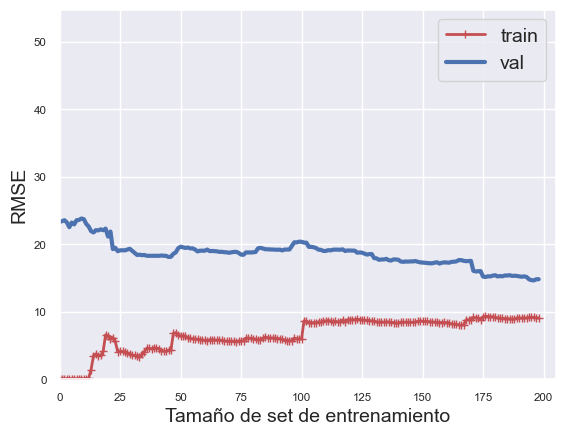

In [222]:
plot_learning_curves(model_gauss_svm, X_train, y_train)
plt.savefig('learning-curves/homporpob-svr.png', dpi = 200, bbox_inches = 'tight')
plt.show()

### Decision Tree

In [223]:
tree_reg = DecisionTreeRegressor(max_depth=5)

In [224]:
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5)

In [225]:
display_metrics(tree_reg, X_train, y_train)

RMSE:  14.234144343458082
NRMSE: 0.3897388492781523
MAPE: 0.42217387546370466
MAE 9.598890080478187
R2: 0.6034516791651852


In [226]:
tree_reg_scores = cross_val_score(tree_reg, X_train, y_train,
                               scoring = 'neg_mean_squared_error', cv =5)

In [227]:
display_scores(homporpob_rmse, homporpob_std, tree_reg_scores)

CV_Scores: [26.11381264 18.99369723 17.7671828  20.51689736 19.12531229]
CV_RMSE: 20.50338046319643
CV_NRMSE: 0.5613940476661611
CV_Standard Dev: 2.937418080151352


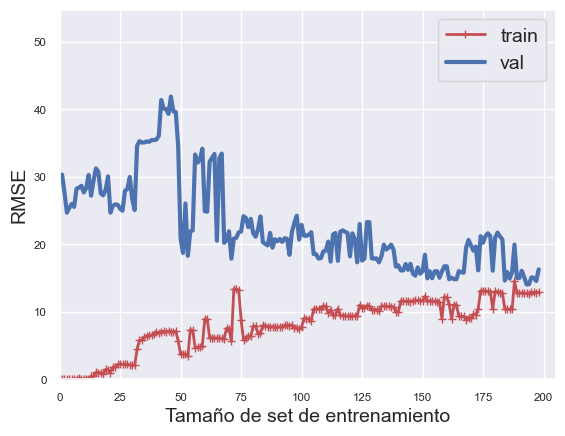

In [228]:
plot_learning_curves(tree_reg, X_train, y_train)
plt.show()

### Random Forest

In [229]:
forest_reg = RandomForestRegressor(n_estimators = 50,  max_leaf_nodes=64, n_jobs=-1, random_state=42)

In [230]:
forest_reg.fit(X_train, y_train)

RandomForestRegressor(max_leaf_nodes=64, n_estimators=50, n_jobs=-1,
                      random_state=42)

In [231]:
display_metrics(tree_reg, X_train, y_train)

RMSE:  13.6637476060608
NRMSE: 0.3741210669442672
MAPE: 0.42494968437068703
MAE 9.534189962984337
R2: 0.634596210843948


In [232]:
forest_reg_scores = cross_val_score(forest_reg, X_train, y_train,
                               scoring = 'neg_mean_squared_error', cv =5)

In [233]:
display_scores(homporpob_rmse, homporpob_std, forest_reg_scores)

CV_Scores: [22.33557702 13.0477928  12.79141347 13.84945384 15.58711017]
CV_RMSE: 15.522269459516915
CV_NRMSE: 0.42500843685190665
CV_Standard Dev: 3.5441299484480857


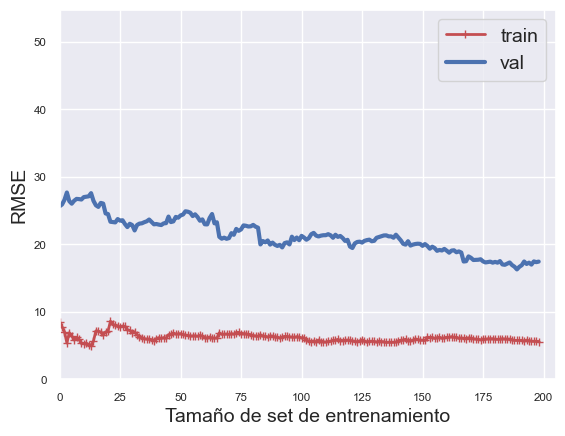

In [234]:
plot_learning_curves(forest_reg, X_train, y_train)
plt.show()

#### Extra Trees

In [235]:
extra_trees_reg = ExtraTreesRegressor(n_estimators = 50, n_jobs=-1, random_state=42)

In [236]:
extra_trees_reg.fit(X_train, y_train)

ExtraTreesRegressor(n_estimators=50, n_jobs=-1, random_state=42)

In [237]:
display_metrics(extra_trees_reg, X_train, y_train)

RMSE:  2.825637560284237e-14
NRMSE: 7.736753995532132e-16
MAPE: 5.557346453175298e-16
MAE 2.0709128856211123e-14
R2: 1.0


In [238]:
extra_trees_reg_scores = cross_val_score(extra_trees_reg, X_train, y_train,
                               scoring = 'neg_mean_squared_error', cv =5)

In [239]:
display_scores(homporpob_rmse, homporpob_std, extra_trees_reg_scores)

CV_Scores: [14.97566922 14.17814305 10.65554934 13.01253797 16.8057675 ]
CV_RMSE: 13.925533416439274
CV_NRMSE: 0.381288909143447
CV_Standard Dev: 2.0488387816948608


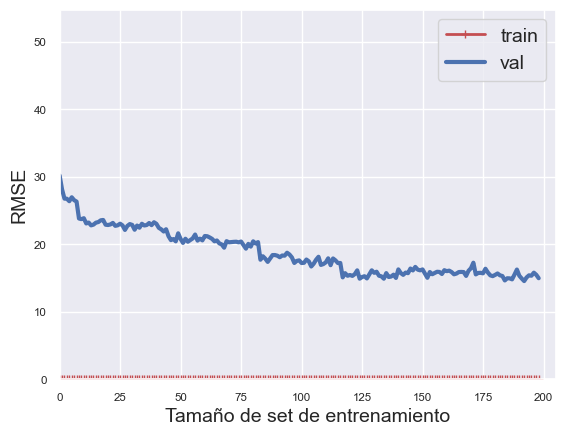

In [240]:
plot_learning_curves(extra_trees_reg, X_train, y_train)
plt.savefig('learning-curves/homporpob-et.png', dpi = 200, bbox_inches = 'tight')
plt.show()

### Boosting

#### Adaboost

In [241]:
model_adaboost = AdaBoostRegressor(n_estimators=100, learning_rate=0.5, random_state=42)

In [242]:
model_adaboost.fit(X_train, y_train)

AdaBoostRegressor(learning_rate=0.5, n_estimators=100, random_state=42)

In [243]:
display_metrics(model_adaboost, X_train, y_train)

RMSE:  13.600861503345094
NRMSE: 0.3723992102090381
MAPE: 0.4930729043794265
MAE 11.282511439704606
R2: 0.6379519433937565


In [244]:
adaboost_scores = cross_val_score(model_adaboost, X_train, y_train,
                               scoring = 'neg_mean_squared_error', cv =5)

In [245]:
display_scores(homporpob_rmse, homporpob_std, adaboost_scores)

CV_Scores: [22.41647362 15.94792425 12.69364086 16.53500036 18.48973997]
CV_RMSE: 17.216555812653098
CV_NRMSE: 0.47139894671929156
CV_Standard Dev: 3.199713943537639


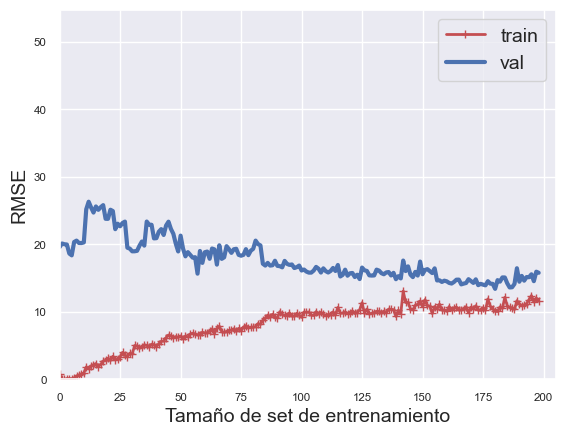

In [246]:
plot_learning_curves(model_adaboost, X_train, y_train)
plt.show()

#### Gradient Boosting

In [247]:
model_gbrt = GradientBoostingRegressor(max_depth=4, n_estimators=50, random_state=42)

In [248]:
model_gbrt.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=4, n_estimators=50, random_state=42)

In [249]:
display_metrics(model_gbrt, X_train, y_train)

RMSE:  5.224177842129212
NRMSE: 0.14304091707146566
MAPE: 0.16130560525790832
MAE 3.9685197529168263
R2: 0.9465842550213767


In [250]:
gbrt_scores = cross_val_score(model_gbrt, X_train, y_train,
                               scoring = 'neg_mean_squared_error', cv =5)

In [251]:
display_scores(homporpob_rmse, homporpob_std, gbrt_scores)

CV_Scores: [21.43629582 14.30506891 11.9809875  13.47531468 15.30725654]
CV_RMSE: 15.300984689663434
CV_NRMSE: 0.41894953584005107
CV_Standard Dev: 3.255437991689651


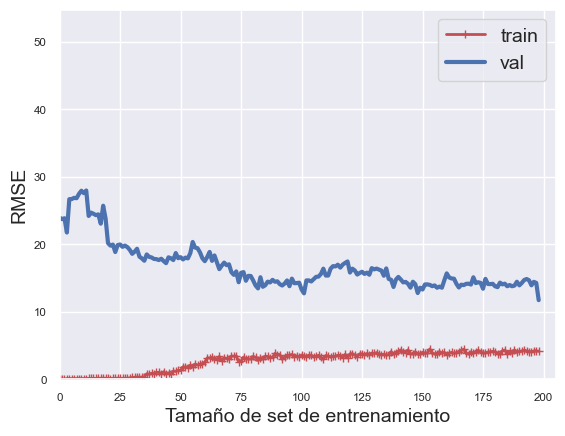

In [252]:
plot_learning_curves(model_gbrt, X_train, y_train)
plt.savefig('learning-curves/homporpob-gb.png', dpi = 200, bbox_inches = 'tight')
plt.show()

### Selección de los mejores modelos

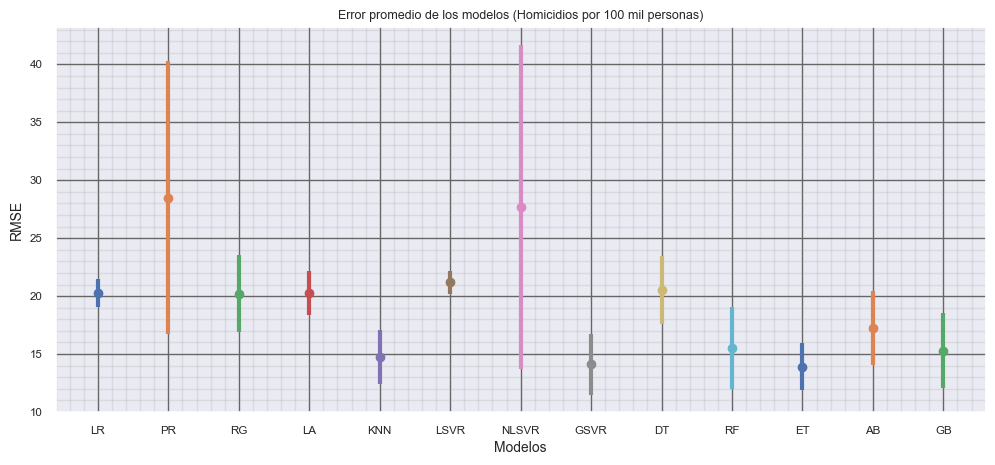

In [253]:
# Grafica para comparar visualmente los resultados
plt.figure(figsize=(12, 5))
for i, (model_mean, model_sd) in enumerate(zip(homporpob_rmse, homporpob_std)):
    plt.errorbar(i, model_mean,
                 xerr=0,
                 yerr=model_sd,
                 fmt='o',
                 linewidth=3)
plt.xticks(list(range(0, len(models))), models)
plt.title("Error promedio de los modelos (Homicidios por 100 mil personas)")
plt.grid('visible',
         which='major',
         color='#666',
         linestyle='-')
plt.minorticks_on ()
plt.grid('visible',
         which='minor',
         color='#999',
         linestyle='-',
         alpha=0.2)
plt.xlabel("Modelos", fontsize=10)
plt.ylabel("RMSE", fontsize=10) 
plt.savefig('box-plots/bp_homicidiosporpob.png', dpi = 200, bbox_inches = 'tight')
plt.show()

### Tuning de los mejores modelos

#### K Nearest Neighbors

In [254]:
n_neighbors=[1, 2, 3, 4, 5, 6, 8, 10]  

params = {'neig_reg__n_neighbors': n_neighbors}

In [255]:
grid_search = GridSearchCV( model_neig_reg, param_grid = params, cv = 5, scoring = 'neg_mean_squared_error',
                           n_jobs = -1, verbose = 2
                   )

In [256]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('neig_reg',
                                        KNeighborsRegressor(n_neighbors=4))]),
             n_jobs=-1,
             param_grid={'neig_reg__n_neighbors': [1, 2, 3, 4, 5, 6, 8, 10]},
             scoring='neg_mean_squared_error', verbose=2)

In [257]:
kneig_tuned = grid_search.best_estimator_

In [258]:
grid_search.best_params_

{'neig_reg__n_neighbors': 2}

In [259]:
display_metrics(kneig_tuned, X_test, y_test)

RMSE:  7.737694943285664
NRMSE: 0.2086399928280603
MAPE: 0.1790315649653954
MAE 5.8997560369474655
R2: 0.9096290725416842


#### Kernelized SVR

In [260]:
gamma = [0.01, 0.1, 0.5, 1]
C = [10, 50, 100, 200, 500, 600]

params = {'svm_gauss_reg__gamma':gamma,
          'svm_gauss_reg__C':C,
         }

In [261]:
grid_search = GridSearchCV( model_gauss_svm, param_grid = params, cv = 5, scoring = 'neg_mean_squared_error',
                    n_jobs = -1, verbose = 2
                   )

In [262]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svm_gauss_reg',
                                        SVR(C=100, gamma=0.1))]),
             n_jobs=-1,
             param_grid={'svm_gauss_reg__C': [10, 50, 100, 200, 500, 600],
                         'svm_gauss_reg__gamma': [0.01, 0.1, 0.5, 1]},
             scoring='neg_mean_squared_error', verbose=2)

In [263]:
gauss_svr_tuned = grid_search.best_estimator_

In [264]:
grid_search.best_params_

{'svm_gauss_reg__C': 500, 'svm_gauss_reg__gamma': 0.1}

In [265]:
display_metrics(gauss_svr_tuned, X_test, y_test)

RMSE:  9.877749307829538
NRMSE: 0.26634463620606547
MAPE: 0.3606029137626041
MAE 8.283337877137159
R2: 0.8527275433194041


#### Extra trees

In [266]:
param_grid = {
    'n_estimators': [10, 50, 100, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

In [267]:
grid_search = GridSearchCV(ExtraTreesRegressor(random_state=42), param_grid, cv=5, scoring = 'neg_mean_squared_error',
                    n_jobs = -1, verbose = 2)

In [268]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5, estimator=ExtraTreesRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 50, 100, 500]},
             scoring='neg_mean_squared_error', verbose=2)

In [269]:
extra_trees_tuned = grid_search.best_estimator_

In [270]:
grid_search.best_params_

{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 500}

In [271]:
display_metrics(extra_trees_tuned, X_test, y_test)

RMSE:  9.341932705431189
NRMSE: 0.2518968228842758
MAPE: 0.3549029739493469
MAE 7.867368313259532
R2: 0.8682717261606069


#### Gradient Boosting

In [272]:
param_grid = {
    'n_estimators': [10, 50, 100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

In [273]:
grid_search = GridSearchCV(GradientBoostingRegressor(random_state=42), param_grid, cv=5, scoring = 'neg_mean_squared_error',
                    n_jobs = -1, verbose = 2)

In [274]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 45 candidates, totalling 225 fits


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [10, 50, 100, 200, 300]},
             scoring='neg_mean_squared_error', verbose=2)

In [275]:
gbrt_tuned = grid_search.best_estimator_

In [276]:
grid_search.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300}

In [277]:
display_metrics(gbrt_tuned, X_test, y_test)

RMSE:  9.292119064716056
NRMSE: 0.25055364281350245
MAPE: 0.3202392531328946
MAE 7.57728791467035
R2: 0.8696728002888812


In [278]:
for name, score in zip(X.keys().to_list(), gbrt_tuned.feature_importances_):
    print(name,':', score)

Poblacion : 0.3075491597065787
PIB : 0.04240088909268936
EficienciaPrimaria : 0.07248705221025271
EficienciaSecundaria : 0.031117199251929805
EficienciaBachillerato : 0.038929118721582924
Desocupacion : 0.1524710710004776
MedianaSalarios : 0.0952308108239316
Pobreza : 0.022970319597094647
MedicosPorPob : 0.11791957580558997
Internamiento : 0.03514250286348927
PIBPerCapita : 0.08378230092638325


### Modelo con mejor desempeño

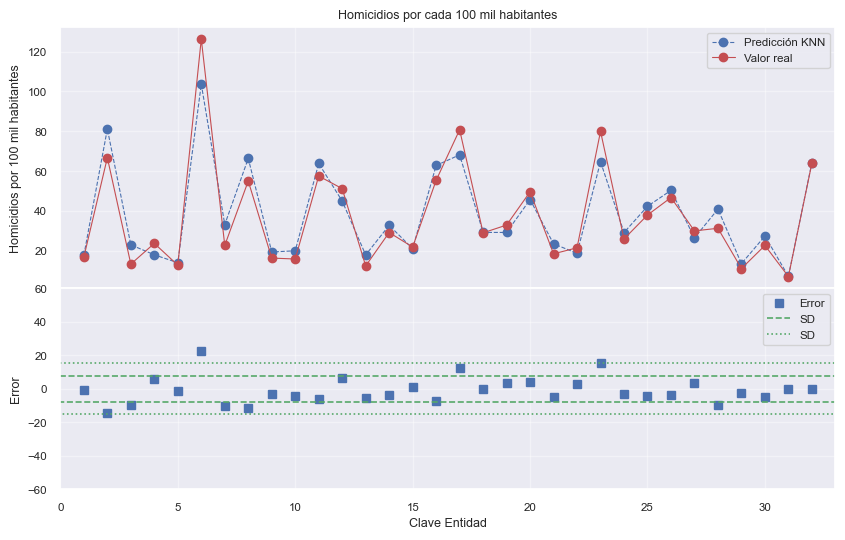

In [279]:
y_real  = y_test #Valores reales de target
muestra_datos = X_test #Datos para predicción

especie = range(1, len(y_real)+1) #Cantidad de eleemntos
y_prediccion = list(kneig_tuned.predict(muestra_datos)) #Valores de prediccion  de target


list_delta=[]

for i in range(len(y_real)):
    delta= y_real[i] -y_prediccion[i]
    list_delta.append(delta)

list_delta = np.array(list_delta)
std_list = np.std(list_delta)


fig, axs = plt.subplots(2, 1, sharex=True,gridspec_kw={'height_ratios': [1.3, 1], 'hspace': 0}, figsize=(10, 6))
fig.subplots_adjust(hspace=0)

axs[0].plot(especie, y_prediccion, 'ob--', linewidth=0.8 ,label='Predicción KNN')
axs[0].plot(especie, y_real, 'or-' , linewidth=0.8 ,  label='Valor real')
axs[0].grid (linestyle='-', alpha=0.4)
axs[0].set_ylabel('Homicidios por 100 mil habitantes')
axs[0].set_title('Homicidios por cada 100 mil habitantes')
axs[0].legend()


axs[1].plot(especie, list_delta  , 's', linewidth=0.8 ,label='Error')
axs[1].plot([-5,40,40,-5], [std_list,std_list,-std_list,-std_list]  , 'g--', linewidth=1.18 ,label='SD')
axs[1].plot([-5,40,40,-5], [2*std_list,2*std_list,-2*std_list,-2*std_list]  , 'g:', linewidth=1.18 ,label='SD')

axs[1].set_ylim(-60, 60)
axs[1].set_xlim(0, 33)

axs[1].grid (linestyle='-', alpha=0.4)

axs[1].set_xlabel('Clave Entidad')
axs[1].set_ylabel('Error')
axs[1].legend(loc='upper right')

plt.savefig('results/homicidiosporpob.png', dpi = 200, bbox_inches = 'tight')
plt.show()

In [280]:
#Error para Yucatan
print('Valor real:', y_real[30])
print('Valor predicho: ', y_prediccion[30])


Valor real: 7.117893672904315
Valor predicho:  7.216589070807997


## Robos

In [281]:
X = df_robos[features]
y = df_robos['DelitosTotales']

In [282]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, train_size = 0.89, shuffle = False)

In [283]:
rob_rmse = []
rob_std = []

### Regresion

#### Linear Regression

In [284]:
lr = LinearRegression()

In [285]:
model_lr = Pipeline([
    ('scaler', scaler),   
    ('lr', lr)  
])

In [286]:
model_lr.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('lr', LinearRegression())])

In [287]:
display_metrics(model_lr, X_train, y_train)

RMSE:  12165.65462860842
NRMSE: 0.5617889870801394
MAPE: 1.1484117227138326
MAE 9316.991920126144
R2: 0.8364941422756478


In [288]:
lr_scores = cross_val_score(model_lr, X_train, y_train,
                               scoring = 'neg_mean_squared_error', cv =5)

In [289]:
display_scores(rob_rmse, rob_std, lr_scores)

CV_Scores: [12638.81381151 12253.66267321 16496.10450258 12030.34904861
 13453.90954935]
CV_RMSE: 13374.567917050663
CV_NRMSE: 0.6176145215470318
CV_Standard Dev: 1634.3177650147752


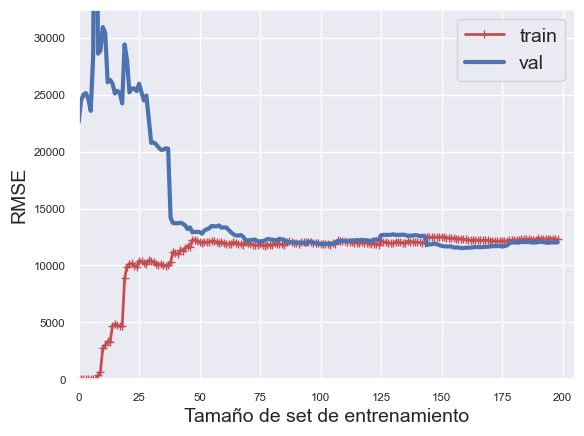

In [290]:
plot_learning_curves(model_lr, X_train, y_train)
plt.show()

#### Polynomial Regression

Para este modelo se utilizara la clase _LinearRegression_ de sklearn, asi como un _Pipeline_ para prepara los datos de manera mas directa

In [291]:
regression = LinearRegression()

In [292]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)

In [293]:
model_poly_regression = Pipeline([
     ("poly_features", poly_features),
    ('scaler', scaler),   
    ('regression', regression)  
])

In [294]:
model_poly_regression.fit(X_train, y_train)

Pipeline(steps=[('poly_features', PolynomialFeatures(include_bias=False)),
                ('scaler', StandardScaler()),
                ('regression', LinearRegression())])

In [295]:
display_metrics(model_poly_regression, X_train, y_train)

RMSE:  4705.9983259545415
NRMSE: 0.21731490112515586
MAPE: 0.5079419520835581
MAE 3303.051354951523
R2: 0.9755338357643505


In [296]:
poly_scores = cross_val_score(model_poly_regression, X_train, y_train,
                               scoring = 'neg_mean_squared_error', cv =5)

In [297]:
display_scores(rob_rmse, rob_std, poly_scores)

CV_Scores: [22414.6051938   8615.2447033   8808.31954446  9278.27808676
 11238.42228736]
CV_RMSE: 12070.973963136103
CV_NRMSE: 0.5574167969452424
CV_Standard Dev: 5254.90205731303


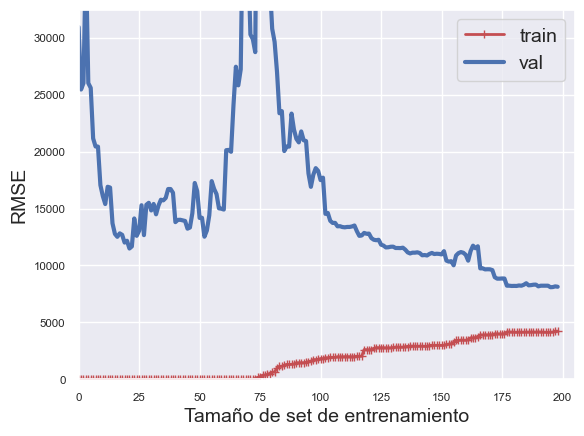

In [298]:
plot_learning_curves(model_poly_regression, X_train, y_train)
plt.show()    

#### Ridge

In [299]:
ridge_reg = Ridge(alpha=1, solver="cholesky")

In [300]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)

In [301]:
model_ridge_reg = Pipeline([
    ("poly_features", poly_features),
    ('scaler', scaler),   
    ('ridge_reg', ridge_reg)  
])

In [302]:
model_ridge_reg.fit(X_train, y_train)

Pipeline(steps=[('poly_features', PolynomialFeatures(include_bias=False)),
                ('scaler', StandardScaler()),
                ('ridge_reg', Ridge(alpha=1, solver='cholesky'))])

In [303]:
display_metrics(model_ridge_reg, X_train, y_train)

RMSE:  6526.392841200804
NRMSE: 0.3013775859560682
MAPE: 0.5454467918593354
MAE 4367.611757849202
R2: 0.9529446754460407


In [304]:
ridge_scores = cross_val_score(model_ridge_reg, X_train, y_train,
                               scoring = 'neg_mean_squared_error', cv =5)

In [305]:
display_scores(rob_rmse, rob_std, ridge_scores)

CV_Scores: [24826.50590189  8137.40550619  9277.09493421  4505.2788035
 10150.98746628]
CV_RMSE: 11379.454522412349
CV_NRMSE: 0.525483619651448
CV_Standard Dev: 6993.102481538742


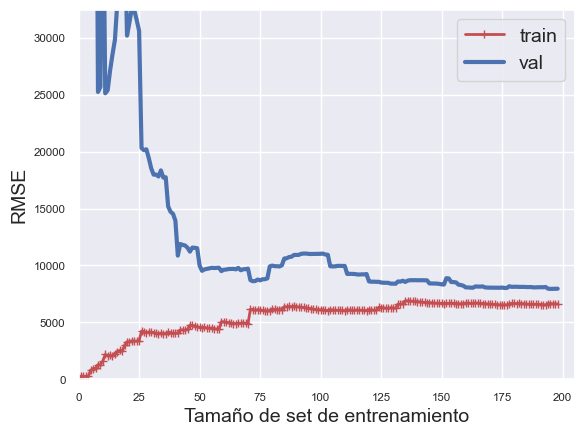

In [306]:
plot_learning_curves(model_ridge_reg, X_train, y_train)
plt.show()  

#### Lasso

In [307]:
lasso_reg = Lasso(alpha=10, max_iter=500_000)

In [308]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)

In [309]:
model_lasso_reg = Pipeline([
    ("poly_features", poly_features),
    ('scaler', scaler),   
    ('lasso_reg', lasso_reg)  
])

In [310]:
model_lasso_reg.fit(X_train,y_train)

Pipeline(steps=[('poly_features', PolynomialFeatures(include_bias=False)),
                ('scaler', StandardScaler()),
                ('lasso_reg', Lasso(alpha=10, max_iter=500000))])

In [311]:
display_metrics(model_lasso_reg, X_train, y_train)

RMSE:  5541.841931738175
NRMSE: 0.2559127199014983
MAPE: 0.45580852579086373
MAE 3723.1851266686244
R2: 0.966071034450009


In [312]:
lasso_scores = cross_val_score(model_lasso_reg, X_train, y_train,
                               scoring = 'neg_mean_squared_error', cv =5)

In [313]:
display_scores(rob_rmse, rob_std, lasso_scores)

CV_Scores: [15804.86020803  7307.81894282  7705.53544025  4426.32479534
 10139.54669135]
CV_RMSE: 9076.817215557889
CV_NRMSE: 0.4191517929046389
CV_Standard Dev: 3821.853079173127


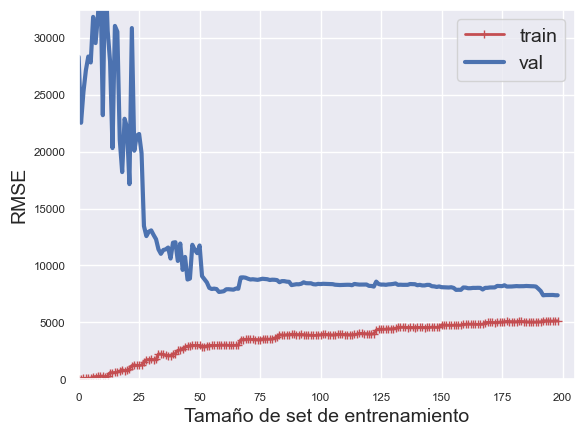

In [314]:
plot_learning_curves(model_lasso_reg, X_train, y_train)
plt.savefig('learning-curves/robos-lasso.png', dpi = 200, bbox_inches = 'tight')
plt.show()  

### K nearest neighbors

In [315]:
neig_reg = KNeighborsRegressor(n_neighbors=4)

In [316]:
model_neig_reg = Pipeline([
    ('scaler', scaler),   
    ('neig_reg', neig_reg)  
])

In [317]:
model_neig_reg.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('neig_reg', KNeighborsRegressor(n_neighbors=4))])

In [318]:
display_metrics(model_neig_reg, X_train, y_train)

RMSE:  5483.867975917629
NRMSE: 0.2532355824262272
MAPE: 0.37503467927887396
MAE 3222.6103515625
R2: 0.9667771923905968


In [319]:
neig_reg_scores = cross_val_score(model_neig_reg, X_train, y_train,
                               scoring = 'neg_mean_squared_error', cv =5)

In [320]:
display_scores(rob_rmse, rob_std, neig_reg_scores)

CV_Scores: [9538.5702654  7132.47968243 9882.79355532 5613.79675071 8957.40192652]
CV_RMSE: 8225.008436078428
CV_NRMSE: 0.3798167298917187
CV_Standard Dev: 1613.8241508413983


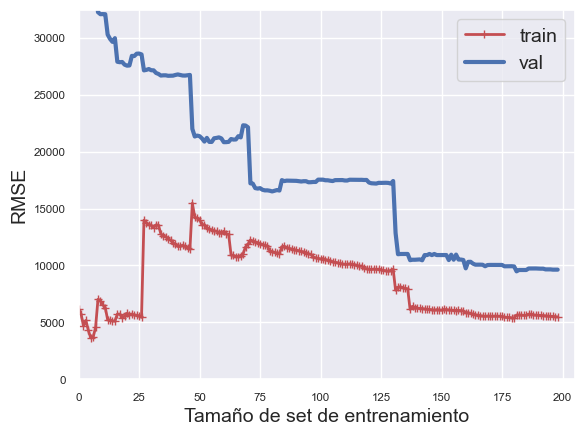

In [321]:
plot_learning_curves(model_neig_reg, X_train, y_train)
plt.savefig('learning-curves/robos-knn.png', dpi = 200, bbox_inches = 'tight')
plt.show()  

### Support Vector Machines

#### LinearSVR

In [322]:
svm_reg = LinearSVR(epsilon=1.5, dual=True)

In [323]:
model_lin_svm = Pipeline([
    ('scaler', scaler),   
    ('svm_reg', svm_reg)  
])

In [324]:
model_lin_svm.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_reg', LinearSVR(dual=True, epsilon=1.5))])

In [325]:
display_metrics(model_lin_svm, X_train, y_train)

RMSE:  36920.34022878683
NRMSE: 1.7049177518987981
MAPE: 0.9543660354748986
MAE 21399.203125
R2: -0.5058916979087358


In [326]:
svm_lin_scores = cross_val_score(model_lin_svm, X_train, y_train,
                               scoring = 'neg_mean_squared_error', cv =5)

In [327]:
display_scores(rob_rmse, rob_std, svm_lin_scores)

CV_Scores: [39359.93440011 34082.43068981 45988.94052538 29198.00020482
 33831.9673699 ]
CV_RMSE: 36492.25463800256
CV_NRMSE: 1.6851494962831275
CV_Standard Dev: 5735.872341809075


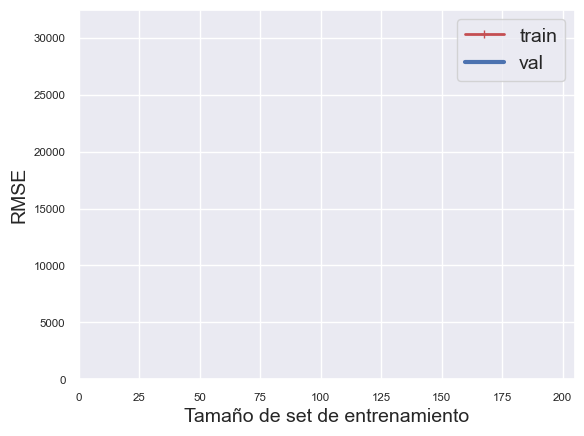

In [328]:
plot_learning_curves(model_lin_svm, X_train, y_train)
plt.show()  

#### Non linear SVR

In [329]:
svm_poly_reg = SVR(kernel="poly", degree=2, C=100, epsilon=0.1)

In [330]:
model_poly_svm = Pipeline([
    ('scaler', scaler),   
    ('svm_poly_reg', svm_poly_reg)  
])

In [331]:
model_poly_svm.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_poly_reg', SVR(C=100, degree=2, kernel='poly'))])

In [332]:
display_metrics(model_poly_svm, X_train, y_train)

RMSE:  29779.67254148668
NRMSE: 1.3751740110489812
MAPE: 1.5320346201551813
MAE 13937.775958207294
R2: 0.020279521651485277


In [333]:
poly_svm_scores = cross_val_score(model_poly_svm, X_train, y_train,
                               scoring = 'neg_mean_squared_error', cv =5)

In [334]:
display_scores(rob_rmse, rob_std, poly_svm_scores)

CV_Scores: [32101.60143345 27599.56080587 38681.70226416 22331.38561958
 27314.08862215]
CV_RMSE: 29605.667749041575
CV_NRMSE: 1.36713876929019
CV_Standard Dev: 5491.722278808162


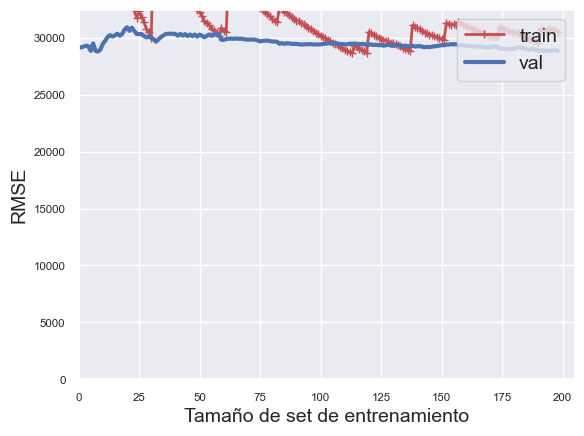

In [335]:
plot_learning_curves(model_poly_svm, X_train, y_train)
plt.show()

#### Gaussian Kernel

In [336]:
svm_gauss_reg = SVR(kernel="rbf", gamma=0.1, C=100)

In [337]:
model_gauss_svm = Pipeline([
    ('scaler', scaler),   
    ('svm_gauss_reg', svm_gauss_reg)  
])

In [338]:
model_gauss_svm.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_gauss_reg', SVR(C=100, gamma=0.1))])

In [339]:
display_metrics(model_gauss_svm, X_train, y_train)

RMSE:  30963.626348332673
NRMSE: 1.429846959624521
MAPE: 1.5300344534480521
MAE 14211.005055233174
R2: -0.05917076756936779


In [340]:
gauss_svm_scores = cross_val_score(model_gauss_svm, X_train, y_train,
                               scoring = 'neg_mean_squared_error', cv =5)

In [341]:
display_scores(rob_rmse, rob_std, gauss_svm_scores)

CV_Scores: [33492.66276357 28095.82325029 39768.60313078 23580.2633919
 28117.45938447]
CV_RMSE: 30610.962384201724
CV_NRMSE: 1.4135615448863044
CV_Standard Dev: 5552.311077611829


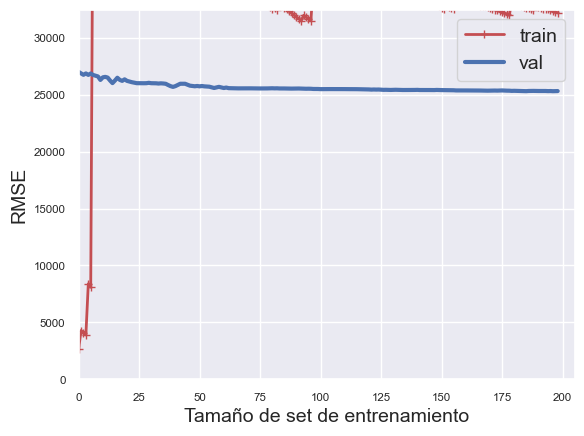

In [342]:
plot_learning_curves(model_gauss_svm, X_train, y_train)
plt.show()

### Decision Tree

In [343]:
tree_reg = DecisionTreeRegressor(max_depth=5)

In [344]:
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5)

In [345]:
display_metrics(tree_reg, X_train, y_train)

RMSE:  4306.643440995743
NRMSE: 0.19887338004342744
MAPE: 0.7564157277583066
MAE 3256.4360698487444
R2: 0.9795100837335937


In [346]:
tree_reg_scores = cross_val_score(tree_reg, X_train, y_train,
                               scoring = 'neg_mean_squared_error', cv =5)

In [347]:
display_scores(rob_rmse, rob_std, tree_reg_scores)

CV_Scores: [14593.86898764 11643.71609454 10908.77332833  8152.05957778
 17027.27650827]
CV_RMSE: 12465.138899311685
CV_NRMSE: 0.5756186551268697
CV_Standard Dev: 3067.3850035708047


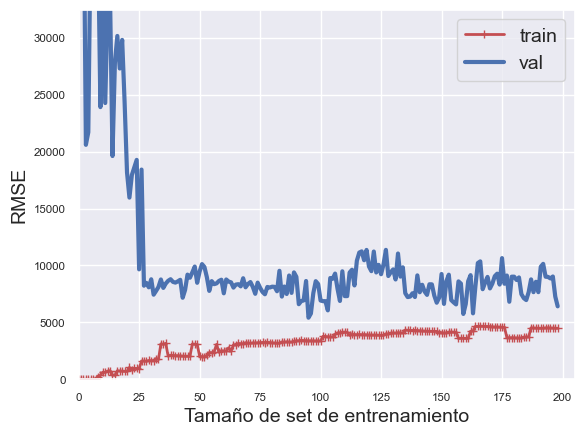

In [348]:
plot_learning_curves(tree_reg, X_train, y_train)
plt.show()

### Random Forest

In [349]:
forest_reg = RandomForestRegressor(n_estimators = 50,  max_leaf_nodes=64, n_jobs=-1, random_state=42)

In [350]:
forest_reg.fit(X_train, y_train)

RandomForestRegressor(max_leaf_nodes=64, n_estimators=50, n_jobs=-1,
                      random_state=42)

In [351]:
display_metrics(tree_reg, X_train, y_train)

RMSE:  5075.42515873642
NRMSE: 0.23437439627971254
MAPE: 0.5902627559175136
MAE 3388.7732403903665
R2: 0.9715418144757049


In [352]:
forest_reg_scores = cross_val_score(forest_reg, X_train, y_train,
                               scoring = 'neg_mean_squared_error', cv =5)

In [353]:
display_scores(rob_rmse, rob_std, forest_reg_scores)

CV_Scores: [ 8696.09984459  8224.82844585  8111.30786294  6310.26933995
 10755.16358514]
CV_RMSE: 8419.533815694074
CV_NRMSE: 0.38879957703902046
CV_Standard Dev: 1422.2211667598706


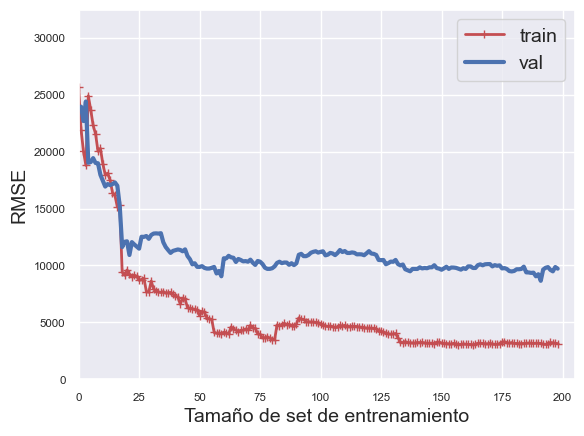

In [354]:
plot_learning_curves(forest_reg, X_train, y_train)
plt.savefig('learning-curves/robos-rf.png', dpi = 200, bbox_inches = 'tight')
plt.show()

#### Extra Trees

In [355]:
extra_trees_reg = ExtraTreesRegressor(n_estimators = 50, n_jobs=-1, random_state=42)

In [356]:
extra_trees_reg.fit(X_train, y_train)

ExtraTreesRegressor(n_estimators=50, n_jobs=-1, random_state=42)

In [357]:
display_metrics(extra_trees_reg, X_train, y_train)

RMSE:  0.0
NRMSE: 0.0
MAPE: 0.0
MAE 0.0
R2: 1.0


In [358]:
extra_trees_reg_scores = cross_val_score(extra_trees_reg, X_train, y_train,
                               scoring = 'neg_mean_squared_error', cv =5)

In [359]:
display_scores(rob_rmse, rob_std, extra_trees_reg_scores)

CV_Scores: [9216.07275737 5679.00108549 6854.80854842 3467.72873643 6161.65534907]
CV_RMSE: 6275.853295354684
CV_NRMSE: 0.2898081010429074
CV_Standard Dev: 1856.6053398432218


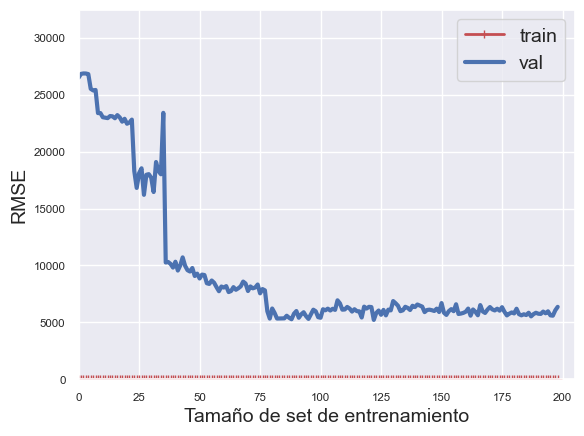

In [360]:
plot_learning_curves(extra_trees_reg, X_train, y_train)
plt.savefig('learning-curves/robos-et.png', dpi = 200, bbox_inches = 'tight')
plt.show()

### Boosting

#### Adaboost

In [361]:
model_adaboost = AdaBoostRegressor(n_estimators=100, learning_rate=0.5, random_state=42)

In [362]:
model_adaboost.fit(X_train, y_train)

AdaBoostRegressor(learning_rate=0.5, n_estimators=100, random_state=42)

In [363]:
display_metrics(model_adaboost, X_train, y_train)

RMSE:  5758.027482514459
NRMSE: 0.2658957964641331
MAPE: 1.2610413398533624
MAE 4690.675059808455
R2: 0.9633722857990695


In [364]:
adaboost_scores = cross_val_score(model_adaboost, X_train, y_train,
                               scoring = 'neg_mean_squared_error', cv =5)

In [365]:
display_scores(rob_rmse, rob_std, adaboost_scores)

CV_Scores: [12041.64569723  9028.73055364  9479.16021996  8218.73863405
  9386.41936366]
CV_RMSE: 9630.938893708462
CV_NRMSE: 0.44474017805863747
CV_Standard Dev: 1284.6243277448884


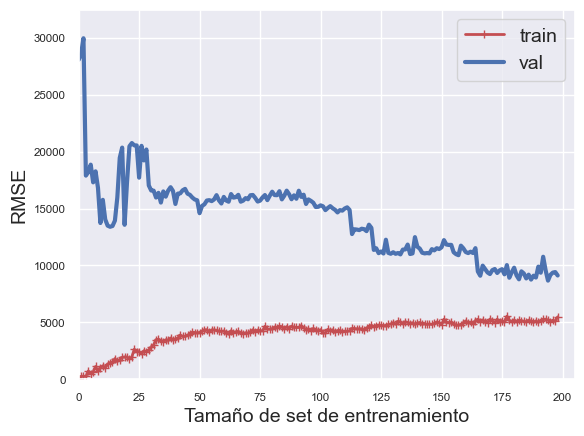

In [366]:
plot_learning_curves(model_adaboost, X_train, y_train)
plt.show()

#### Gradient Boosting

In [367]:
model_gbrt = GradientBoostingRegressor(max_depth=4, n_estimators=50, random_state=42)

In [368]:
model_gbrt.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=4, n_estimators=50, random_state=42)

In [369]:
display_metrics(model_gbrt, X_train, y_train)

RMSE:  1769.1155173513137
NRMSE: 0.08169470898700303
MAPE: 0.267798510079712
MAE 1329.278469819009
R2: 0.9965424001263998


In [370]:
gbrt_scores = cross_val_score(model_gbrt, X_train, y_train,
                               scoring = 'neg_mean_squared_error', cv =5)

In [371]:
display_scores(rob_rmse, rob_std, gbrt_scores)

CV_Scores: [ 9165.32902084  7662.09867313  9932.9377261   5934.25051602
 13353.69577249]
CV_RMSE: 9209.66234171611
CV_NRMSE: 0.4252863521323405
CV_Standard Dev: 2482.796074454236


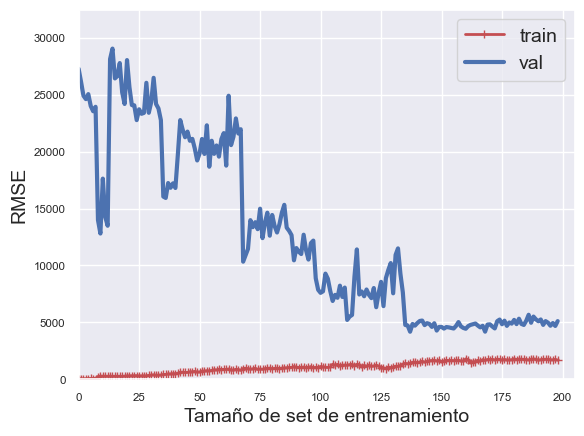

In [372]:
plot_learning_curves(model_gbrt, X_train, y_train)
plt.show()

### Selección de los mejores modelos

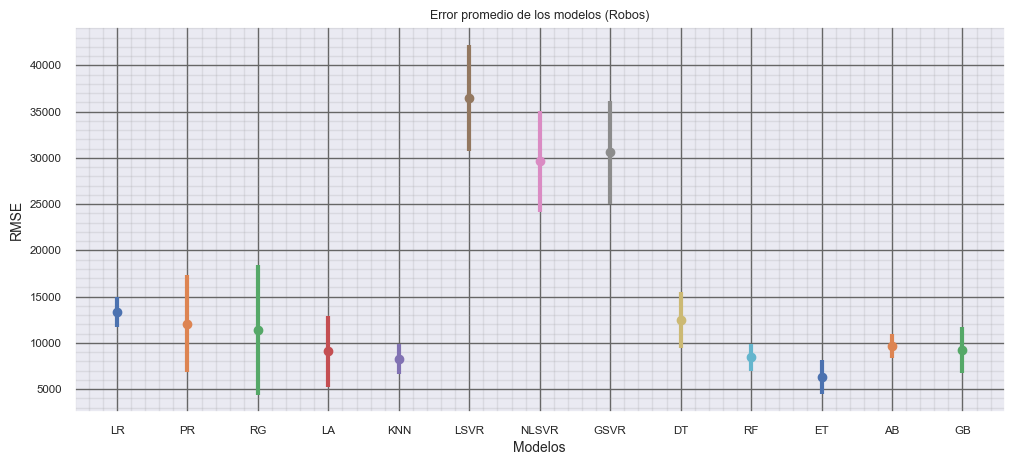

In [373]:
# Grafica para comparar visualmente los resultados
plt.figure(figsize=(12, 5))
for i, (model_mean, model_sd) in enumerate(zip(rob_rmse, rob_std)):
    plt.errorbar(i, model_mean,
                 xerr=0,
                 yerr=model_sd,
                 fmt='o',
                 linewidth=3)
plt.xticks(list(range(0, len(models))), models)
plt.title("Error promedio de los modelos (Robos)")
plt.grid('visible',
         which='major',
         color='#666',
         linestyle='-')
plt.minorticks_on ()
plt.grid('visible',
         which='minor',
         color='#999',
         linestyle='-',
         alpha=0.2)
plt.xlabel("Modelos", fontsize=10)
plt.ylabel("RMSE", fontsize=10)
plt.savefig('box-plots/bp_robos.png', dpi = 200, bbox_inches = 'tight')
plt.show()

### Tuning de los mejores modelos

#### K Nearest Neighbors

In [374]:
n_neighbors=[1, 2, 3, 4, 5, 6, 8, 10]  

params = {'neig_reg__n_neighbors': n_neighbors}

In [375]:
grid_search = GridSearchCV( model_neig_reg, param_grid = params, cv = 5, scoring = 'neg_mean_squared_error',
                           n_jobs = -1, verbose = 2
                   )

In [376]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('neig_reg',
                                        KNeighborsRegressor(n_neighbors=4))]),
             n_jobs=-1,
             param_grid={'neig_reg__n_neighbors': [1, 2, 3, 4, 5, 6, 8, 10]},
             scoring='neg_mean_squared_error', verbose=2)

In [377]:
kneig_tuned = grid_search.best_estimator_

In [378]:
grid_search.best_params_

{'neig_reg__n_neighbors': 2}

In [379]:
display_metrics(kneig_tuned, X_test, y_test)

RMSE:  8432.896323698638
NRMSE: 0.46410139161677394
MAPE: 0.3923725196355291
MAE 4620.75
R2: 0.8818439313399208


#### Lasso

In [380]:
alpha = [1, 5, 10]
max_iter = [100_000, 300_000, 500_000]
degrees = [2,3]

params = {'poly_features__degree':degrees,
          'lasso_reg__alpha':alpha,
          'lasso_reg__max_iter':max_iter,
         }

In [381]:
grid_search = GridSearchCV( model_lasso_reg, param_grid = params, cv = 5, scoring = 'neg_mean_squared_error',
                    n_jobs = -1, verbose = 2
                   )

In [382]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('poly_features',
                                        PolynomialFeatures(include_bias=False)),
                                       ('scaler', StandardScaler()),
                                       ('lasso_reg',
                                        Lasso(alpha=10, max_iter=500000))]),
             n_jobs=-1,
             param_grid={'lasso_reg__alpha': [1, 5, 10],
                         'lasso_reg__max_iter': [100000, 300000, 500000],
                         'poly_features__degree': [2, 3]},
             scoring='neg_mean_squared_error', verbose=2)

In [383]:
lasso_reg_tuned = grid_search.best_estimator_

In [384]:
grid_search.best_params_

{'lasso_reg__alpha': 10,
 'lasso_reg__max_iter': 100000,
 'poly_features__degree': 2}

In [385]:
display_metrics(lasso_reg_tuned, X_test, y_test)

RMSE:  11285.45320958899
NRMSE: 0.6210908255657349
MAPE: 0.5967508042177542
MAE 6928.43537104914
R2: 0.7883878891092788


#### Extra trees

In [386]:
param_grid = {
    'n_estimators': [10, 50, 100, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

In [387]:
grid_search = GridSearchCV(ExtraTreesRegressor(random_state=42), param_grid, cv=5, scoring = 'neg_mean_squared_error',
                    n_jobs = -1, verbose = 2)

In [388]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5, estimator=ExtraTreesRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 50, 100, 500]},
             scoring='neg_mean_squared_error', verbose=2)

In [389]:
extra_trees_tuned = grid_search.best_estimator_

In [390]:
grid_search.best_params_

{'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 100}

In [391]:
display_metrics(extra_trees_tuned, X_test, y_test)

RMSE:  4510.263215790909
NRMSE: 0.2482207007720484
MAPE: 0.3582407289589483
MAE 2840.843783730159
R2: 0.9662008105113506


In [392]:
for name, score in zip(X.keys().to_list(), extra_trees_tuned.feature_importances_):
    print(name,':', score)

Poblacion : 0.6090970794874507
PIB : 0.2138166786896789
EficienciaPrimaria : 0.010400329529425621
EficienciaSecundaria : 0.004493122636407401
EficienciaBachillerato : 0.00498365171402504
Desocupacion : 0.016470569619365296
MedianaSalarios : 0.023676214315250296
Pobreza : 0.014820970682502842
MedicosPorPob : 0.07012923493477391
Internamiento : 0.004206060679656529
PIBPerCapita : 0.027906087711463346


#### Random Forest

In [393]:
param_grid = {
    'n_estimators': [10, 50, 100, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

In [394]:
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring = 'neg_mean_squared_error',
                    n_jobs = -1, verbose = 2)

In [395]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 50, 100, 500]},
             scoring='neg_mean_squared_error', verbose=2)

In [396]:
random_forest_tuned = grid_search.best_estimator_

In [397]:
grid_search.best_params_

{'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}

In [398]:
display_metrics(random_forest_tuned, X_test, y_test)

RMSE:  8880.97756214479
NRMSE: 0.48876138011157116
MAPE: 0.630906148739802
MAE 4881.877207540729
R2: 0.868953913445597


### Modelo con mejor desempeño

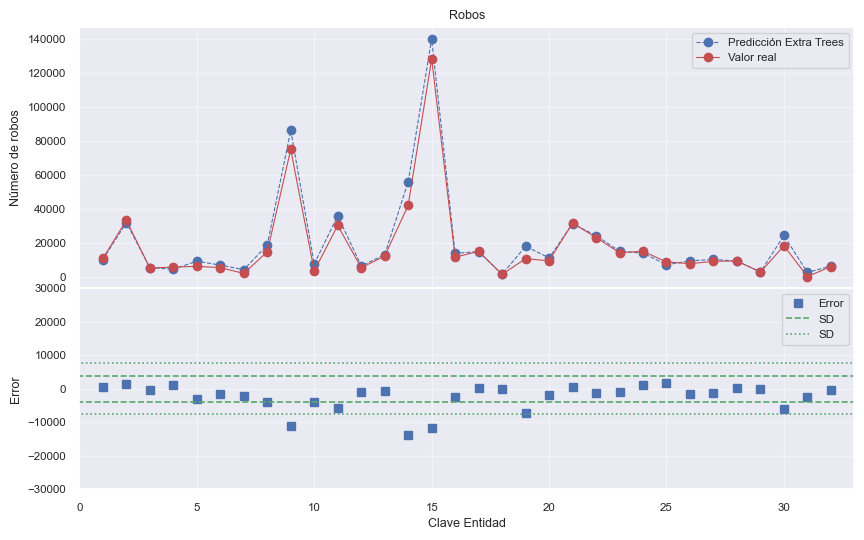

In [399]:
y_real  = y_test #Valores reales de target
muestra_datos = X_test #Datos para predicción

especie = range(1, len(y_real)+1) #Cantidad de eleemntos
y_prediccion = list(extra_trees_tuned.predict(muestra_datos)) #Valores de prediccion  de target


list_delta=[]

for i in range(len(y_real)):
    delta= y_real[i] -y_prediccion[i]
    list_delta.append(delta)

list_delta = np.array(list_delta)
std_list = np.std(list_delta)


fig, axs = plt.subplots(2, 1, sharex=True,gridspec_kw={'height_ratios': [1.3, 1], 'hspace': 0}, figsize=(10, 6))
fig.subplots_adjust(hspace=0)

axs[0].plot(especie, y_prediccion, 'ob--', linewidth=0.8 ,label='Predicción Extra Trees')
axs[0].plot(especie, y_real, 'or-' , linewidth=0.8 ,  label='Valor real')
axs[0].grid (linestyle='-', alpha=0.4)
axs[0].set_ylabel('Número de robos')
axs[0].set_title('Robos')
axs[0].legend()


axs[1].plot(especie, list_delta  , 's', linewidth=0.8 ,label='Error')
axs[1].plot([-5,40,40,-5], [std_list,std_list,-std_list,-std_list]  , 'g--', linewidth=1.18 ,label='SD')
axs[1].plot([-5,40,40,-5], [2*std_list,2*std_list,-2*std_list,-2*std_list]  , 'g:', linewidth=1.18 ,label='SD')

axs[1].set_ylim(-30_000, 30_000)
axs[1].set_xlim(0, 33)

axs[1].grid (linestyle='-', alpha=0.4)

axs[1].set_xlabel('Clave Entidad')
axs[1].set_ylabel('Error')
axs[1].legend(loc='upper right')

plt.savefig('results/robos.png', dpi = 200, bbox_inches = 'tight')
plt.show()

In [400]:
#Error para Yucatan
print('Valor real:', y_real[30])
print('Valor predicho: ', y_prediccion[30])


Valor real: 484.0
Valor predicho:  2852.65


## Robos por cada 100 mil habitantes

In [401]:
X = df_robos[features]
y = df_robos['DelitosPorPob']

In [402]:
X_train, X_test, y_train, y_test = train_test_split(X.values,y.values,train_size = 0.89, shuffle = False)

In [403]:
robporpob_rmse = []
robporpob_std = []

### Regresion

#### Linear Regression

In [404]:
lr = LinearRegression()

In [405]:
model_lr = Pipeline([
    ('scaler', scaler),   
    ('lr', lr)  
])

In [406]:
model_lr.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('lr', LinearRegression())])

In [407]:
display_metrics(model_lr, X_train, y_train)

RMSE:  291.484725597197
NRMSE: 0.5536482081074666
MAPE: 0.9521617551998118
MAE 225.73127327920432
R2: 0.28627840932242954


In [408]:
lr_scores = cross_val_score(model_lr, X_train, y_train,
                               scoring = 'neg_mean_squared_error', cv =5)

In [409]:
display_scores(robporpob_rmse, robporpob_std, lr_scores)

CV_Scores: [324.72176089 341.87922744 332.86087467 273.11046746 298.22755162]
CV_RMSE: 314.15997641751716
CV_NRMSE: 0.5967177444591112
CV_Standard Dev: 25.173542102782676


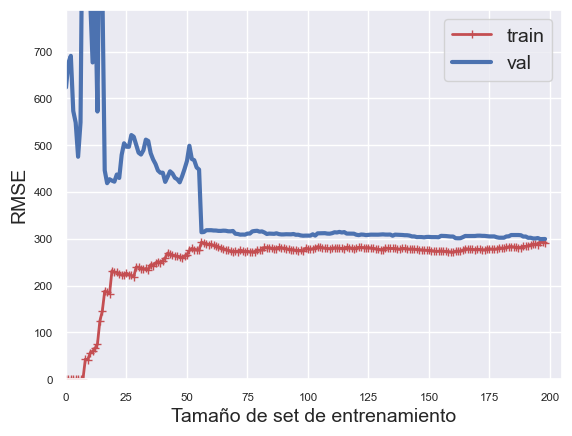

In [410]:
plot_learning_curves(model_lr, X_train, y_train)
plt.show()

#### Polynomial Regression

Para este modelo se utilizara la clase _LinearRegression_ de sklearn, asi como un _Pipeline_ para prepara los datos de manera mas directa

In [411]:
regression = LinearRegression()

In [412]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)

In [413]:
model_poly_regression = Pipeline([
     ("poly_features", poly_features),
    ('scaler', scaler),   
    ('regression', regression)  
])

In [414]:
model_poly_regression.fit(X_train, y_train)

Pipeline(steps=[('poly_features', PolynomialFeatures(include_bias=False)),
                ('scaler', StandardScaler()),
                ('regression', LinearRegression())])

In [415]:
display_metrics(model_poly_regression, X_train, y_train)

RMSE:  121.32591031666054
NRMSE: 0.23044731660022275
MAPE: 0.34042045286381384
MAE 90.27012991389417
R2: 0.8763470880211505


In [416]:
poly_scores = cross_val_score(model_poly_regression, X_train, y_train,
                               scoring = 'neg_mean_squared_error', cv =5)

In [417]:
display_scores(robporpob_rmse, robporpob_std, poly_scores)

CV_Scores: [662.61138824 214.99888901 229.42360969 280.15189747 189.9959012 ]
CV_RMSE: 315.4363371231493
CV_NRMSE: 0.5991420732678481
CV_Standard Dev: 176.06628355917894


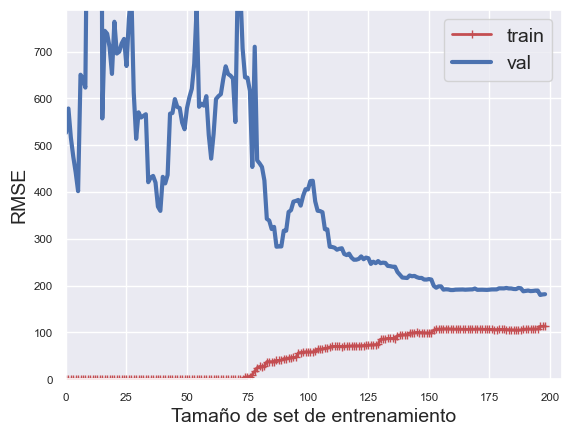

In [418]:
plot_learning_curves(model_poly_regression, X_train, y_train)
plt.show()    

#### Ridge

In [419]:
ridge_reg = Ridge(alpha=1, solver="cholesky")

In [420]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)

In [421]:
model_ridge_reg = Pipeline([
    ("poly_features", poly_features),
    ('scaler', scaler),   
    ('ridge_reg', ridge_reg)  
])

In [422]:
model_ridge_reg.fit(X_train, y_train)

Pipeline(steps=[('poly_features', PolynomialFeatures(include_bias=False)),
                ('scaler', StandardScaler()),
                ('ridge_reg', Ridge(alpha=1, solver='cholesky'))])

In [423]:
display_metrics(model_ridge_reg, X_train, y_train)

RMSE:  192.81188093249514
NRMSE: 0.3662282891887241
MAPE: 0.5492034763454747
MAE 146.0049996694479
R2: 0.6877051561739329


In [424]:
ridge_scores = cross_val_score(model_ridge_reg, X_train, y_train,
                               scoring = 'neg_mean_squared_error', cv =5)

In [425]:
display_scores(robporpob_rmse, robporpob_std, ridge_scores)

CV_Scores: [671.15189048 261.0944143  215.60067781 179.48159425 240.06683368]
CV_RMSE: 313.47908210072853
CV_NRMSE: 0.5954244488408649
CV_Standard Dev: 180.8860736880412


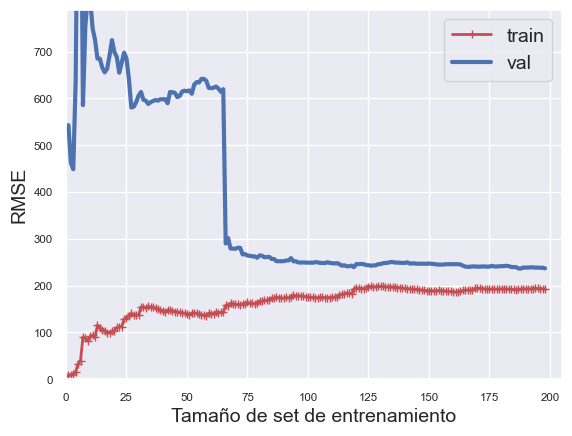

In [426]:
plot_learning_curves(model_ridge_reg, X_train, y_train)
plt.show()  

#### Lasso

In [427]:
lasso_reg = Lasso(alpha=1, max_iter=100_000, tol = 0.01)

In [428]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)

In [429]:
model_lasso_reg = Pipeline([
    ("poly_features", poly_features),
    ('scaler', scaler),   
    ('lasso_reg', lasso_reg)  
])

In [430]:
model_lasso_reg.fit(X_train,y_train)

Pipeline(steps=[('poly_features', PolynomialFeatures(include_bias=False)),
                ('scaler', StandardScaler()),
                ('lasso_reg', Lasso(alpha=1, max_iter=100000, tol=0.01))])

In [431]:
display_metrics(model_lasso_reg, X_train, y_train)

RMSE:  186.00543700306918
NRMSE: 0.3533000800779724
MAPE: 0.5369658468571739
MAE 140.22923798972215
R2: 0.7093646013342629


In [432]:
lasso_scores = cross_val_score(model_lasso_reg, X_train, y_train,
                               scoring = 'neg_mean_squared_error', cv =5)

In [433]:
display_scores(robporpob_rmse, robporpob_std, lasso_scores)

CV_Scores: [525.04456301 248.08849648 197.28823765 176.56157239 226.77296852]
CV_RMSE: 274.7511676086583
CV_NRMSE: 0.5218643663413651
CV_Standard Dev: 127.5157178753235


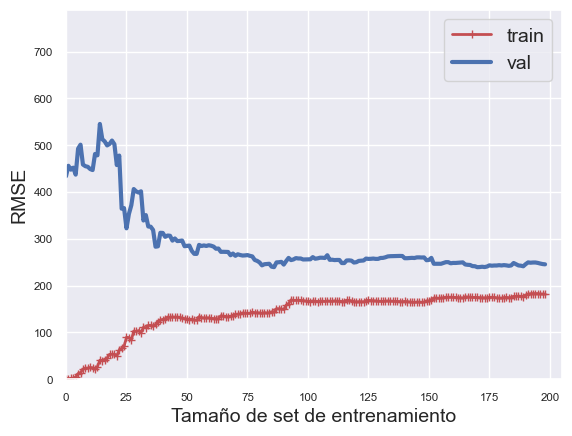

In [434]:
plot_learning_curves(model_lasso_reg, X_train, y_train)
plt.show()  

### K nearest neighbors

In [435]:
neig_reg = KNeighborsRegressor(n_neighbors=4)

In [436]:
model_neig_reg = Pipeline([
    ('scaler', scaler),   
    ('neig_reg', neig_reg)  
])

In [437]:
model_neig_reg.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('neig_reg', KNeighborsRegressor(n_neighbors=4))])

In [438]:
display_metrics(model_neig_reg, X_train, y_train)

RMSE:  140.63725954292752
NRMSE: 0.2671274337945456
MAPE: 0.3152256791015509
MAE 93.81632155106605
R2: 0.8338508891415225


In [439]:
neig_reg_scores = cross_val_score(model_neig_reg, X_train, y_train,
                               scoring = 'neg_mean_squared_error', cv =5)

In [440]:
display_scores(robporpob_rmse, robporpob_std, neig_reg_scores)

CV_Scores: [253.65994798 224.45251586 177.65759922 191.65463233 212.74774673]
CV_RMSE: 212.03448842361462
CV_NRMSE: 0.4027398496857857
CV_Standard Dev: 26.398879038217004


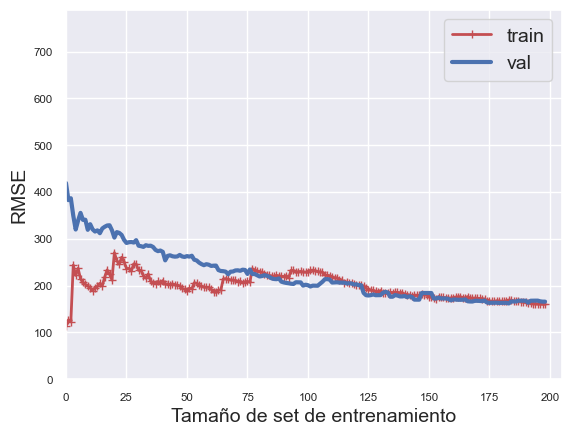

In [441]:
plot_learning_curves(model_neig_reg, X_train, y_train)
plt.savefig('learning-curves/robosporpob-knn.png', dpi = 200, bbox_inches = 'tight')
plt.show()  

### Support Vector Machines

#### LinearSVR

In [442]:
svm_reg = LinearSVR(epsilon=1.5, dual=True)

In [443]:
model_lin_svm = Pipeline([
    ('scaler', scaler),   
    ('svm_reg', svm_reg)  
])

In [444]:
model_lin_svm.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_reg', LinearSVR(dual=True, epsilon=1.5))])

In [445]:
display_metrics(model_lin_svm, X_train, y_train)

RMSE:  466.9847917294815
NRMSE: 0.8869943103356638
MAPE: 0.6406611307331276
MAE 344.5700757617499
R2: -0.8319039770454644


In [446]:
svm_lin_scores = cross_val_score(model_lin_svm, X_train, y_train,
                               scoring = 'neg_mean_squared_error', cv =5)

In [447]:
display_scores(robporpob_rmse, robporpob_std, svm_lin_scores)

CV_Scores: [528.36829113 587.67032088 534.5234176  380.1269997  359.40374786]
CV_RMSE: 478.01855543187395
CV_NRMSE: 0.9079519213734119
CV_Standard Dev: 90.99849917139595


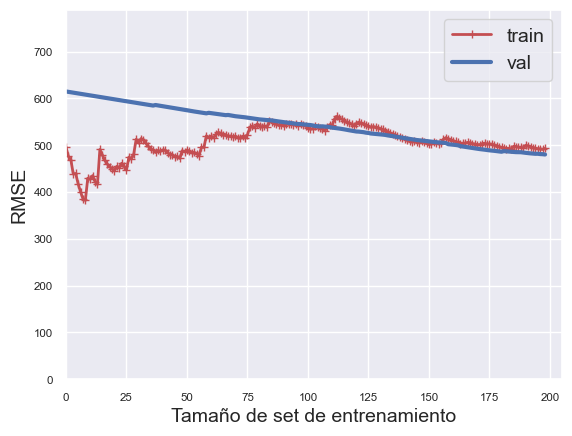

In [448]:
plot_learning_curves(model_lin_svm, X_train, y_train)
plt.show()  

#### Non linear SVR

In [449]:
svm_poly_reg = SVR(kernel="poly", degree=2, C=100, epsilon=0.1)

In [450]:
model_poly_svm = Pipeline([
    ('scaler', scaler),   
    ('svm_poly_reg', svm_poly_reg)  
])

In [451]:
model_poly_svm.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_poly_reg', SVR(C=100, degree=2, kernel='poly'))])

In [452]:
display_metrics(model_poly_svm, X_train, y_train)

RMSE:  257.45631700590405
NRMSE: 0.4890144013008872
MAPE: 0.7410863652235236
MAE 169.67109519961866
R2: 0.4431934497102402


In [453]:
poly_svm_scores = cross_val_score(model_poly_svm, X_train, y_train,
                               scoring = 'neg_mean_squared_error', cv =5)

In [454]:
display_scores(robporpob_rmse, robporpob_std, poly_svm_scores)

CV_Scores: [324.69856202 339.5203629  268.30086692 199.18912805 220.99105685]
CV_RMSE: 270.5399953481726
CV_NRMSE: 0.5138656351170344
CV_Standard Dev: 55.213220729753004


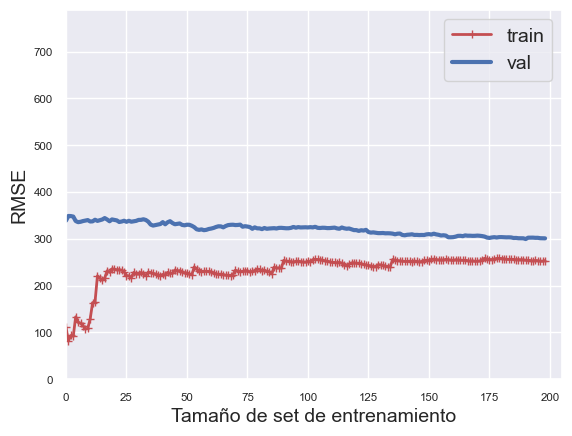

In [455]:
plot_learning_curves(model_poly_svm, X_train, y_train)
plt.show()

#### Gaussian Kernel

In [456]:
svm_gauss_reg = SVR(kernel="rbf", gamma=0.1, C=100)

In [457]:
model_gauss_svm = Pipeline([
    ('scaler', scaler),   
    ('svm_gauss_reg', svm_gauss_reg)  
])

In [458]:
model_gauss_svm.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_gauss_reg', SVR(C=100, gamma=0.1))])

In [459]:
display_metrics(model_gauss_svm, X_train, y_train)

RMSE:  225.30037534101018
NRMSE: 0.4279371717949445
MAPE: 0.4738886527597683
MAE 142.92763237786806
R2: 0.573596204583851


In [460]:
gauss_svm_scores = cross_val_score(model_gauss_svm, X_train, y_train,
                               scoring = 'neg_mean_squared_error', cv =5)

In [461]:
display_scores(robporpob_rmse, robporpob_std, gauss_svm_scores)

CV_Scores: [311.59560804 319.23347256 260.90433319 184.95098966 180.06303795]
CV_RMSE: 251.34948828166574
CV_NRMSE: 0.4774150463999858
CV_Standard Dev: 59.69864981502323


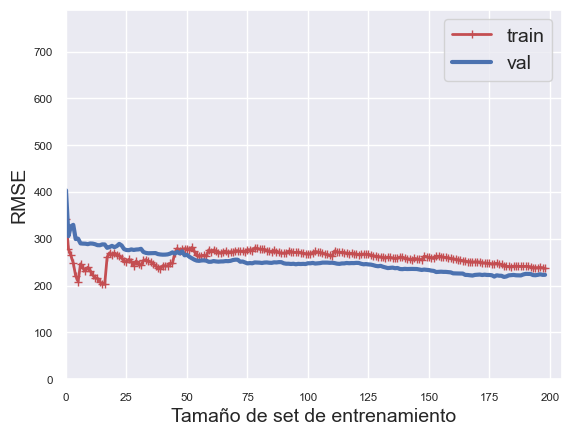

In [462]:
plot_learning_curves(model_gauss_svm, X_train, y_train)
plt.show()

### Decision Tree

In [463]:
tree_reg = DecisionTreeRegressor(max_depth=5)

In [464]:
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5)

In [465]:
display_metrics(tree_reg, X_train, y_train)

RMSE:  137.43752020196044
NRMSE: 0.26104982561487905
MAPE: 0.4538364668277838
MAE 99.03617627992571
R2: 0.8413252392017596


In [466]:
tree_reg_scores = cross_val_score(tree_reg, X_train, y_train,
                               scoring = 'neg_mean_squared_error', cv =5)

In [467]:
display_scores(robporpob_rmse, robporpob_std, tree_reg_scores)

CV_Scores: [304.05227777 239.80359868 278.34349242 238.63873931 290.26268289]
CV_RMSE: 270.22015821346787
CV_NRMSE: 0.513258134136828
CV_Standard Dev: 26.588932968831138


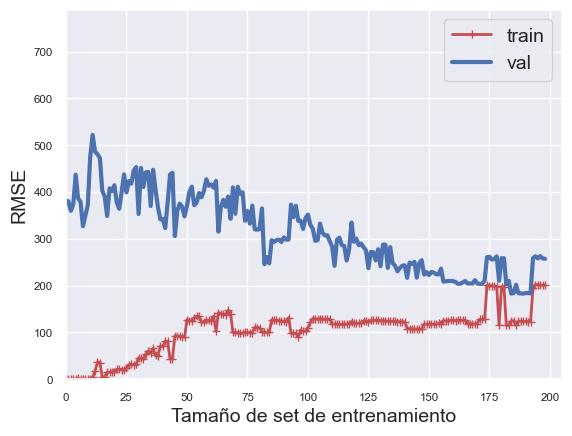

In [468]:
plot_learning_curves(tree_reg, X_train, y_train)
plt.show()

### Random Forest

In [469]:
forest_reg = RandomForestRegressor(n_estimators = 50,  max_leaf_nodes=64, n_jobs=-1, random_state=42)

In [470]:
forest_reg.fit(X_train, y_train)

RandomForestRegressor(max_leaf_nodes=64, n_estimators=50, n_jobs=-1,
                      random_state=42)

In [471]:
display_metrics(tree_reg, X_train, y_train)

RMSE:  213.39197455248626
NRMSE: 0.4053182687135434
MAPE: 0.7458406720461789
MAE 147.77734608265627
R2: 0.6174806621950755


In [472]:
forest_reg_scores = cross_val_score(forest_reg, X_train, y_train,
                               scoring = 'neg_mean_squared_error', cv =5)

In [473]:
display_scores(robporpob_rmse, robporpob_std, forest_reg_scores)

CV_Scores: [235.83028879 211.36337713 179.39789379 147.46279188 194.46639919]
CV_RMSE: 193.70415015786082
CV_NRMSE: 0.36792307184589773
CV_Standard Dev: 29.765661637864998


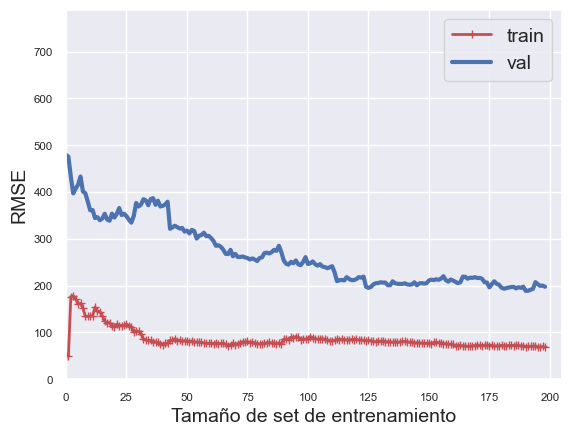

In [474]:
plot_learning_curves(forest_reg, X_train, y_train)
plt.savefig('learning-curves/robosporpob-rf.png', dpi = 200, bbox_inches = 'tight')
plt.show()

#### Extra Trees

In [475]:
extra_trees_reg = ExtraTreesRegressor(n_estimators = 50, n_jobs=-1, random_state=42)

In [476]:
extra_trees_reg.fit(X_train, y_train)

ExtraTreesRegressor(n_estimators=50, n_jobs=-1, random_state=42)

In [477]:
display_metrics(extra_trees_reg, X_train, y_train)

RMSE:  4.24439365856444e-13
NRMSE: 8.061832189499449e-16
MAPE: 5.823814223684266e-16
MAE 3.0232066849933403e-13
R2: 1.0


In [478]:
extra_trees_reg_scores = cross_val_score(extra_trees_reg, X_train, y_train,
                               scoring = 'neg_mean_squared_error', cv =5)

In [479]:
display_scores(robporpob_rmse, robporpob_std, extra_trees_reg_scores)

CV_Scores: [211.01205485 177.90193834 143.13338102 132.4732867  166.35651189]
CV_RMSE: 166.175434561251
CV_NRMSE: 0.31563482919326225
CV_Standard Dev: 27.621141182018842


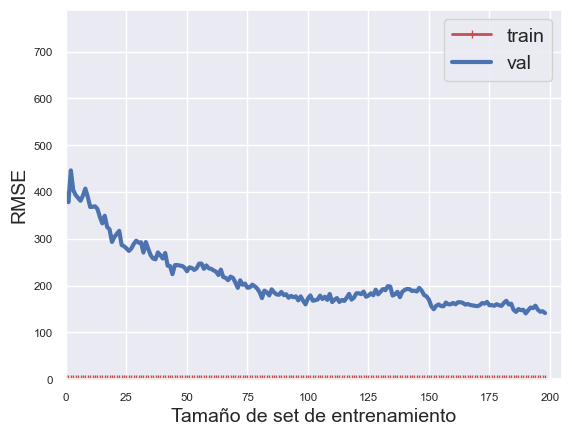

In [480]:
plot_learning_curves(extra_trees_reg, X_train, y_train)
plt.savefig('learning-curves/robosporpob-et.png', dpi = 200, bbox_inches = 'tight')
plt.show()

### Boosting

#### Adaboost

In [481]:
model_adaboost = AdaBoostRegressor(n_estimators=100, learning_rate=0.5, random_state=42)

In [482]:
model_adaboost.fit(X_train, y_train)

AdaBoostRegressor(learning_rate=0.5, n_estimators=100, random_state=42)

In [483]:
display_metrics(model_adaboost, X_train, y_train)

RMSE:  160.63357943621784
NRMSE: 0.30510858925640266
MAPE: 0.6827548597794451
MAE 135.36369270043394
R2: 0.7832446103279226


In [484]:
adaboost_scores = cross_val_score(model_adaboost, X_train, y_train,
                               scoring = 'neg_mean_squared_error', cv =5)

In [485]:
display_scores(robporpob_rmse, robporpob_std, adaboost_scores)

CV_Scores: [226.84472379 252.43963127 227.15703534 185.36235461 239.94929421]
CV_RMSE: 226.3506078424159
CV_NRMSE: 0.42993199104767965
CV_Standard Dev: 22.56764406312216


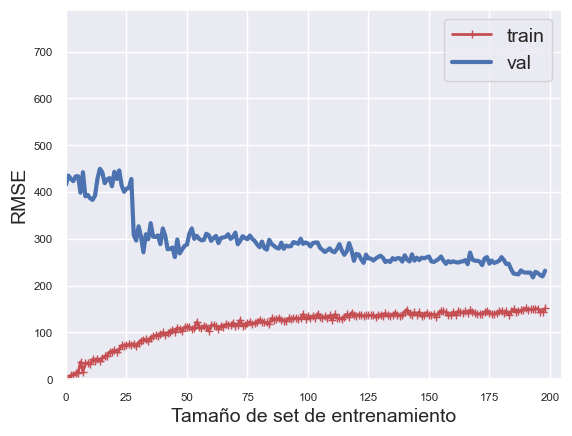

In [486]:
plot_learning_curves(model_adaboost, X_train, y_train)
plt.show()

#### Gradient Boosting

In [487]:
model_gbrt = GradientBoostingRegressor(max_depth=4, n_estimators=50, random_state=42)

In [488]:
model_gbrt.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=4, n_estimators=50, random_state=42)

In [489]:
display_metrics(model_gbrt, X_train, y_train)

RMSE:  62.11554667465743
NRMSE: 0.11798272119261435
MAPE: 0.20613907167940693
MAE 47.414502065803696
R2: 0.9675885952163138


In [490]:
gbrt_scores = cross_val_score(model_gbrt, X_train, y_train,
                               scoring = 'neg_mean_squared_error', cv =5)

In [491]:
display_scores(robporpob_rmse, robporpob_std, gbrt_scores)

CV_Scores: [236.96821141 188.66864874 170.05647722 137.66377601 152.9029947 ]
CV_RMSE: 177.2520216135608
CV_NRMSE: 0.3366737792133475
CV_Standard Dev: 34.37511559020323


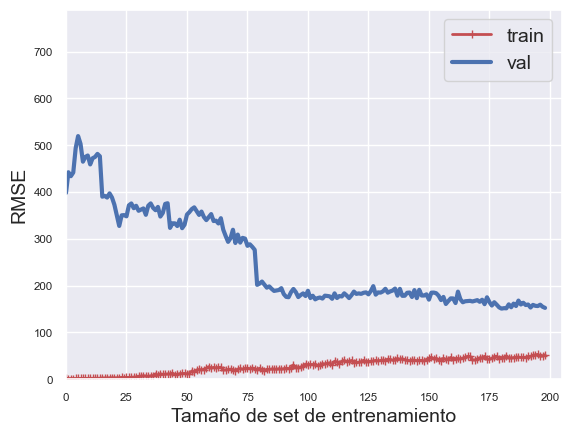

In [492]:
plot_learning_curves(model_gbrt, X_train, y_train)
plt.savefig('learning-curves/robosporpob-gb.png', dpi = 200, bbox_inches = 'tight')
plt.show()

### Selección de los mejores modelos

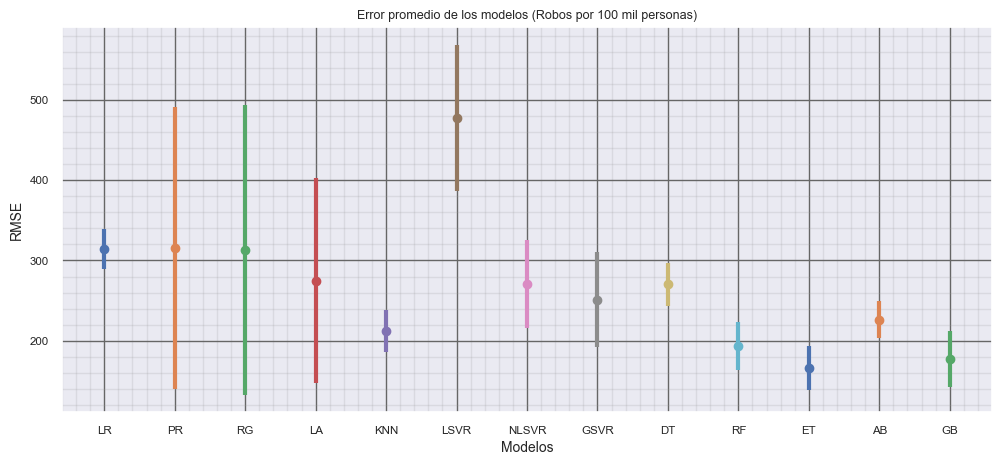

In [493]:
# Grafica para comparar visualmente los resultados
plt.figure(figsize=(12, 5))
for i, (model_mean, model_sd) in enumerate(zip(robporpob_rmse, robporpob_std)):
    plt.errorbar(i, model_mean,
                 xerr=0,
                 yerr=model_sd,
                 fmt='o',
                 linewidth=3)
plt.xticks(list(range(0, len(models))), models)
plt.title("Error promedio de los modelos (Robos por 100 mil personas)")
plt.grid('visible',
         which='major',
         color='#666',
         linestyle='-')
plt.minorticks_on ()
plt.grid('visible',
         which='minor',
         color='#999',
         linestyle='-',
         alpha=0.2)
plt.xlabel("Modelos", fontsize=10)
plt.ylabel("RMSE", fontsize=10)
plt.savefig('box-plots/bp_robosporpob.png', dpi = 200, bbox_inches = 'tight')
plt.show()

### Tuning de los mejores modelos

#### K Nearest Neighbors

In [494]:
n_neighbors=[1, 2, 3, 4, 5, 6, 8, 10]  

params = {'neig_reg__n_neighbors': n_neighbors}

In [495]:
grid_search = GridSearchCV( model_neig_reg, param_grid = params, cv = 5, scoring = 'neg_mean_squared_error',
                           n_jobs = -1, verbose = 2
                   )

In [496]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('neig_reg',
                                        KNeighborsRegressor(n_neighbors=4))]),
             n_jobs=-1,
             param_grid={'neig_reg__n_neighbors': [1, 2, 3, 4, 5, 6, 8, 10]},
             scoring='neg_mean_squared_error', verbose=2)

In [497]:
kneig_tuned = grid_search.best_estimator_

In [498]:
grid_search.best_params_

{'neig_reg__n_neighbors': 2}

In [499]:
display_metrics(kneig_tuned, X_test, y_test)

RMSE:  151.63472538125163
NRMSE: 0.35435318875872485
MAPE: 0.449484084890638
MAE 113.50138669010177
R2: 0.6372854704472455


#### Random Forest

In [500]:
param_grid = {
    'n_estimators': [10, 50, 100, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

In [501]:
grid_search = GridSearchCV( RandomForestRegressor(random_state=42), param_grid, cv = 5, scoring = 'neg_mean_squared_error',
                    n_jobs = -1, verbose = 2
                   )

In [502]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 50, 100, 500]},
             scoring='neg_mean_squared_error', verbose=2)

In [503]:
random_forest_tuned = grid_search.best_estimator_

In [504]:
grid_search.best_params_

{'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 100}

In [505]:
display_metrics(random_forest_tuned, X_test, y_test)

RMSE:  128.04959423974282
NRMSE: 0.2992374070255277
MAPE: 0.5624882297055391
MAE 104.62353258625916
R2: 0.7413431240164732


#### Extra trees

In [506]:
param_grid = {
    'n_estimators': [10, 50, 100, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

In [507]:
grid_search = GridSearchCV(ExtraTreesRegressor(random_state=42), param_grid, cv=5, scoring = 'neg_mean_squared_error',
                    n_jobs = -1, verbose = 2)

In [508]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5, estimator=ExtraTreesRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 50, 100, 500]},
             scoring='neg_mean_squared_error', verbose=2)

In [509]:
extra_trees_tuned = grid_search.best_estimator_

In [510]:
grid_search.best_params_

{'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 500}

In [511]:
display_metrics(extra_trees_tuned, X_test, y_test)

RMSE:  99.87032684711883
NRMSE: 0.23338564891171193
MAPE: 0.5117848081525074
MAE 80.77028576901384
R2: 0.8426594887202045


In [512]:
for name, score in zip(X.keys().to_list(), extra_trees_tuned.feature_importances_):
    print(name,':', score)

Poblacion : 0.1633498483021591
PIB : 0.10722712794973684
EficienciaPrimaria : 0.04141483927954889
EficienciaSecundaria : 0.035853353694483
EficienciaBachillerato : 0.044028923721093134
Desocupacion : 0.0778090358442518
MedianaSalarios : 0.08351759307923093
Pobreza : 0.10021426417376998
MedicosPorPob : 0.13059199956674203
Internamiento : 0.03652359562810038
PIBPerCapita : 0.17946941876088407


#### Gradient Boosting

In [513]:
param_grid = {
    'n_estimators': [10, 50, 100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

In [514]:
grid_search = GridSearchCV(GradientBoostingRegressor(random_state=42), param_grid, cv=5, scoring = 'neg_mean_squared_error',
                    n_jobs = -1, verbose = 2)

In [515]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 45 candidates, totalling 225 fits


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [10, 50, 100, 200, 300]},
             scoring='neg_mean_squared_error', verbose=2)

In [516]:
gbrt_tuned = grid_search.best_estimator_

In [517]:
grid_search.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300}

In [518]:
display_metrics(gbrt_tuned, X_test, y_test)

RMSE:  140.18649902333627
NRMSE: 0.32759997965468035
MAPE: 0.541282448450429
MAE 101.99699349365477
R2: 0.6899869366481617


### Modelo con mejor desempeño

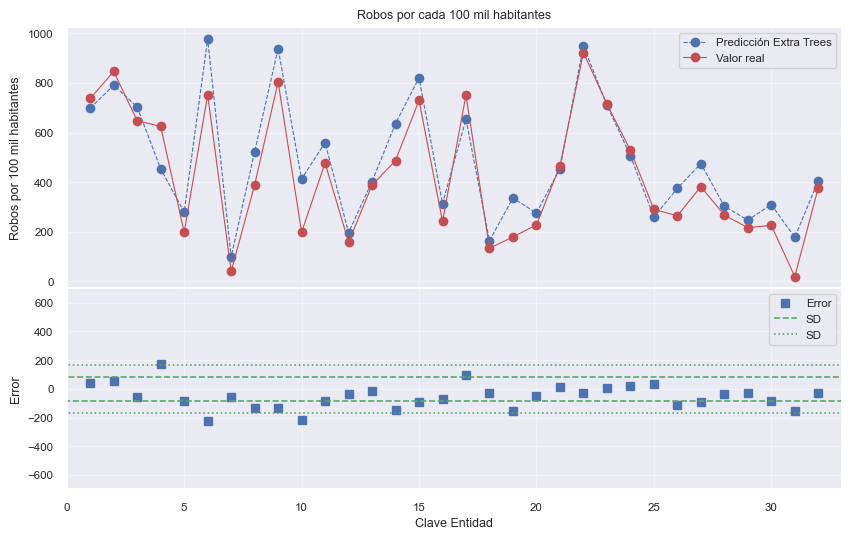

In [519]:
y_real  = y_test #Valores reales de target
muestra_datos = X_test #Datos para predicción

especie = range(1, len(y_real)+1) #Cantidad de eleemntos
y_prediccion = list(extra_trees_tuned.predict(muestra_datos)) #Valores de prediccion  de target


list_delta=[]

for i in range(len(y_real)):
    delta= y_real[i] -y_prediccion[i]
    list_delta.append(delta)

list_delta = np.array(list_delta)
std_list = np.std(list_delta)


fig, axs = plt.subplots(2, 1, sharex=True,gridspec_kw={'height_ratios': [1.3, 1], 'hspace': 0}, figsize=(10, 6))
fig.subplots_adjust(hspace=0)

axs[0].plot(especie, y_prediccion, 'ob--', linewidth=0.8 ,label='Predicción Extra Trees')
axs[0].plot(especie, y_real, 'or-' , linewidth=0.8 ,  label='Valor real')
axs[0].grid (linestyle='-', alpha=0.4)
axs[0].set_ylabel('Robos por 100 mil habitantes')
axs[0].set_title('Robos por cada 100 mil habitantes')
axs[0].legend()


axs[1].plot(especie, list_delta  , 's', linewidth=0.8 ,label='Error')
axs[1].plot([-5,40,40,-5], [std_list,std_list,-std_list,-std_list]  , 'g--', linewidth=1.18 ,label='SD')
axs[1].plot([-5,40,40,-5], [2*std_list,2*std_list,-2*std_list,-2*std_list]  , 'g:', linewidth=1.18 ,label='SD')

axs[1].set_ylim(-700, 700)
axs[1].set_xlim(0, 33)

axs[1].grid (linestyle='-', alpha=0.4)

axs[1].set_xlabel('Clave Entidad')
axs[1].set_ylabel('Error')
axs[1].legend(loc='upper right')

plt.savefig('results/robosporpob.png', dpi = 200, bbox_inches = 'tight')
plt.show()

In [520]:
#Error para Yucatan
print('Valor real:', y_real[30])
print('Valor predicho: ', y_prediccion[30])


Valor real: 19.91364472650687
Valor predicho:  177.85754226898896


## Delitos sexuales

In [521]:
X = df_delitos_s[features]
y = df_delitos_s['DelitosTotales']

In [522]:
X_train, X_test, y_train, y_test = train_test_split(X.values,y.values,train_size = 0.89, shuffle = False)

In [523]:
ds_rmse = []
ds_std = []

### Regresion

#### Linear Regression

In [524]:
lr = LinearRegression()

In [525]:
model_lr = Pipeline([
    ('scaler', scaler),   
    ('lr', lr)  
])

In [526]:
model_lr.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('lr', LinearRegression())])

In [527]:
display_metrics(model_lr, X_train, y_train)

RMSE:  845.9665116908344
NRMSE: 0.6198727638371877
MAPE: 0.6461293005812576
MAE 505.61793330017247
R2: 0.6949329470667562


In [528]:
lr_scores = cross_val_score(model_lr, X_train, y_train,
                               scoring = 'neg_mean_squared_error', cv =5)

In [529]:
display_scores(ds_rmse, ds_std, lr_scores)

CV_Scores: [1026.21657507  739.17933781  583.2389979   729.73202169 1644.41338701]
CV_RMSE: 944.556063897707
CV_NRMSE: 0.692113186321286
CV_Standard Dev: 378.24534437573897


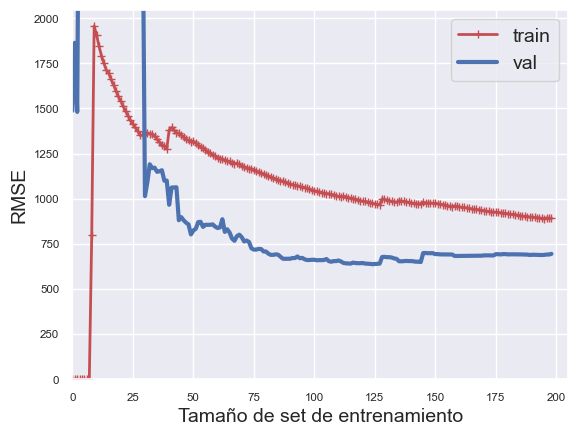

In [530]:
plot_learning_curves(model_lr, X_train, y_train)
plt.show()

#### Polynomial Regression

Para este modelo se utilizara la clase _LinearRegression_ de sklearn, asi como un _Pipeline_ para prepara los datos de manera mas directa

In [531]:
regression = LinearRegression()

In [532]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)

In [533]:
model_poly_regression = Pipeline([
     ("poly_features", poly_features),
    ('scaler', scaler),   
    ('regression', regression)  
])

In [534]:
model_poly_regression.fit(X_train, y_train)

Pipeline(steps=[('poly_features', PolynomialFeatures(include_bias=False)),
                ('scaler', StandardScaler()),
                ('regression', LinearRegression())])

In [535]:
display_metrics(model_poly_regression, X_train, y_train)

RMSE:  476.1271023941222
NRMSE: 0.34887695768115334
MAPE: 0.5346922692329231
MAE 330.5483396589907
R2: 0.9033649289276395


In [536]:
poly_scores = cross_val_score(model_poly_regression, X_train, y_train,
                               scoring = 'neg_mean_squared_error', cv =5)

In [537]:
display_scores(ds_rmse, ds_std, poly_scores)

CV_Scores: [4674.78063683  684.30488822 1535.70138241 1397.69076857 1376.30794028]
CV_RMSE: 1933.7571232622315
CV_NRMSE: 1.416939507676963
CV_Standard Dev: 1402.2058258779427


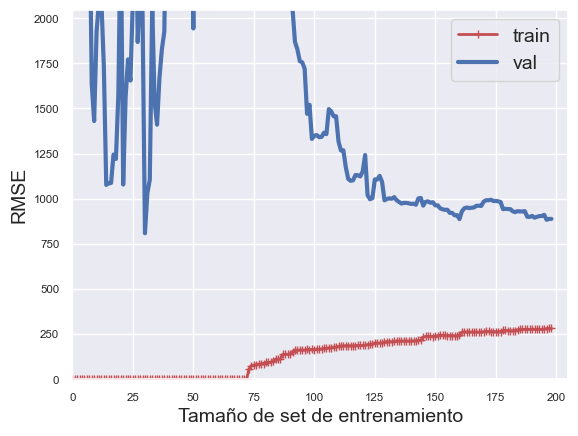

In [538]:
plot_learning_curves(model_poly_regression, X_train, y_train)
plt.show()    

#### Ridge

In [539]:
ridge_reg = Ridge(alpha=1, solver="cholesky")

In [540]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)

In [541]:
model_ridge_reg = Pipeline([
    ("poly_features", poly_features),
    ('scaler', scaler),   
    ('ridge_reg', ridge_reg)  
])

In [542]:
model_ridge_reg.fit(X_train, y_train)

Pipeline(steps=[('poly_features', PolynomialFeatures(include_bias=False)),
                ('scaler', StandardScaler()),
                ('ridge_reg', Ridge(alpha=1, solver='cholesky'))])

In [543]:
display_metrics(model_ridge_reg, X_train, y_train)

RMSE:  622.6335898384299
NRMSE: 0.456227993493042
MAPE: 0.5296446557298167
MAE 363.36007564557264
R2: 0.8347452101163068


In [544]:
ridge_scores = cross_val_score(model_ridge_reg, X_train, y_train,
                               scoring = 'neg_mean_squared_error', cv =5)

In [545]:
display_scores(ds_rmse, ds_std, ridge_scores)

CV_Scores: [3335.66750154  654.24319379  736.96885723  623.78528109 1442.80955103]
CV_RMSE: 1358.694876934682
CV_NRMSE: 0.9955688989314563
CV_Standard Dev: 1033.2844301927464


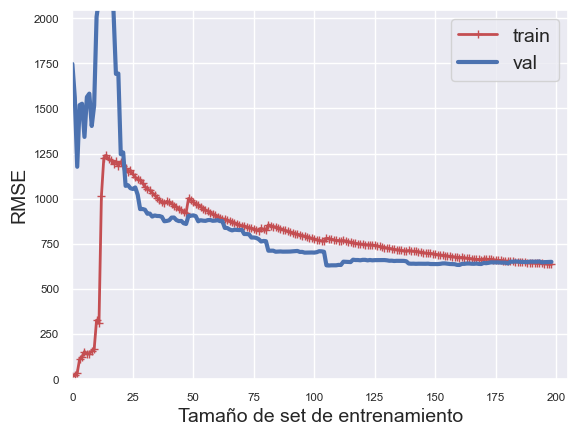

In [546]:
plot_learning_curves(model_ridge_reg, X_train, y_train)
plt.show()  

#### Lasso

In [547]:
lasso_reg = Lasso(alpha=1, max_iter=100_000, tol = 0.01)

In [548]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)

In [549]:
model_lasso_reg = Pipeline([
    ("poly_features", poly_features),
    ('scaler', scaler),   
    ('lasso_reg', lasso_reg)  
])

In [550]:
model_lasso_reg.fit(X_train,y_train)

Pipeline(steps=[('poly_features', PolynomialFeatures(include_bias=False)),
                ('scaler', StandardScaler()),
                ('lasso_reg', Lasso(alpha=1, max_iter=100000, tol=0.01))])

In [551]:
display_metrics(model_lasso_reg, X_train, y_train)

RMSE:  602.5835824094188
NRMSE: 0.4415365685391907
MAPE: 0.5134822399382917
MAE 355.9382425921327
R2: 0.8452168952852237


In [552]:
lasso_scores = cross_val_score(model_lasso_reg, X_train, y_train,
                               scoring = 'neg_mean_squared_error', cv =5)

In [553]:
display_scores(ds_rmse, ds_std, lasso_scores)

CV_Scores: [3424.86228815  653.45930822 1008.96744456 1065.29150181 1402.74982171]
CV_RMSE: 1511.0660728907299
CV_NRMSE: 1.1072172361424344
CV_Standard Dev: 985.9671117645684


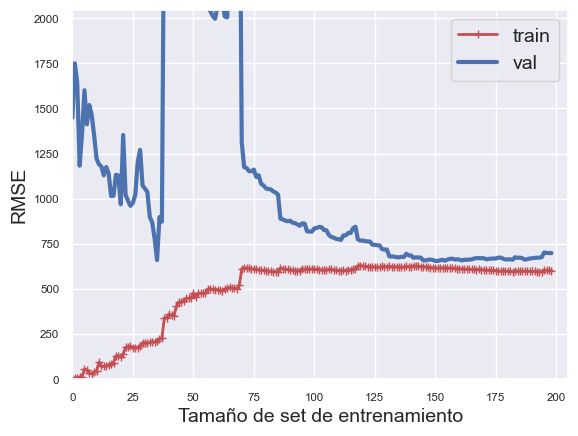

In [554]:
plot_learning_curves(model_lasso_reg, X_train, y_train)
plt.show()  

### K nearest neighbors

In [555]:
neig_reg = KNeighborsRegressor(n_neighbors=4)

In [556]:
model_neig_reg = Pipeline([
    ('scaler', scaler),   
    ('neig_reg', neig_reg)  
])

In [557]:
model_neig_reg.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('neig_reg', KNeighborsRegressor(n_neighbors=4))])

In [558]:
display_metrics(model_neig_reg, X_train, y_train)

RMSE:  734.2211203475783
NRMSE: 0.5379925432601741
MAPE: 0.42631437343688905
MAE 348.4736328125
R2: 0.7702038702820977


In [559]:
neig_reg_scores = cross_val_score(model_neig_reg, X_train, y_train,
                               scoring = 'neg_mean_squared_error', cv =5)

In [560]:
display_scores(ds_rmse, ds_std, neig_reg_scores)

CV_Scores: [1168.79974287  757.58980733  493.57050349  458.48153976 1682.92546262]
CV_RMSE: 912.2734112161991
CV_NRMSE: 0.6684584235556937
CV_Standard Dev: 461.49248054965364


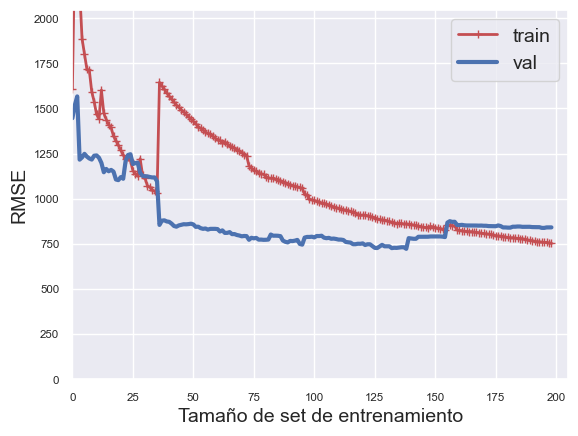

In [561]:
plot_learning_curves(model_neig_reg, X_train, y_train)
plt.show()  

### Support Vector Machines

#### LinearSVR

In [562]:
svm_reg = LinearSVR(epsilon=1.5, dual=True)

In [563]:
model_lin_svm = Pipeline([
    ('scaler', scaler),   
    ('svm_reg', svm_reg)  
])

In [564]:
model_lin_svm.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_reg', LinearSVR(dual=True, epsilon=1.5))])

In [565]:
display_metrics(model_lin_svm, X_train, y_train)

RMSE:  1874.1587131559138
NRMSE: 1.3732694206435336
MAPE: 0.7194238464356745
MAE 1154.9306653310332
R2: -0.49727542458819807


In [566]:
svm_lin_scores = cross_val_score(model_lin_svm, X_train, y_train,
                               scoring = 'neg_mean_squared_error', cv =5)

In [567]:
display_scores(ds_rmse, ds_std, svm_lin_scores)

CV_Scores: [1184.27594762 1019.86762429 1822.81356305 1939.13208708 2959.09936633]
CV_RMSE: 1785.0377176728275
CV_NRMSE: 1.3079669801537717
CV_Standard Dev: 685.5644127541209


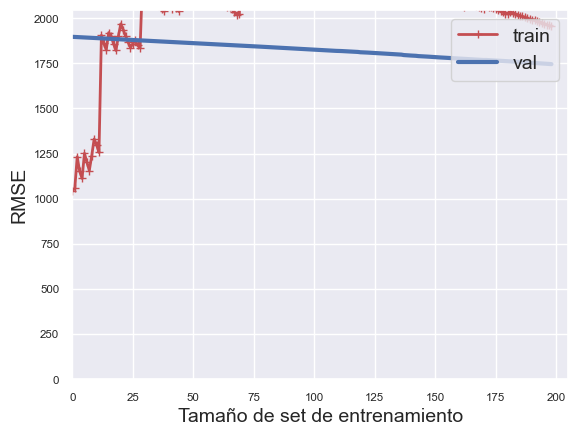

In [568]:
plot_learning_curves(model_lin_svm, X_train, y_train)
plt.show()  

#### Non linear SVR

In [569]:
svm_poly_reg = SVR(kernel="poly", degree=2, C=100, epsilon=0.1)

In [570]:
model_poly_svm = Pipeline([
    ('scaler', scaler),   
    ('svm_poly_reg', svm_poly_reg)  
])

In [571]:
model_poly_svm.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_poly_reg', SVR(C=100, degree=2, kernel='poly'))])

In [572]:
display_metrics(model_poly_svm, X_train, y_train)

RMSE:  1100.2846549858655
NRMSE: 0.8062216183127009
MAPE: 1.1072388142161955
MAE 666.4270618511639
R2: 0.48394133328631517


In [573]:
poly_svm_scores = cross_val_score(model_poly_svm, X_train, y_train,
                               scoring = 'neg_mean_squared_error', cv =5)

In [574]:
display_scores(ds_rmse, ds_std, poly_svm_scores)

CV_Scores: [1096.64644316  743.48685384 1037.57914354 1114.24923032 2135.93513119]
CV_RMSE: 1225.5793604098576
CV_NRMSE: 0.8980299514701253
CV_Standard Dev: 474.4518923672137


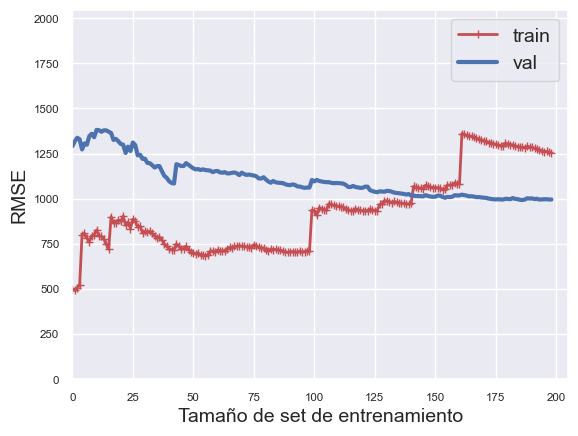

In [575]:
plot_learning_curves(model_poly_svm, X_train, y_train)
plt.show()

#### Gaussian Kernel

In [576]:
svm_gauss_reg = SVR(kernel="rbf", gamma=0.1, C=100)

In [577]:
model_gauss_svm = Pipeline([
    ('scaler', scaler),   
    ('svm_gauss_reg', svm_gauss_reg)  
])

In [578]:
model_gauss_svm.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_gauss_reg', SVR(C=100, gamma=0.1))])

In [579]:
display_metrics(model_gauss_svm, X_train, y_train)

RMSE:  1255.8580295849872
NRMSE: 0.9202163171093347
MAPE: 0.7158924747369408
MAE 559.2583573588136
R2: 0.32768924760119766


In [580]:
gauss_svm_scores = cross_val_score(model_gauss_svm, X_train, y_train,
                               scoring = 'neg_mean_squared_error', cv =5)

In [581]:
display_scores(ds_rmse, ds_std, gauss_svm_scores)

CV_Scores: [ 698.54357744  491.04651233 1117.37784213 1327.57593478 2332.55398668]
CV_RMSE: 1193.4195706718085
CV_NRMSE: 0.8744652151905493
CV_Standard Dev: 641.815807534605


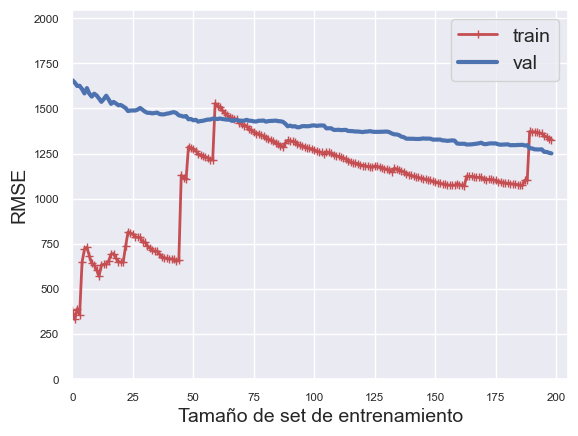

In [582]:
plot_learning_curves(model_gauss_svm, X_train, y_train)
plt.show()

### Decision Tree

In [583]:
tree_reg = DecisionTreeRegressor(max_depth=5)

In [584]:
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5)

In [585]:
display_metrics(tree_reg, X_train, y_train)

RMSE:  358.12041105944746
NRMSE: 0.26240883761017864
MAPE: 0.4385138529637318
MAE 250.65070600320112
R2: 0.9453302469253844


In [586]:
tree_reg_scores = cross_val_score(tree_reg, X_train, y_train,
                               scoring = 'neg_mean_squared_error', cv =5)

In [587]:
display_scores(ds_rmse, ds_std, tree_reg_scores)

CV_Scores: [ 746.13754219  415.18717011  765.12329384  615.33093842 1659.45194363]
CV_RMSE: 840.2461776369813
CV_NRMSE: 0.6156812512524321
CV_Standard Dev: 428.21956860501496


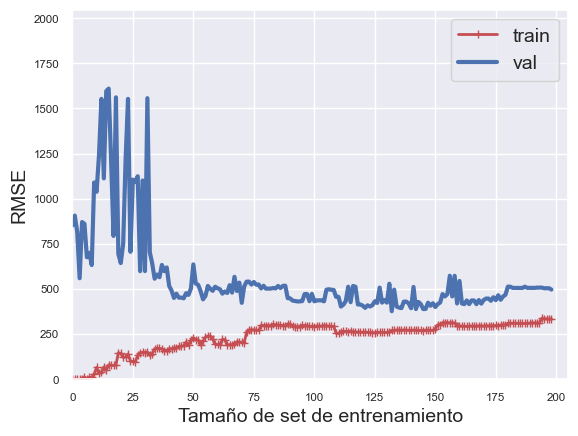

In [588]:
plot_learning_curves(tree_reg, X_train, y_train)
plt.show()

### Random Forest

In [589]:
forest_reg = RandomForestRegressor(n_estimators = 50,  max_leaf_nodes=64, n_jobs=-1, random_state=42)

In [590]:
forest_reg.fit(X_train, y_train)

RandomForestRegressor(max_leaf_nodes=64, n_estimators=50, n_jobs=-1,
                      random_state=42)

In [591]:
display_metrics(tree_reg, X_train, y_train)

RMSE:  373.2604945027446
NRMSE: 0.2735025691456795
MAPE: 0.42333014360041055
MAE 262.2451818343475
R2: 0.940610042037147


In [592]:
forest_reg_scores = cross_val_score(forest_reg, X_train, y_train,
                               scoring = 'neg_mean_squared_error', cv =5)

In [593]:
display_scores(ds_rmse, ds_std, forest_reg_scores)

CV_Scores: [ 900.97942094  441.56859868  309.24500712  310.8450925  1458.17406809]
CV_RMSE: 684.1624374657519
CV_NRMSE: 0.5013125876316854
CV_Standard Dev: 443.8207518619101


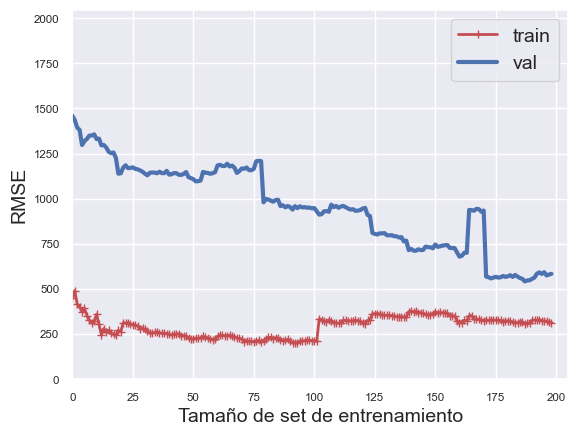

In [594]:
plot_learning_curves(forest_reg, X_train, y_train)
plt.savefig('learning-curves/ds-rf.png', dpi = 200, bbox_inches = 'tight')
plt.show()

#### Extra Trees

In [595]:
extra_trees_reg = ExtraTreesRegressor(n_estimators = 50, n_jobs=-1, random_state=42)

In [596]:
extra_trees_reg.fit(X_train, y_train)

ExtraTreesRegressor(n_estimators=50, n_jobs=-1, random_state=42)

In [597]:
display_metrics(extra_trees_reg, X_train, y_train)

RMSE:  0.0
NRMSE: 0.0
MAPE: 0.0
MAE 0.0
R2: 1.0


In [598]:
extra_trees_reg_scores = cross_val_score(extra_trees_reg, X_train, y_train,
                               scoring = 'neg_mean_squared_error', cv =5)

In [599]:
display_scores(ds_rmse, ds_std, extra_trees_reg_scores)

CV_Scores: [ 889.6836657   415.13480228  707.84285745  289.65797433 1434.30495473]
CV_RMSE: 747.3248508978496
CV_NRMSE: 0.5475941593531559
CV_Standard Dev: 403.3796527671608


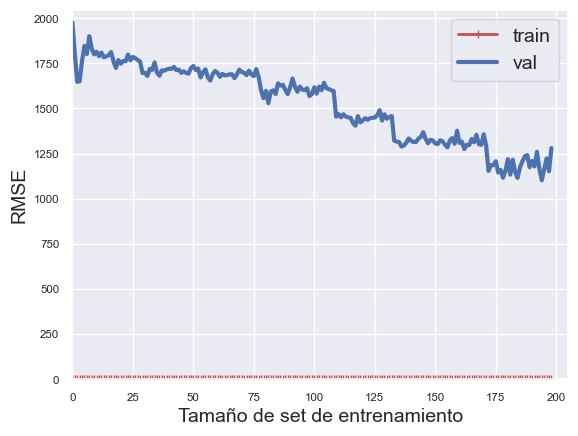

In [600]:
plot_learning_curves(extra_trees_reg, X_train, y_train)
plt.savefig('learning-curves/ds-et.png', dpi = 200, bbox_inches = 'tight')
plt.show()

### Boosting

#### Adaboost

In [601]:
model_adaboost = AdaBoostRegressor(n_estimators=100, learning_rate=0.5, random_state=42)

In [602]:
model_adaboost.fit(X_train, y_train)

AdaBoostRegressor(learning_rate=0.5, n_estimators=100, random_state=42)

In [603]:
display_metrics(model_adaboost, X_train, y_train)

RMSE:  461.1061078761795
NRMSE: 0.33787048726093516
MAPE: 1.0954815831507105
MAE 398.72597294639024
R2: 0.909366090511206


In [604]:
adaboost_scores = cross_val_score(model_adaboost, X_train, y_train,
                               scoring = 'neg_mean_squared_error', cv =5)

In [605]:
display_scores(ds_rmse, ds_std, adaboost_scores)

CV_Scores: [ 824.07179518  556.26911601  541.55920894  587.68495339 1399.83858342]
CV_RMSE: 781.8847313877453
CV_NRMSE: 0.5729175360366335
CV_Standard Dev: 325.5822562766868


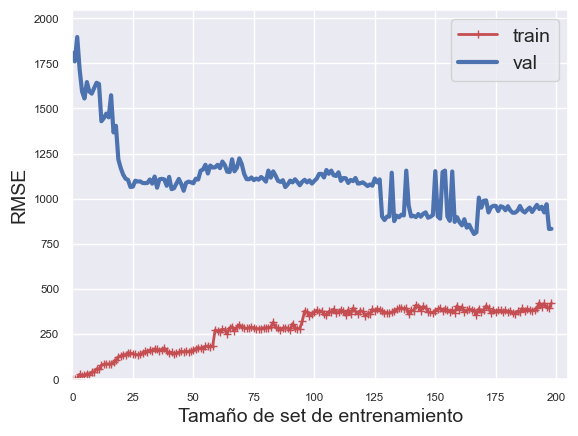

In [606]:
plot_learning_curves(model_adaboost, X_train, y_train)
plt.savefig('learning-curves/ds-adaboost.png', dpi = 200, bbox_inches = 'tight')
plt.show()

#### Gradient Boosting

In [607]:
model_gbrt = GradientBoostingRegressor(max_depth=4, n_estimators=50, random_state=42)

In [608]:
model_gbrt.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=4, n_estimators=50, random_state=42)

In [609]:
display_metrics(model_gbrt, X_train, y_train)

RMSE:  133.10399995481637
NRMSE: 0.09753050881986923
MAPE: 0.2034842880007997
MAE 105.80554371682959
R2: 0.9924478400875564


In [610]:
gbrt_scores = cross_val_score(model_gbrt, X_train, y_train,
                               scoring = 'neg_mean_squared_error', cv =5)

In [611]:
display_scores(ds_rmse, ds_std, gbrt_scores)

CV_Scores: [ 813.68054443  512.79907782  302.12118783  386.36977282 1498.32985652]
CV_RMSE: 702.6600878852389
CV_NRMSE: 0.5148665398645038
CV_Standard Dev: 434.0355053444784


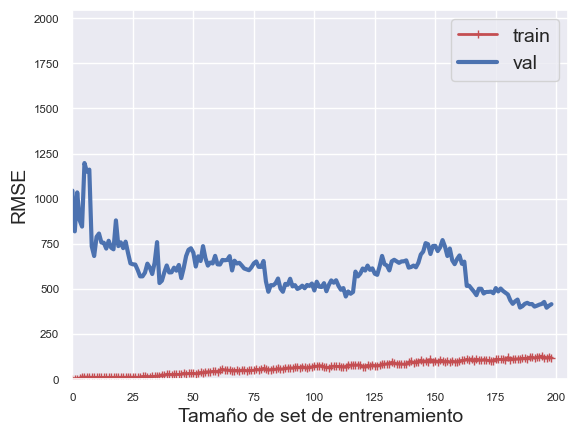

In [612]:
plot_learning_curves(model_gbrt, X_train, y_train)
plt.savefig('learning-curves/ds-gb.png', dpi = 200, bbox_inches = 'tight')
plt.show()

### Selección de los mejores modelos

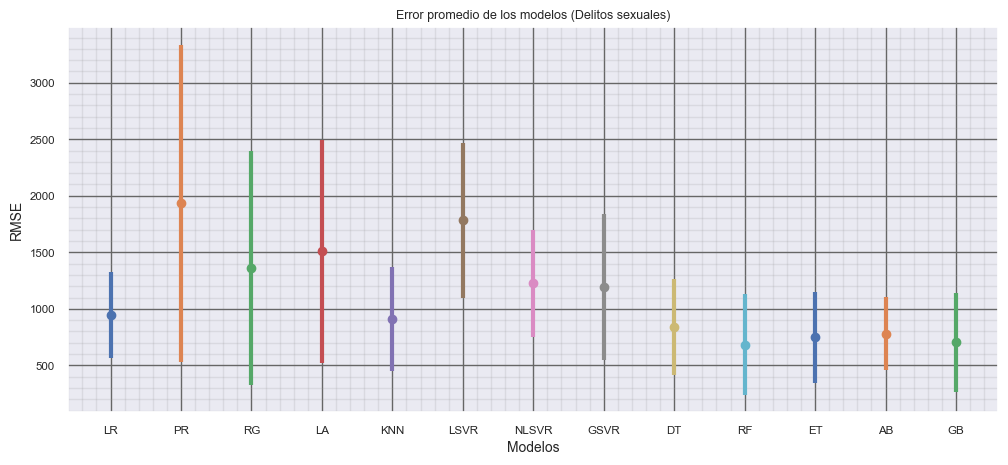

In [613]:
# Grafica para comparar visualmente los resultados
plt.figure(figsize=(12, 5))
for i, (model_mean, model_sd) in enumerate(zip(ds_rmse, ds_std)):
    plt.errorbar(i, model_mean,
                 xerr=0,
                 yerr=model_sd,
                 fmt='o',
                 linewidth=3)
plt.xticks(list(range(0, len(models))), models)
plt.title("Error promedio de los modelos (Delitos sexuales)")
plt.grid('visible',
         which='major',
         color='#666',
         linestyle='-')
plt.minorticks_on ()
plt.grid('visible',
         which='minor',
         color='#999',
         linestyle='-',
         alpha=0.2)
plt.xlabel("Modelos", fontsize=10)
plt.ylabel("RMSE", fontsize=10)
plt.savefig('box-plots/bp_ds.png', dpi = 200, bbox_inches = 'tight')
plt.show()

### Tuning de los mejores modelos

#### Adaptive Boosting

In [614]:
param_grid = {
    'n_estimators': [50,100,500],
    'learning_rate': [0.1,0.5,1]}

In [615]:
grid_search = GridSearchCV( AdaBoostRegressor(random_state=42), param_grid, cv = 5, scoring = 'neg_mean_squared_error',
                           n_jobs = -1, verbose = 2
                   )

In [616]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5, estimator=AdaBoostRegressor(random_state=42), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.5, 1],
                         'n_estimators': [50, 100, 500]},
             scoring='neg_mean_squared_error', verbose=2)

In [617]:
adaboost_tuned = grid_search.best_estimator_

In [618]:
grid_search.best_params_

{'learning_rate': 1, 'n_estimators': 50}

In [619]:
display_metrics(adaboost_tuned, X_test, y_test)

RMSE:  937.7112436986725
NRMSE: 0.3950336992938062
MAPE: 1.3616819687885826
MAE 689.4704798135419
R2: 0.891272637823004


#### Random Forest

In [620]:
param_grid = {
    'n_estimators': [10, 50, 100, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

In [621]:
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv = 5, scoring = 'neg_mean_squared_error',
                    n_jobs = -1, verbose = 2
                   )

In [622]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 50, 100, 500]},
             scoring='neg_mean_squared_error', verbose=2)

In [623]:
random_forest_tuned = grid_search.best_estimator_

In [624]:
grid_search.best_params_

{'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 50}

In [625]:
display_metrics(random_forest_tuned, X_test, y_test)

RMSE:  1160.5315267421647
NRMSE: 0.4889021702968572
MAPE: 0.39591707545722254
MAE 631.186875
R2: 0.8334615606094864


#### Extra trees

In [626]:
param_grid = {
    'n_estimators': [10, 50, 100, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

In [627]:
grid_search = GridSearchCV(ExtraTreesRegressor(random_state=42), param_grid, cv=5, scoring = 'neg_mean_squared_error',
                    n_jobs = -1, verbose = 2)

In [628]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5, estimator=ExtraTreesRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 50, 100, 500]},
             scoring='neg_mean_squared_error', verbose=2)

In [629]:
extra_trees_tuned = grid_search.best_estimator_

In [630]:
grid_search.best_params_

{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}

In [631]:
display_metrics(extra_trees_tuned, X_test, y_test)

RMSE:  1211.810077734956
NRMSE: 0.5105045087877644
MAPE: 0.30755801014936507
MAE 578.2575
R2: 0.8184192838578134


#### Gradient Boosting

In [632]:
param_grid = {
    'n_estimators': [10, 50, 100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

In [633]:
grid_search = GridSearchCV(GradientBoostingRegressor(random_state=42), param_grid, cv=5, scoring = 'neg_mean_squared_error',
                    n_jobs = -1, verbose = 2)

In [634]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 45 candidates, totalling 225 fits


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [10, 50, 100, 200, 300]},
             scoring='neg_mean_squared_error', verbose=2)

In [635]:
gbrt_tuned = grid_search.best_estimator_

In [636]:
grid_search.best_params_

{'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 300}

In [637]:
display_metrics(gbrt_tuned, X_test, y_test)

RMSE:  812.0226876242108
NRMSE: 0.3420843339122531
MAPE: 0.5747785911679675
MAE 490.89239531887284
R2: 0.9184663411794849


In [638]:
for name, score in zip(X.keys().to_list(), gbrt_tuned.feature_importances_):
    print(name,':', score)

Poblacion : 0.5959752294814498
PIB : 0.21554164252591132
EficienciaPrimaria : 0.012478488918950441
EficienciaSecundaria : 0.013105878999931183
EficienciaBachillerato : 0.00669006422132938
Desocupacion : 0.012539518684235274
MedianaSalarios : 0.05832737966038642
Pobreza : 0.01767993275825473
MedicosPorPob : 0.05433177096708177
Internamiento : 0.0028624730408415614
PIBPerCapita : 0.010467620741628074


### Modelo con mejor desempeño

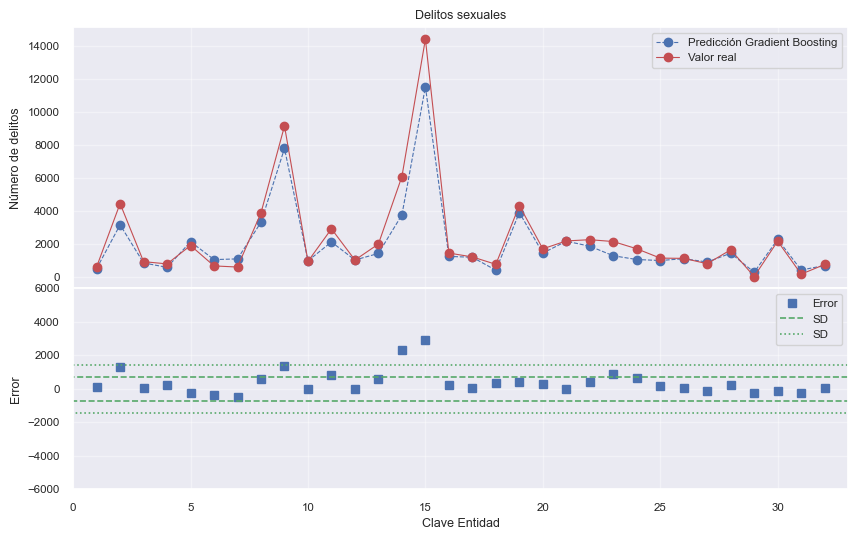

In [639]:
y_real  = y_test #Valores reales de target
muestra_datos = X_test #Datos para predicción

especie = range(1, len(y_real)+1) #Cantidad de eleemntos
y_prediccion = list(gbrt_tuned.predict(muestra_datos)) #Valores de prediccion  de target


list_delta=[]

for i in range(len(y_real)):
    delta= y_real[i] -y_prediccion[i]
    list_delta.append(delta)

list_delta = np.array(list_delta)
std_list = np.std(list_delta)


fig, axs = plt.subplots(2, 1, sharex=True,gridspec_kw={'height_ratios': [1.3, 1], 'hspace': 0}, figsize=(10, 6))
fig.subplots_adjust(hspace=0)

axs[0].plot(especie, y_prediccion, 'ob--', linewidth=0.8 ,label='Predicción Gradient Boosting')
axs[0].plot(especie, y_real, 'or-' , linewidth=0.8 ,  label='Valor real')
axs[0].grid (linestyle='-', alpha=0.4)
axs[0].set_ylabel('Número de delitos')
axs[0].set_title('Delitos sexuales')
axs[0].legend()


axs[1].plot(especie, list_delta  , 's', linewidth=0.8 ,label='Error')
axs[1].plot([-5,40,40,-5], [std_list,std_list,-std_list,-std_list]  , 'g--', linewidth=1.18 ,label='SD')
axs[1].plot([-5,40,40,-5], [2*std_list,2*std_list,-2*std_list,-2*std_list]  , 'g:', linewidth=1.18 ,label='SD')

axs[1].set_ylim(-6000, 6000)
axs[1].set_xlim(0, 33)

axs[1].grid (linestyle='-', alpha=0.4)

axs[1].set_xlabel('Clave Entidad')
axs[1].set_ylabel('Error')
axs[1].legend(loc='upper right')

plt.savefig('results/dels.png', dpi = 200, bbox_inches = 'tight')
plt.show()

In [640]:
#Error para Yucatan
print('Valor real:', y_real[30])
print('Valor predicho: ', y_prediccion[30])


Valor real: 166.0
Valor predicho:  418.1583993073791


## Delitos sexuales por cada 100 mil habitantes

In [641]:
X = df_delitos_s[features]
y = df_delitos_s['DelitosPorPob']

In [642]:
X_train, X_test, y_train, y_test = train_test_split(X.values,y.values,train_size = 0.89, shuffle = False)

In [643]:
dsporpob_rmse = []
dsporpob_std = []

### Regresion

#### Linear Regression

In [644]:
lr = LinearRegression()

In [645]:
model_lr = Pipeline([
    ('scaler', scaler),   
    ('lr', lr)  
])

In [646]:
model_lr.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('lr', LinearRegression())])

In [647]:
display_metrics(model_lr, X_train, y_train)

RMSE:  16.800095812850802
NRMSE: 0.4687214448439032
MAPE: 0.6067282510480806
MAE 13.08466939124191
R2: 0.42837797884449225


In [648]:
lr_scores = cross_val_score(model_lr, X_train, y_train,
                               scoring = 'neg_mean_squared_error', cv =5)

In [649]:
display_scores(dsporpob_rmse, dsporpob_std, lr_scores)

CV_Scores: [16.09251836 12.42784758 14.55699849 18.98007148 25.89373168]
CV_RMSE: 17.590233518017968
CV_NRMSE: 0.4907662290473544
CV_Standard Dev: 4.668482092583451


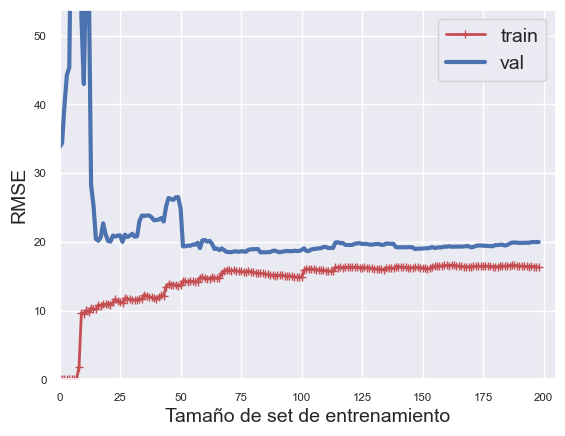

In [650]:
plot_learning_curves(model_lr, X_train, y_train)
plt.show()

#### Polynomial Regression

Para este modelo se utilizara la clase _LinearRegression_ de sklearn, asi como un _Pipeline_ para prepara los datos de manera mas directa

In [651]:
regression = LinearRegression()

In [652]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)

In [653]:
model_poly_regression = Pipeline([
     ("poly_features", poly_features),
    ('scaler', scaler),   
    ('regression', regression)  
])

In [654]:
model_poly_regression.fit(X_train, y_train)

Pipeline(steps=[('poly_features', PolynomialFeatures(include_bias=False)),
                ('scaler', StandardScaler()),
                ('regression', LinearRegression())])

In [655]:
display_metrics(model_poly_regression, X_train, y_train)

RMSE:  10.504897270980036
NRMSE: 0.2930858657975123
MAPE: 0.35413771152526186
MAE 7.912945686523009
R2: 0.7765043608836103


In [656]:
poly_scores = cross_val_score(model_poly_regression, X_train, y_train,
                               scoring = 'neg_mean_squared_error', cv =5)

In [657]:
display_scores(dsporpob_rmse, dsporpob_std, poly_scores)

CV_Scores: [91.29328791 21.4764363  23.86480632 20.88616899 25.10852551]
CV_RMSE: 36.52584500537431
CV_NRMSE: 1.0190684050722891
CV_Standard Dev: 27.427045247770977


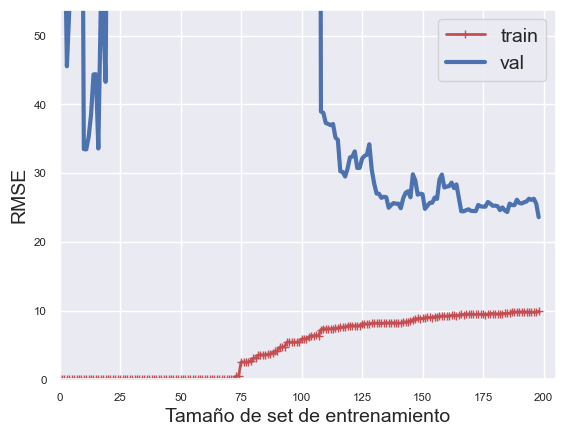

In [658]:
plot_learning_curves(model_poly_regression, X_train, y_train)
plt.show()    

#### Ridge

In [659]:
ridge_reg = Ridge(alpha=1, solver="cholesky")

In [660]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)

In [661]:
model_ridge_reg = Pipeline([
    ("poly_features", poly_features),
    ('scaler', scaler),   
    ('ridge_reg', ridge_reg)  
])

In [662]:
model_ridge_reg.fit(X_train, y_train)

Pipeline(steps=[('poly_features', PolynomialFeatures(include_bias=False)),
                ('scaler', StandardScaler()),
                ('ridge_reg', Ridge(alpha=1, solver='cholesky'))])

In [663]:
display_metrics(model_ridge_reg, X_train, y_train)

RMSE:  12.950153219515938
NRMSE: 0.3613083279774115
MAPE: 0.4475116602619825
MAE 9.921971853054316
R2: 0.6603471620561674


In [664]:
ridge_scores = cross_val_score(model_ridge_reg, X_train, y_train,
                               scoring = 'neg_mean_squared_error', cv =5)

In [665]:
display_scores(dsporpob_rmse, dsporpob_std, ridge_scores)

CV_Scores: [65.93562752 12.01429961 12.10061885 15.77717528 23.33124308]
CV_RMSE: 25.831792869332396
CV_NRMSE: 0.7207051323695594
CV_Standard Dev: 20.47014361368198


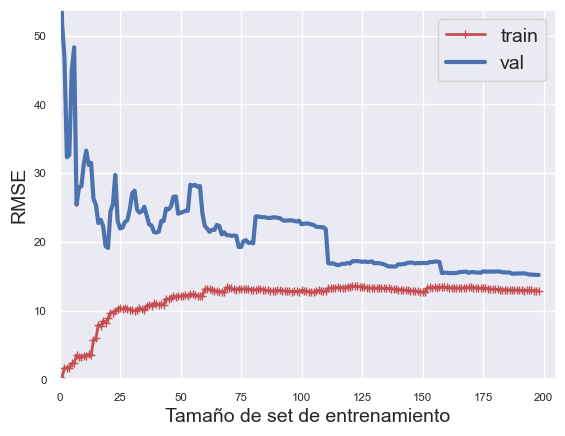

In [666]:
plot_learning_curves(model_ridge_reg, X_train, y_train)
plt.show()  

#### Lasso

In [667]:
lasso_reg = Lasso(alpha=1, max_iter=100_000, tol = 0.01)

In [668]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)

In [669]:
model_lasso_reg = Pipeline([
    ("poly_features", poly_features),
    ('scaler', scaler),   
    ('lasso_reg', lasso_reg)  
])

In [670]:
model_lasso_reg.fit(X_train,y_train)

Pipeline(steps=[('poly_features', PolynomialFeatures(include_bias=False)),
                ('scaler', StandardScaler()),
                ('lasso_reg', Lasso(alpha=1, max_iter=100000, tol=0.01))])

In [671]:
display_metrics(model_lasso_reg, X_train, y_train)

RMSE:  16.937391492172253
NRMSE: 0.4725519842586338
MAPE: 0.6328434550480213
MAE 13.218650241463116
R2: 0.4189968513462593


In [672]:
lasso_scores = cross_val_score(model_lasso_reg, X_train, y_train,
                               scoring = 'neg_mean_squared_error', cv =5)

In [673]:
display_scores(dsporpob_rmse, dsporpob_std, lasso_scores)

CV_Scores: [21.78010806 12.86777853 14.13249533 18.14374581 26.19423444]
CV_RMSE: 18.623672433546858
CV_NRMSE: 0.519599099230993
CV_Standard Dev: 4.915441197655353


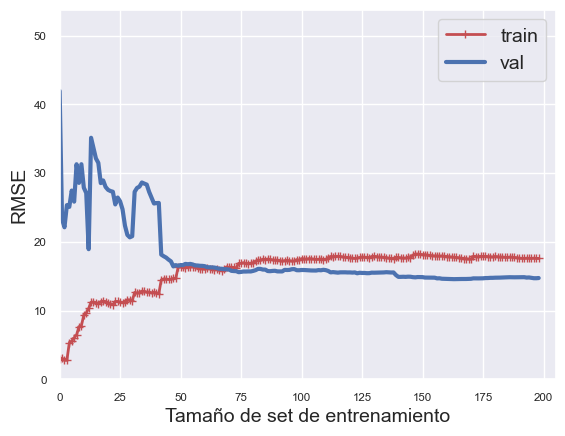

In [674]:
plot_learning_curves(model_lasso_reg, X_train, y_train)
plt.show()  

### K nearest neighbors

In [675]:
neig_reg = KNeighborsRegressor(n_neighbors=4)

In [676]:
model_neig_reg = Pipeline([
    ('scaler', scaler),   
    ('neig_reg', neig_reg)  
])

In [677]:
model_neig_reg.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('neig_reg', KNeighborsRegressor(n_neighbors=4))])

In [678]:
display_metrics(model_neig_reg, X_train, y_train)

RMSE:  11.232000241329459
NRMSE: 0.3133719855083167
MAPE: 0.3431440384264432
MAE 7.905218187437876
R2: 0.7444948593916664


In [679]:
neig_reg_scores = cross_val_score(model_neig_reg, X_train, y_train,
                               scoring = 'neg_mean_squared_error', cv =5)

In [680]:
display_scores(dsporpob_rmse, dsporpob_std, neig_reg_scores)

CV_Scores: [17.46746911 14.34772999  9.5726586  11.16551912 25.22084677]
CV_RMSE: 15.554844716101082
CV_NRMSE: 0.43397903029079593
CV_Standard Dev: 5.542555074917702


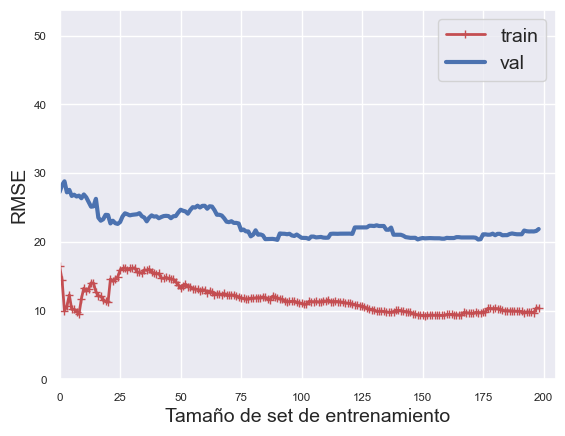

In [681]:
plot_learning_curves(model_neig_reg, X_train, y_train)
plt.show()  

### Support Vector Machines

#### LinearSVR

In [682]:
svm_reg = LinearSVR(epsilon=1.5, dual=True)

In [683]:
model_lin_svm = Pipeline([
    ('scaler', scaler),   
    ('svm_reg', svm_reg)  
])

In [684]:
model_lin_svm.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_reg', LinearSVR(dual=True, epsilon=1.5))])

In [685]:
display_metrics(model_lin_svm, X_train, y_train)

RMSE:  18.0632647002925
NRMSE: 0.503963764447262
MAPE: 0.5343201862272711
MAE 13.068320148865297
R2: 0.33918799173851566


In [686]:
svm_lin_scores = cross_val_score(model_lin_svm, X_train, y_train,
                               scoring = 'neg_mean_squared_error', cv =5)

In [687]:
display_scores(dsporpob_rmse, dsporpob_std, svm_lin_scores)

CV_Scores: [16.98192081 10.60430699 14.62285081 20.79350055 28.95822346]
CV_RMSE: 18.39216052510179
CV_NRMSE: 0.5131399339123086
CV_Standard Dev: 6.233061117666696


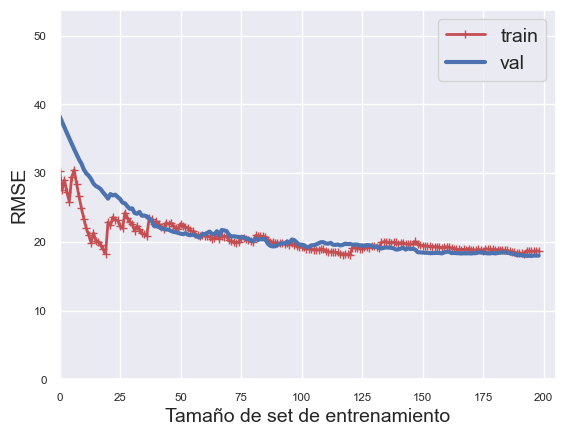

In [688]:
plot_learning_curves(model_lin_svm, X_train, y_train)
plt.show()  

#### Non linear SVR

In [689]:
svm_poly_reg = SVR(kernel="poly", degree=2, C=100, epsilon=0.1)

In [690]:
model_poly_svm = Pipeline([
    ('scaler', scaler),   
    ('svm_poly_reg', svm_poly_reg)  
])

In [691]:
model_poly_svm.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_poly_reg', SVR(C=100, degree=2, kernel='poly'))])

In [692]:
display_metrics(model_poly_svm, X_train, y_train)

RMSE:  14.929239083228174
NRMSE: 0.4165246788746349
MAPE: 0.46166266622534774
MAE 9.986229441429412
R2: 0.5486008050382734


In [693]:
poly_svm_scores = cross_val_score(model_poly_svm, X_train, y_train,
                               scoring = 'neg_mean_squared_error', cv =5)

In [694]:
display_scores(dsporpob_rmse, dsporpob_std, poly_svm_scores)

CV_Scores: [25.15701248 13.88787348 14.53017578 15.83229611 28.63881394]
CV_RMSE: 19.609234357619897
CV_NRMSE: 0.5470962048535272
CV_Standard Dev: 6.0845249337737615


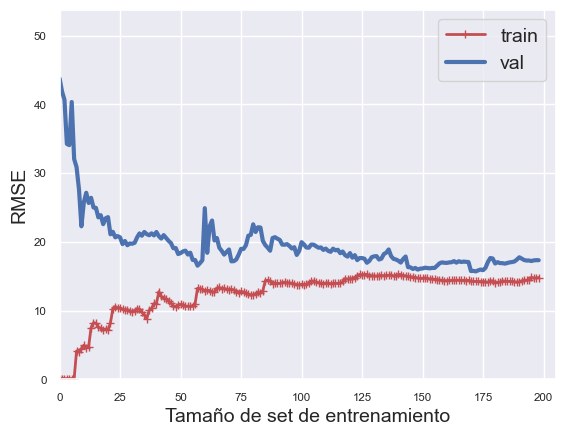

In [695]:
plot_learning_curves(model_poly_svm, X_train, y_train)
plt.show()

#### Gaussian Kernel

In [696]:
svm_gauss_reg = SVR(kernel="rbf", gamma=0.1, C=100)

In [697]:
model_gauss_svm = Pipeline([
    ('scaler', scaler),   
    ('svm_gauss_reg', svm_gauss_reg)  
])

In [698]:
model_gauss_svm.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_gauss_reg', SVR(C=100, gamma=0.1))])

In [699]:
display_metrics(model_gauss_svm, X_train, y_train)

RMSE:  8.60886867392209
NRMSE: 0.24018680656723318
MAPE: 0.14758453387202516
MAE 3.7533367868660967
R2: 0.8499010688343277


In [700]:
gauss_svm_scores = cross_val_score(model_gauss_svm, X_train, y_train,
                               scoring = 'neg_mean_squared_error', cv =5)

In [701]:
display_scores(dsporpob_rmse, dsporpob_std, gauss_svm_scores)

CV_Scores: [14.61317901 10.39640534  8.70938426 11.3238874  23.65794525]
CV_RMSE: 13.740160253753507
CV_NRMSE: 0.38334946647148094
CV_Standard Dev: 5.318879573614727


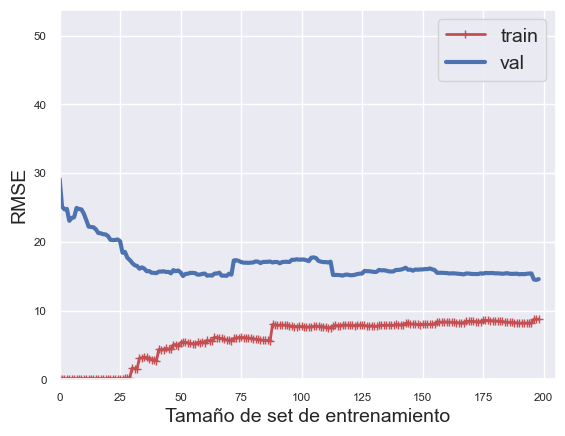

In [702]:
plot_learning_curves(model_gauss_svm, X_train, y_train)
plt.savefig('learning-curves/dsporpob-svr.png', dpi = 200, bbox_inches = 'tight')
plt.show()

### Decision Tree

In [703]:
tree_reg = DecisionTreeRegressor(max_depth=5)

In [704]:
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5)

In [705]:
display_metrics(tree_reg, X_train, y_train)

RMSE:  9.720757633383181
NRMSE: 0.27120842724072564
MAPE: 0.3219069125231452
MAE 6.922122714924088
R2: 0.8086247970974759


In [706]:
tree_reg_scores = cross_val_score(tree_reg, X_train, y_train,
                               scoring = 'neg_mean_squared_error', cv =5)

In [707]:
display_scores(dsporpob_rmse, dsporpob_std, tree_reg_scores)

CV_Scores: [18.28672634 17.51644549 17.08088733 20.79534521 23.77834684]
CV_RMSE: 19.491550242100317
CV_NRMSE: 0.5438128266349743
CV_Standard Dev: 2.499617630839527


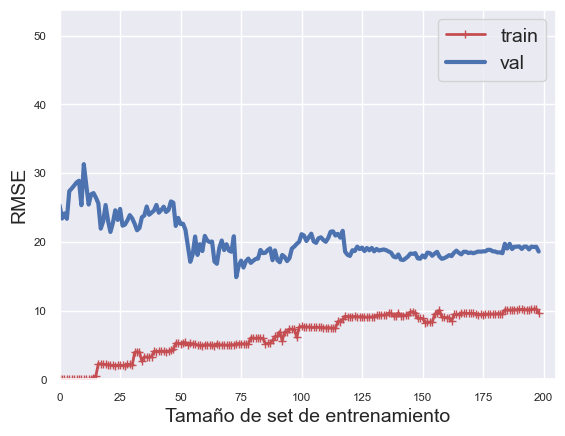

In [708]:
plot_learning_curves(tree_reg, X_train, y_train)
plt.show()

### Random Forest

In [709]:
forest_reg = RandomForestRegressor(n_estimators = 50,  max_leaf_nodes=64, n_jobs=-1, random_state=42)

In [710]:
forest_reg.fit(X_train, y_train)

RandomForestRegressor(max_leaf_nodes=64, n_estimators=50, n_jobs=-1,
                      random_state=42)

In [711]:
display_metrics(tree_reg, X_train, y_train)

RMSE:  11.967888459387071
NRMSE: 0.3339032129878485
MAPE: 0.3679193643293045
MAE 8.060316711005505
R2: 0.7099181877882905


In [712]:
forest_reg_scores = cross_val_score(forest_reg, X_train, y_train,
                               scoring = 'neg_mean_squared_error', cv =5)

In [713]:
display_scores(dsporpob_rmse, dsporpob_std, forest_reg_scores)

CV_Scores: [14.19435108 11.10568381  9.48044823 13.40465529 23.7582585 ]
CV_RMSE: 14.388679385030219
CV_NRMSE: 0.40144310281779366
CV_Standard Dev: 4.973205660957375


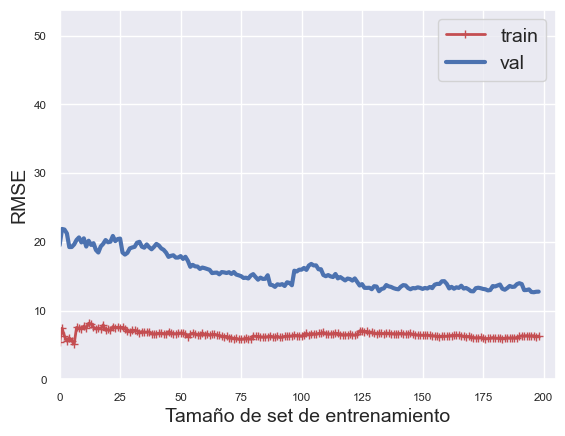

In [714]:
plot_learning_curves(forest_reg, X_train, y_train)
plt.savefig('learning-curves/dsporpob-rf.png', dpi = 200, bbox_inches = 'tight')
plt.show()

#### Extra Trees

In [715]:
extra_trees_reg = ExtraTreesRegressor(n_estimators = 50, n_jobs=-1, random_state=42)

In [716]:
extra_trees_reg.fit(X_train, y_train)

ExtraTreesRegressor(n_estimators=50, n_jobs=-1, random_state=42)

In [717]:
display_metrics(extra_trees_reg, X_train, y_train)

RMSE:  2.886595876813079e-14
NRMSE: 8.053581391037844e-16
MAPE: 5.602929683245685e-16
MAE 2.0549534296421257e-14
R2: 1.0


In [718]:
extra_trees_reg_scores = cross_val_score(extra_trees_reg, X_train, y_train,
                               scoring = 'neg_mean_squared_error', cv =5)

In [719]:
display_scores(dsporpob_rmse, dsporpob_std, extra_trees_reg_scores)

CV_Scores: [13.45894627  9.50405929  9.42506218 12.72269592 22.28076444]
CV_RMSE: 13.478305621875958
CV_NRMSE: 0.37604374138753055
CV_Standard Dev: 4.696339391053392


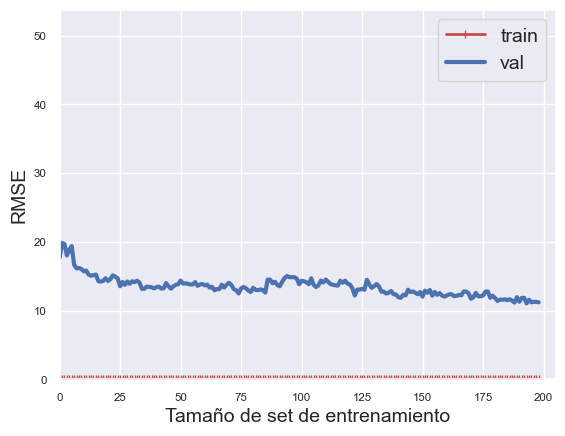

In [720]:
plot_learning_curves(extra_trees_reg, X_train, y_train)
plt.savefig('learning-curves/dsporpob-et.png', dpi = 200, bbox_inches = 'tight')
plt.show()

### Boosting

#### Adaboost

In [721]:
model_adaboost = AdaBoostRegressor(n_estimators=100, learning_rate=0.5, random_state=42)

In [722]:
model_adaboost.fit(X_train, y_train)

AdaBoostRegressor(learning_rate=0.5, n_estimators=100, random_state=42)

In [723]:
display_metrics(model_adaboost, X_train, y_train)

RMSE:  11.801014725726553
NRMSE: 0.32924744801964967
MAPE: 0.5704967402525674
MAE 10.207688566406748
R2: 0.7179512764215785


In [724]:
adaboost_scores = cross_val_score(model_adaboost, X_train, y_train,
                               scoring = 'neg_mean_squared_error', cv =5)

In [725]:
display_scores(dsporpob_rmse, dsporpob_std, adaboost_scores)

CV_Scores: [17.95679411 13.04494816 12.37153819 15.07292875 24.47010514]
CV_RMSE: 16.58326287082855
CV_NRMSE: 0.46267182161516646
CV_Standard Dev: 4.3960954017682825


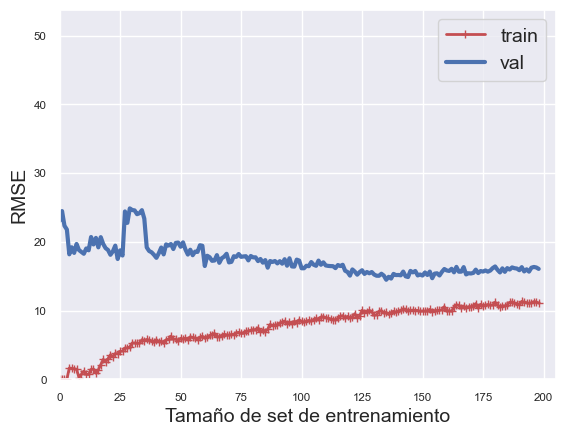

In [726]:
plot_learning_curves(model_adaboost, X_train, y_train)
plt.show()

#### Gradient Boosting

In [727]:
model_gbrt = GradientBoostingRegressor(max_depth=4, n_estimators=50, random_state=42)

In [728]:
model_gbrt.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=4, n_estimators=50, random_state=42)

In [729]:
display_metrics(model_gbrt, X_train, y_train)

RMSE:  4.509547455889516
NRMSE: 0.1258160443049286
MAPE: 0.16273085764573506
MAE 3.4676728782754074
R2: 0.9588138347973693


In [730]:
gbrt_scores = cross_val_score(model_gbrt, X_train, y_train,
                               scoring = 'neg_mean_squared_error', cv =5)

In [731]:
display_scores(dsporpob_rmse, dsporpob_std, gbrt_scores)

CV_Scores: [15.44636698 10.0690407  11.60763023 14.64900746 23.44728749]
CV_RMSE: 15.043866572493238
CV_NRMSE: 0.41972277744417114
CV_Standard Dev: 4.636637059650891


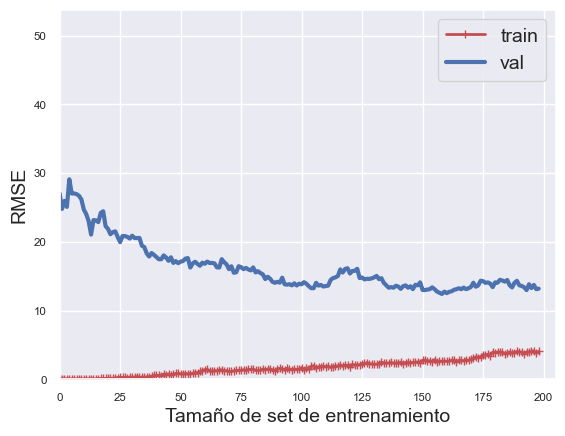

In [732]:
plot_learning_curves(model_gbrt, X_train, y_train)
plt.savefig('learning-curves/dsporpob-gb.png', dpi = 200, bbox_inches = 'tight')
plt.show()

### Selección de los mejores modelos

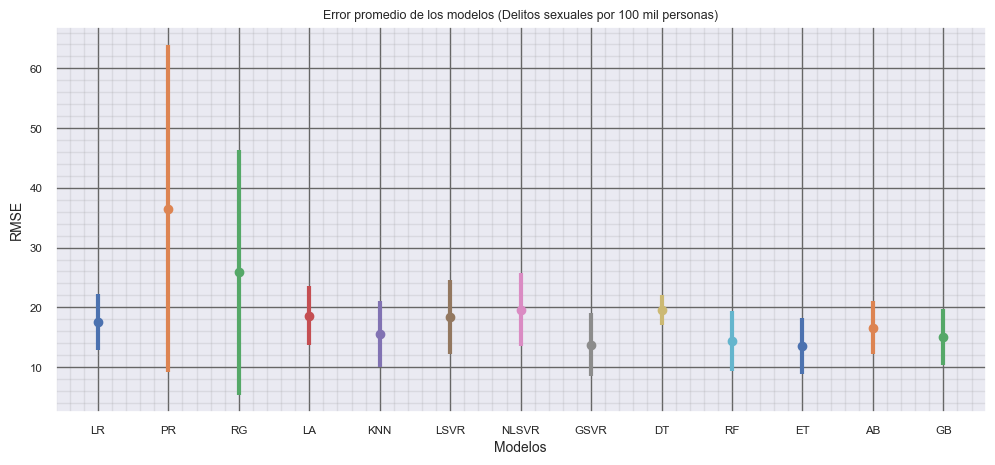

In [733]:
# Grafica para comparar visualmente los resultados
plt.figure(figsize=(12, 5))
for i, (model_mean, model_sd) in enumerate(zip(dsporpob_rmse, dsporpob_std)):
    plt.errorbar(i, model_mean,
                 xerr=0,
                 yerr=model_sd,
                 fmt='o',
                 linewidth=3)
plt.xticks(list(range(0, len(models))), models)
plt.title("Error promedio de los modelos (Delitos sexuales por 100 mil personas)")
plt.grid('visible',
         which='major',
         color='#666',
         linestyle='-')
plt.minorticks_on ()
plt.grid('visible',
         which='minor',
         color='#999',
         linestyle='-',
         alpha=0.2)
plt.xlabel("Modelos", fontsize=10)
plt.ylabel("RMSE", fontsize=10)
plt.savefig('box-plots/bp_dsporpob.png', dpi = 200, bbox_inches = 'tight')
plt.show()

### Tuning de los mejores modelos

#### Random Forest

In [734]:
param_grid = {
    'n_estimators': [10, 50, 100, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

In [735]:
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv = 5, scoring = 'neg_mean_squared_error',
                           n_jobs = -1, verbose = 2
                   )

In [736]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 50, 100, 500]},
             scoring='neg_mean_squared_error', verbose=2)

In [737]:
random_forest_tuned = grid_search.best_estimator_

In [738]:
grid_search.best_params_

{'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 50}

In [739]:
display_metrics(random_forest_tuned, X_test, y_test)

RMSE:  17.34952184578578
NRMSE: 0.3051506811547319
MAPE: 0.46960349988037914
MAE 14.008609211985473
R2: 0.6663074857335107


#### Kernelized SVR

In [740]:
gamma = [0.01, 0.1, 0.5, 1]
C = [10, 50, 100, 200, 500, 600]

params = {'svm_gauss_reg__gamma':gamma,
          'svm_gauss_reg__C':C,
         }

In [741]:
grid_search = GridSearchCV(model_gauss_svm, param_grid = params, cv = 5, scoring = 'neg_mean_squared_error',
                    n_jobs = -1, verbose = 2
                   )

In [742]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svm_gauss_reg',
                                        SVR(C=100, gamma=0.1))]),
             n_jobs=-1,
             param_grid={'svm_gauss_reg__C': [10, 50, 100, 200, 500, 600],
                         'svm_gauss_reg__gamma': [0.01, 0.1, 0.5, 1]},
             scoring='neg_mean_squared_error', verbose=2)

In [743]:
gauss_svr_tuned = grid_search.best_estimator_

In [744]:
grid_search.best_params_

{'svm_gauss_reg__C': 100, 'svm_gauss_reg__gamma': 0.1}

In [745]:
display_metrics(gauss_svr_tuned, X_test, y_test)

RMSE:  22.074961004136217
NRMSE: 0.38826369088163304
MAPE: 0.43034134550724396
MAE 16.04998744973738
R2: 0.45977915966491445


#### Extra trees

In [746]:
param_grid = {
    'n_estimators': [10, 50, 100, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

In [747]:
grid_search = GridSearchCV(ExtraTreesRegressor(random_state=42), param_grid, cv=5, scoring = 'neg_mean_squared_error',
                    n_jobs = -1, verbose = 2)

In [748]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5, estimator=ExtraTreesRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 50, 100, 500]},
             scoring='neg_mean_squared_error', verbose=2)

In [749]:
extra_trees_tuned = grid_search.best_estimator_

In [750]:
grid_search.best_params_

{'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 10}

In [751]:
display_metrics(extra_trees_tuned, X_test, y_test)

RMSE:  15.391590725516478
NRMSE: 0.27071376581407364
MAPE: 0.5004843650402145
MAE 11.783379149996144
R2: 0.7373735536113439


In [752]:
for name, score in zip(X.keys().to_list(), extra_trees_tuned.feature_importances_):
    print(name,':', score)

Poblacion : 0.0810389556864332
PIB : 0.07009678857591325
EficienciaPrimaria : 0.0716854703724371
EficienciaSecundaria : 0.0796575893247437
EficienciaBachillerato : 0.05297273007944324
Desocupacion : 0.06561473183118345
MedianaSalarios : 0.27027100387454545
Pobreza : 0.1381531486780555
MedicosPorPob : 0.07121217755638347
Internamiento : 0.03846819933257231
PIBPerCapita : 0.0608292046882893


#### Gradient Boosting

In [753]:
param_grid = {
    'n_estimators': [10, 50, 100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

In [754]:
grid_search = GridSearchCV(GradientBoostingRegressor(random_state=42), param_grid, cv=5, scoring = 'neg_mean_squared_error',
                    n_jobs = -1, verbose = 2)

In [755]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 45 candidates, totalling 225 fits


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [10, 50, 100, 200, 300]},
             scoring='neg_mean_squared_error', verbose=2)

In [756]:
gbrt_tuned = grid_search.best_estimator_

In [757]:
grid_search.best_params_

{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300}

In [758]:
display_metrics(gbrt_tuned, X_test, y_test)

RMSE:  16.41451328041403
NRMSE: 0.28870535758069904
MAPE: 0.46601263193569964
MAE 12.692092330479358
R2: 0.7013053366476776


### Modelo con mejor desempeño

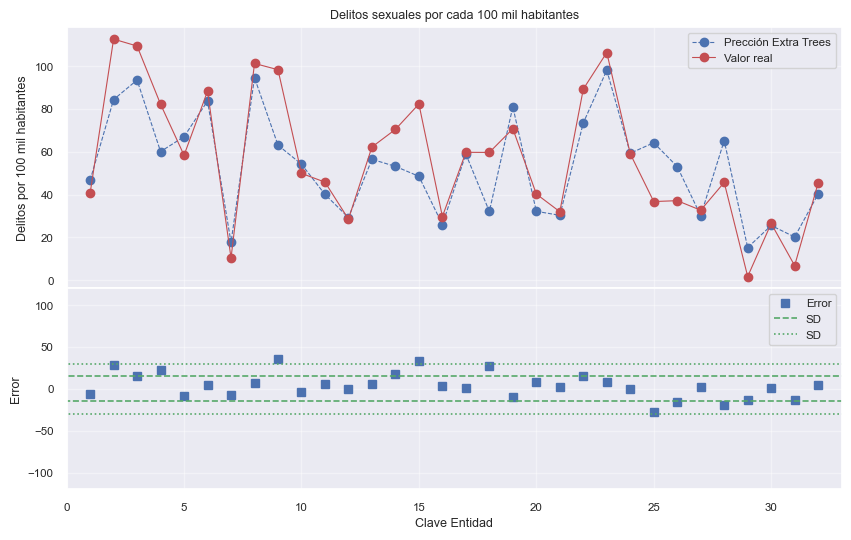

In [759]:
y_real  = y_test #Valores reales de target
muestra_datos = X_test #Datos para predicción

especie = range(1, len(y_real)+1) #Cantidad de eleemntos
y_prediccion = list(extra_trees_tuned.predict(muestra_datos)) #Valores de prediccion  de target


list_delta=[]

for i in range(len(y_real)):
    delta= y_real[i] -y_prediccion[i]
    list_delta.append(delta)

list_delta = np.array(list_delta)
std_list = np.std(list_delta)


fig, axs = plt.subplots(2, 1, sharex=True,gridspec_kw={'height_ratios': [1.3, 1], 'hspace': 0}, figsize=(10, 6))
fig.subplots_adjust(hspace=0)

axs[0].plot(especie, y_prediccion, 'ob--', linewidth=0.8 ,label='Prección Extra Trees')
axs[0].plot(especie, y_real, 'or-' , linewidth=0.8 ,  label='Valor real')
axs[0].grid (linestyle='-', alpha=0.4)
axs[0].set_ylabel('Delitos por 100 mil habitantes')
axs[0].set_title('Delitos sexuales por cada 100 mil habitantes')
axs[0].legend()


axs[1].plot(especie, list_delta  , 's', linewidth=0.8 ,label='Error')
axs[1].plot([-5,40,40,-5], [std_list,std_list,-std_list,-std_list]  , 'g--', linewidth=1.18 ,label='SD')
axs[1].plot([-5,40,40,-5], [2*std_list,2*std_list,-2*std_list,-2*std_list]  , 'g:', linewidth=1.18 ,label='SD')

axs[1].set_ylim(-120, 120)
axs[1].set_xlim(0, 33)

axs[1].grid (linestyle='-', alpha=0.4)

axs[1].set_xlabel('Clave Entidad')
axs[1].set_ylabel('Error')
axs[1].legend(loc='upper right')

plt.savefig('results/delsporpob.png', dpi = 200, bbox_inches = 'tight')
plt.show()

In [760]:
#Error para Yucatan
print('Valor real:', y_real[30])
print('Valor predicho: ', y_prediccion[30])


Valor real: 6.829886414463099
Valor predicho:  20.165309277759487


## Violencia Familiar

In [761]:
X = df_viol_fam[features]
y = df_viol_fam['DelitosTotales']

In [762]:
X_train, X_test, y_train, y_test = train_test_split(X.values,y.values,train_size = 0.89, shuffle = False)

In [763]:
vf_rmse = []
vf_std = []

### Regresion

#### Linear Regression

In [764]:
lr = LinearRegression()

In [765]:
model_lr = Pipeline([
    ('scaler', scaler),   
    ('lr', lr)  
])

In [766]:
model_lr.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('lr', LinearRegression())])

In [767]:
display_metrics(model_lr, X_train, y_train)

RMSE:  2895.490494313285
NRMSE: 0.46737973627594703
MAPE: 4.19883945692883
MAE 2131.1916951853837
R2: 0.7543689692300591


In [768]:
lr_scores = cross_val_score(model_lr, X_train, y_train,
                               scoring = 'neg_mean_squared_error', cv =5)

In [769]:
display_scores(vf_rmse, vf_std, lr_scores)

CV_Scores: [3680.44310791 2371.17684214 3092.09596041 2771.05035817 4618.46623254]
CV_RMSE: 3306.6465002340615
CV_NRMSE: 0.5337470705818051
CV_Standard Dev: 783.4020113225948


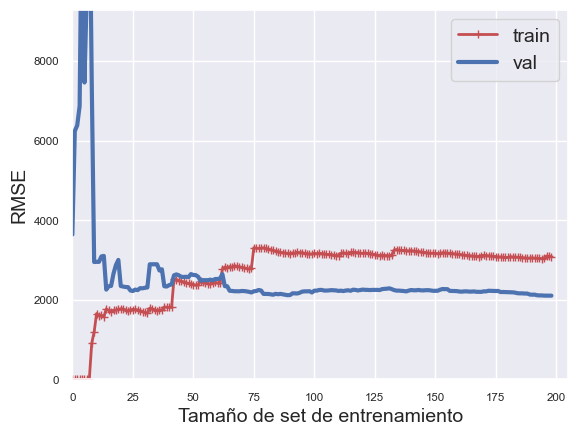

In [770]:
plot_learning_curves(model_lr, X_train, y_train)
plt.show()

#### Polynomial Regression

In [771]:
regression = LinearRegression()

In [772]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)

In [773]:
model_poly_regression = Pipeline([
     ("poly_features", poly_features),
    ('scaler', scaler),   
    ('regression', regression)  
])

In [774]:
model_poly_regression.fit(X_train, y_train)

Pipeline(steps=[('poly_features', PolynomialFeatures(include_bias=False)),
                ('scaler', StandardScaler()),
                ('regression', LinearRegression())])

In [775]:
display_metrics(model_poly_regression, X_train, y_train)

RMSE:  1469.8467783661624
NRMSE: 0.2372574183849136
MAPE: 1.927253243001517
MAE 1156.5426308560227
R2: 0.9367030077982604


In [776]:
poly_scores = cross_val_score(model_poly_regression, X_train, y_train,
                               scoring = 'neg_mean_squared_error', cv =5)

In [777]:
display_scores(vf_rmse, vf_std, poly_scores)

CV_Scores: [15033.02468556  2408.18078882  4127.54487454  5645.88146176
  4022.38064067]
CV_RMSE: 6247.40249027013
CV_NRMSE: 1.0084334015417498
CV_Standard Dev: 4510.7233726108725


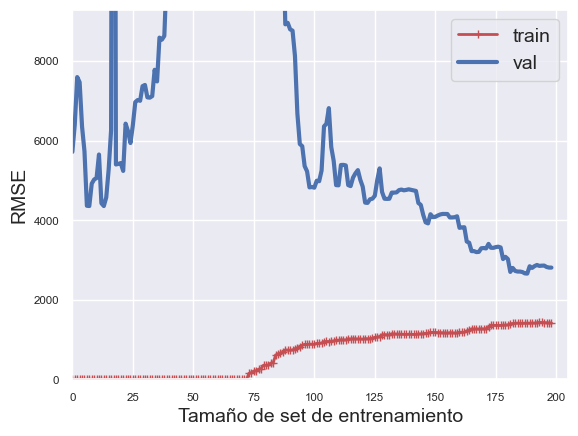

In [778]:
plot_learning_curves(model_poly_regression, X_train, y_train)
plt.show()    

#### Ridge

In [779]:
ridge_reg = Ridge(alpha=1, solver="cholesky")

In [780]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)

In [781]:
model_ridge_reg = Pipeline([
    ("poly_features", poly_features),
    ('scaler', scaler),   
    ('ridge_reg', ridge_reg)  
])

In [782]:
model_ridge_reg.fit(X_train, y_train)

Pipeline(steps=[('poly_features', PolynomialFeatures(include_bias=False)),
                ('scaler', StandardScaler()),
                ('ridge_reg', Ridge(alpha=1, solver='cholesky'))])

In [783]:
display_metrics(model_ridge_reg, X_train, y_train)

RMSE:  2147.3946932623553
NRMSE: 0.3466247833962792
MAPE: 2.2522072486048685
MAE 1545.3465268828686
R2: 0.8648977148804633


In [784]:
ridge_scores = cross_val_score(model_ridge_reg, X_train, y_train,
                               scoring = 'neg_mean_squared_error', cv =5)

In [785]:
display_scores(vf_rmse, vf_std, ridge_scores)

CV_Scores: [11637.02521371  1918.43003413  2575.68060848  2382.47529814
  4330.95074768]
CV_RMSE: 4568.912380429234
CV_NRMSE: 0.7374975216209009
CV_Standard Dev: 3627.4889784032516


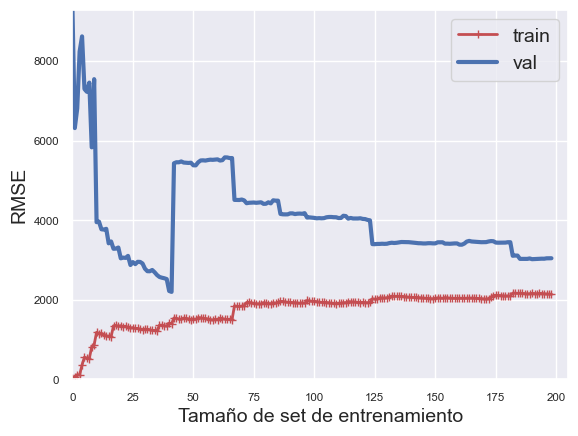

In [786]:
plot_learning_curves(model_ridge_reg, X_train, y_train)
plt.show()  

#### Lasso

In [787]:
lasso_reg = Lasso(alpha=1, max_iter=100_000, tol = 0.01)

In [788]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)

In [789]:
model_lasso_reg = Pipeline([
    ("poly_features", poly_features),
    ('scaler', scaler),   
    ('lasso_reg', lasso_reg)  
])

In [790]:
model_lasso_reg.fit(X_train,y_train)

Pipeline(steps=[('poly_features', PolynomialFeatures(include_bias=False)),
                ('scaler', StandardScaler()),
                ('lasso_reg', Lasso(alpha=1, max_iter=100000, tol=0.01))])

In [791]:
display_metrics(model_lasso_reg, X_train, y_train)

RMSE:  1699.0329157550384
NRMSE: 0.2742518262965584
MAPE: 1.6855778601818407
MAE 1237.7823341631442
R2: 0.9154248982477189


In [792]:
lasso_scores = cross_val_score(model_lasso_reg, X_train, y_train,
                               scoring = 'neg_mean_squared_error', cv =5)

In [793]:
display_scores(vf_rmse, vf_std, lasso_scores)

CV_Scores: [14526.97946328  1816.8351598   3195.62047383  5442.04322624
  4154.80005943]
CV_RMSE: 5827.25567651471
CV_NRMSE: 0.9406148031399063
CV_Standard Dev: 4508.650950115289


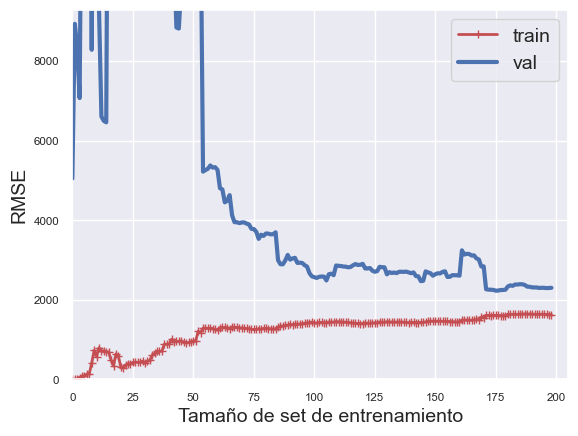

In [794]:
plot_learning_curves(model_lasso_reg, X_train, y_train)
plt.show()  

### K nearest neighbors

In [795]:
neig_reg = KNeighborsRegressor(n_neighbors=4)

In [796]:
model_neig_reg = Pipeline([
    ('scaler', scaler),   
    ('neig_reg', neig_reg)  
])

In [797]:
model_neig_reg.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('neig_reg', KNeighborsRegressor(n_neighbors=4))])

In [798]:
display_metrics(model_neig_reg, X_train, y_train)

RMSE:  2090.674703725301
NRMSE: 0.3374692452228789
MAPE: 0.9923653758029256
MAE 1238.51953125
R2: 0.8719404791074113


In [799]:
neig_reg_scores = cross_val_score(model_neig_reg, X_train, y_train,
                               scoring = 'neg_mean_squared_error', cv =5)

In [800]:
display_scores(vf_rmse, vf_std, neig_reg_scores)

CV_Scores: [3734.74066362 1912.88746812 1882.01398467 1749.7284166  4759.41387091]
CV_RMSE: 2807.7568807839257
CV_NRMSE: 0.45321808966221405
CV_Standard Dev: 1220.2851590680827


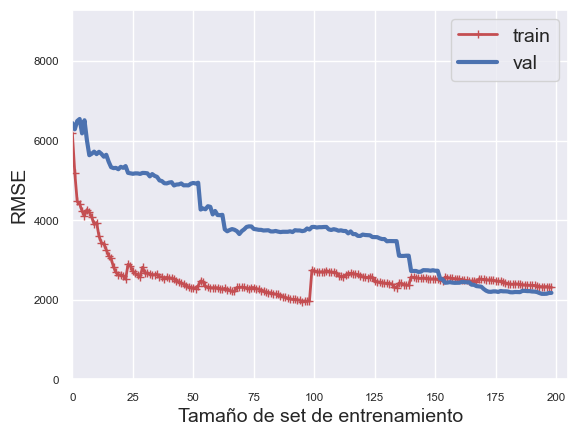

In [801]:
plot_learning_curves(model_neig_reg, X_train, y_train)
plt.savefig('learning-curves/vf-knn.png', dpi = 200, bbox_inches = 'tight')
plt.show()  

### Support Vector Machines

#### LinearSVR

In [802]:
svm_reg = LinearSVR(epsilon=1.5, dual=True)

In [803]:
model_lin_svm = Pipeline([
    ('scaler', scaler),   
    ('svm_reg', svm_reg)  
])

In [804]:
model_lin_svm.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_reg', LinearSVR(dual=True, epsilon=1.5))])

In [805]:
display_metrics(model_lin_svm, X_train, y_train)

RMSE:  8328.145553796197
NRMSE: 1.3442995168679075
MAPE: 1.102949098948692
MAE 5973.3428547548665
R2: -1.03205546309304


In [806]:
svm_lin_scores = cross_val_score(model_lin_svm, X_train, y_train,
                               scoring = 'neg_mean_squared_error', cv =5)

In [807]:
display_scores(vf_rmse, vf_std, svm_lin_scores)

CV_Scores: [ 6651.85593682  6041.74472566  8046.7425358   9488.15952207
 10705.68534884]
CV_RMSE: 8186.837613838448
CV_NRMSE: 1.321490093787134
CV_Standard Dev: 1732.9311295929945


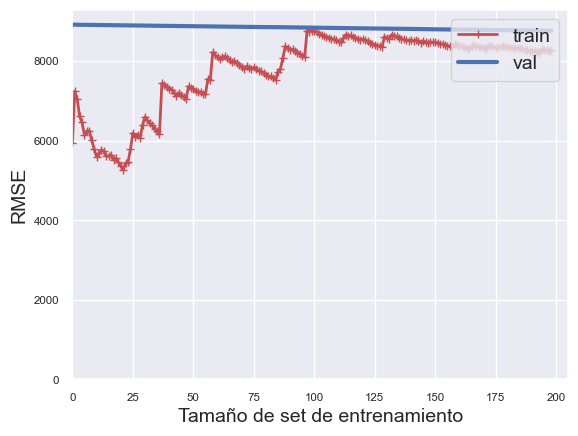

In [808]:
plot_learning_curves(model_lin_svm, X_train, y_train)
plt.show()  

#### Non linear SVR

In [809]:
svm_poly_reg = SVR(kernel="poly", degree=2, C=100, epsilon=0.1)

In [810]:
model_poly_svm = Pipeline([
    ('scaler', scaler),   
    ('svm_poly_reg', svm_poly_reg)  
])

In [811]:
model_poly_svm.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_poly_reg', SVR(C=100, degree=2, kernel='poly'))])

In [812]:
display_metrics(model_poly_svm, X_train, y_train)

RMSE:  4739.441847072429
NRMSE: 0.7650237791940161
MAPE: 9.772941277561467
MAE 3353.4493627921515
R2: 0.341897801894112


In [813]:
poly_svm_scores = cross_val_score(model_poly_svm, X_train, y_train,
                               scoring = 'neg_mean_squared_error', cv =5)

In [814]:
display_scores(vf_rmse, vf_std, poly_svm_scores)

CV_Scores: [3968.84595424 3433.13917384 4186.81324994 5554.82272084 7000.97973466]
CV_RMSE: 4828.920166704637
CV_NRMSE: 0.779467050036815
CV_Standard Dev: 1291.8986654075256


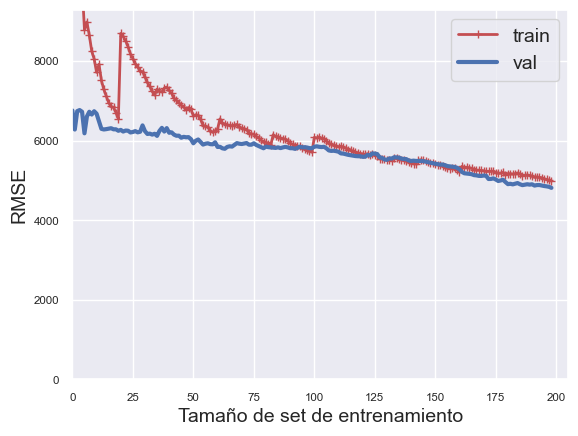

In [815]:
plot_learning_curves(model_poly_svm, X_train, y_train)
plt.show()

#### Gaussian Kernel

In [816]:
svm_gauss_reg = SVR(kernel="rbf", gamma=0.1, C=100)

In [817]:
model_gauss_svm = Pipeline([
    ('scaler', scaler),   
    ('svm_gauss_reg', svm_gauss_reg)  
])

In [818]:
model_gauss_svm.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_gauss_reg', SVR(C=100, gamma=0.1))])

In [819]:
display_metrics(model_gauss_svm, X_train, y_train)

RMSE:  5486.361232268737
NRMSE: 0.8855888392272168
MAPE: 10.120348192754793
MAE 3534.0261477282684
R2: 0.11812355721016743


In [820]:
gauss_svm_scores = cross_val_score(model_gauss_svm, X_train, y_train,
                               scoring = 'neg_mean_squared_error', cv =5)

In [821]:
display_scores(vf_rmse, vf_std, gauss_svm_scores)

CV_Scores: [4754.54162347 3644.81318314 4927.34662748 6609.33838638 7735.60768849]
CV_RMSE: 5534.329501791557
CV_NRMSE: 0.8933317060068593
CV_Standard Dev: 1452.4488989652966


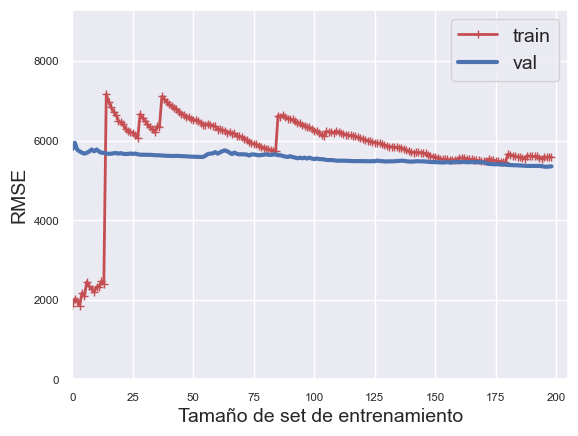

In [822]:
plot_learning_curves(model_gauss_svm, X_train, y_train)
plt.show()

### Decision Tree

In [823]:
tree_reg = DecisionTreeRegressor(max_depth=5)

In [824]:
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5)

In [825]:
display_metrics(tree_reg, X_train, y_train)

RMSE:  1348.7700197265917
NRMSE: 0.2177136403503288
MAPE: 0.9413987717465484
MAE 930.2074088671744
R2: 0.9467015288521876


In [826]:
tree_reg_scores = cross_val_score(tree_reg, X_train, y_train,
                               scoring = 'neg_mean_squared_error', cv =5)

In [827]:
display_scores(vf_rmse, vf_std, tree_reg_scores)

CV_Scores: [3385.26493856 2145.07731034 2832.64022322 2991.06711048 3771.3586908 ]
CV_RMSE: 3025.08165468073
CV_NRMSE: 0.48829787863392954
CV_Standard Dev: 547.5873907327536


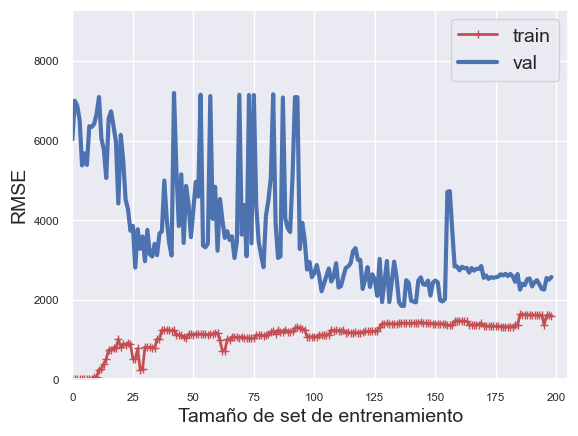

In [828]:
plot_learning_curves(tree_reg, X_train, y_train)
plt.show()

### Random Forest

In [829]:
forest_reg = RandomForestRegressor(n_estimators = 50,  max_leaf_nodes=64, n_jobs=-1, random_state=42)

In [830]:
forest_reg.fit(X_train, y_train)

RandomForestRegressor(max_leaf_nodes=64, n_estimators=50, n_jobs=-1,
                      random_state=42)

In [831]:
display_metrics(tree_reg, X_train, y_train)

RMSE:  1831.0327120690597
NRMSE: 0.295558762068198
MAPE: 1.1522356483636587
MAE 1184.9592031371212
R2: 0.901772938968028


In [832]:
forest_reg_scores = cross_val_score(forest_reg, X_train, y_train,
                               scoring = 'neg_mean_squared_error', cv =5)

In [833]:
display_scores(vf_rmse, vf_std, forest_reg_scores)

CV_Scores: [3268.30373534 1536.11165509 2486.7511338  1744.06242533 3906.9606364 ]
CV_RMSE: 2588.437917191134
CV_NRMSE: 0.4178164057106928
CV_Standard Dev: 897.9332299040178


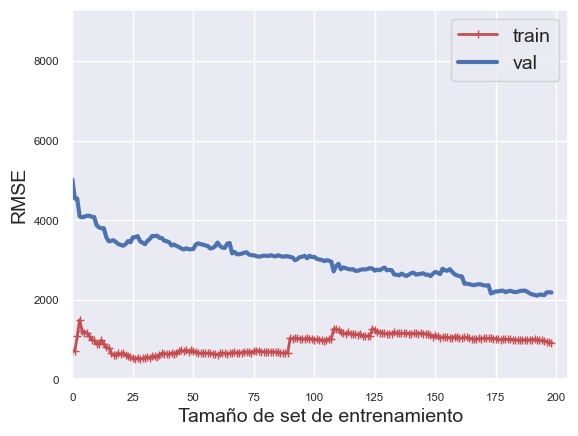

In [834]:
plot_learning_curves(forest_reg, X_train, y_train)
plt.savefig('learning-curves/vf-rf.png', dpi = 200, bbox_inches = 'tight')
plt.show()

#### Extra Trees

In [835]:
extra_trees_reg = ExtraTreesRegressor(n_estimators = 50, n_jobs=-1, random_state=42)

In [836]:
extra_trees_reg.fit(X_train, y_train)

ExtraTreesRegressor(n_estimators=50, n_jobs=-1, random_state=42)

In [837]:
display_metrics(extra_trees_reg, X_train, y_train)

RMSE:  0.0
NRMSE: 0.0
MAPE: 0.0
MAE 0.0
R2: 1.0


In [838]:
extra_trees_reg_scores = cross_val_score(extra_trees_reg, X_train, y_train,
                               scoring = 'neg_mean_squared_error', cv =5)

In [839]:
display_scores(vf_rmse, vf_std, extra_trees_reg_scores)

CV_Scores: [3093.68031777 1095.81737007 2768.1604471  1674.31381096 3732.6934603 ]
CV_RMSE: 2472.9330812385397
CV_NRMSE: 0.39917202753982833
CV_Standard Dev: 958.5116548766179


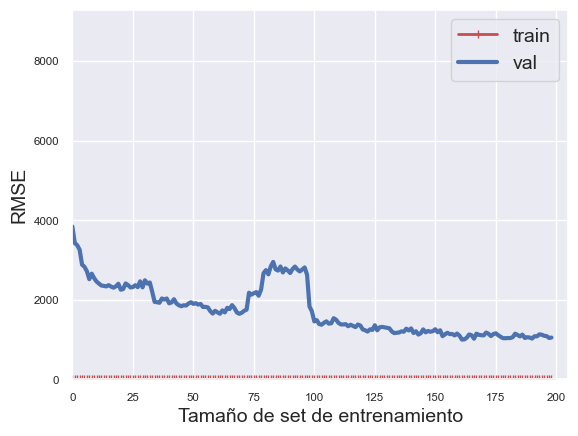

In [840]:
plot_learning_curves(extra_trees_reg, X_train, y_train)
plt.savefig('learning-curves/vf-et.png', dpi = 200, bbox_inches = 'tight')
plt.show()

### Boosting

#### Adaboost

In [841]:
model_adaboost = AdaBoostRegressor(n_estimators=100, learning_rate=0.5, random_state=42)

In [842]:
model_adaboost.fit(X_train, y_train)

AdaBoostRegressor(learning_rate=0.5, n_estimators=100, random_state=42)

In [843]:
display_metrics(model_adaboost, X_train, y_train)

RMSE:  1875.8972632330442
NRMSE: 0.3028006377132206
MAPE: 5.148281098035547
MAE 1642.7458849398208
R2: 0.896900385054206


In [844]:
adaboost_scores = cross_val_score(model_adaboost, X_train, y_train,
                               scoring = 'neg_mean_squared_error', cv =5)

In [845]:
display_scores(vf_rmse, vf_std, adaboost_scores)

CV_Scores: [3993.68535163 2029.89067704 2699.83148126 2741.72616224 3857.10513826]
CV_RMSE: 3064.4477620847856
CV_NRMSE: 0.49465221512125473
CV_Standard Dev: 748.2233408945699


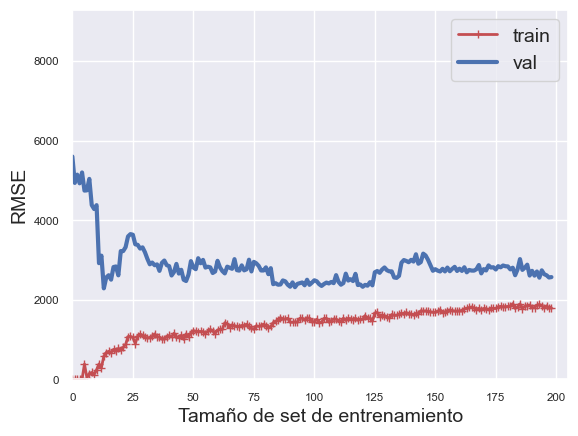

In [846]:
plot_learning_curves(model_adaboost, X_train, y_train)
plt.show()

#### Gradient Boosting

In [847]:
model_gbrt = GradientBoostingRegressor(max_depth=4, n_estimators=50, random_state=42)

In [848]:
model_gbrt.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=4, n_estimators=50, random_state=42)

In [849]:
display_metrics(model_gbrt, X_train, y_train)

RMSE:  543.6131594481595
NRMSE: 0.08774809504573182
MAPE: 0.7316627910651088
MAE 423.9616068706879
R2: 0.991341974385609


In [850]:
gbrt_scores = cross_val_score(model_gbrt, X_train, y_train,
                               scoring = 'neg_mean_squared_error', cv =5)

In [851]:
display_scores(vf_rmse, vf_std, gbrt_scores)

CV_Scores: [2934.16440824 1552.7771663  2711.75198654 1909.46360992 3691.3406233 ]
CV_RMSE: 2559.899558859858
CV_NRMSE: 0.4132098458146004
CV_Standard Dev: 759.0328921527966


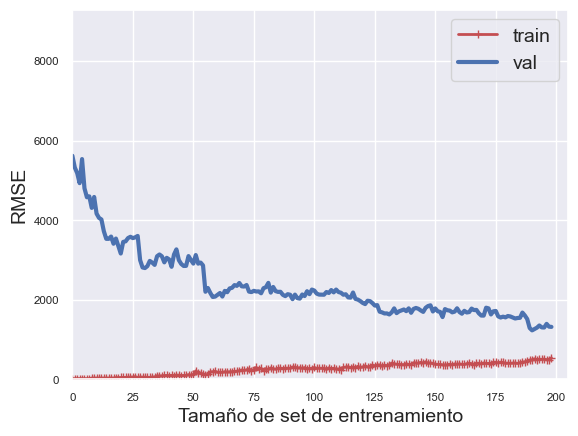

In [852]:
plot_learning_curves(model_gbrt, X_train, y_train)
plt.savefig('learning-curves/vf-gb.png', dpi = 200, bbox_inches = 'tight')
plt.show()

### Selección de los mejores modelos

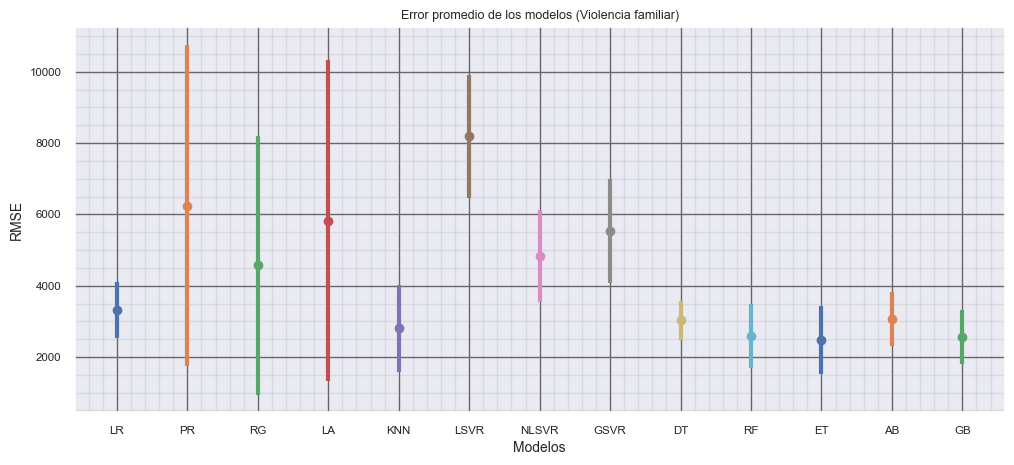

In [853]:
# Grafica para comparar visualmente los resultados
plt.figure(figsize=(12, 5))
for i, (model_mean, model_sd) in enumerate(zip(vf_rmse, vf_std)):
    plt.errorbar(i, model_mean,
                 xerr=0,
                 yerr=model_sd,
                 fmt='o',
                 linewidth=3)
plt.xticks(list(range(0, len(models))), models)
plt.title("Error promedio de los modelos (Violencia familiar)")
plt.grid('visible',
         which='major',
         color='#666',
         linestyle='-')
plt.minorticks_on ()
plt.grid('visible',
         which='minor',
         color='#999',
         linestyle='-',
         alpha=0.2)
plt.xlabel("Modelos", fontsize=10)
plt.ylabel("RMSE", fontsize=10)
plt.savefig('box-plots/bp_vf.png', dpi = 200, bbox_inches = 'tight')
plt.show()

### Tuning de los mejores modelos

#### K Nearest Neighbors

In [854]:
n_neighbors=[1, 2, 3, 4, 5, 6, 8, 10]  

params = {'neig_reg__n_neighbors': n_neighbors}

In [855]:
grid_search = GridSearchCV(model_neig_reg, param_grid = params, cv = 5, scoring = 'neg_mean_squared_error',
                           n_jobs = -1, verbose = 2
                   )

In [856]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('neig_reg',
                                        KNeighborsRegressor(n_neighbors=4))]),
             n_jobs=-1,
             param_grid={'neig_reg__n_neighbors': [1, 2, 3, 4, 5, 6, 8, 10]},
             scoring='neg_mean_squared_error', verbose=2)

In [857]:
knn_tuned = grid_search.best_estimator_

In [858]:
grid_search.best_params_

{'neig_reg__n_neighbors': 5}

In [859]:
display_metrics(knn_tuned, X_test, y_test)

RMSE:  4526.1559466891995
NRMSE: 0.5097506811741487
MAPE: 0.7153199944994473
MAE 2694.04375
R2: 0.6845229709088069


#### Random Forest

In [860]:
param_grid = {
    'n_estimators': [10, 50, 100, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

In [861]:
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv = 5, scoring = 'neg_mean_squared_error',
                    n_jobs = -1, verbose = 2
                   )

In [862]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 50, 100, 500]},
             scoring='neg_mean_squared_error', verbose=2)

In [863]:
random_forest_tuned = grid_search.best_estimator_

In [864]:
grid_search.best_params_

{'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 10}

In [865]:
display_metrics(random_forest_tuned, X_test, y_test)

RMSE:  3753.9638080153263
NRMSE: 0.42278384368056665
MAPE: 0.8907948019887708
MAE 2296.8148826060406
R2: 0.7829854371774545


#### Extra trees

In [866]:
param_grid = {
    'n_estimators': [10, 50, 100, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

In [867]:
grid_search = GridSearchCV(ExtraTreesRegressor(random_state=42), param_grid, cv=5, scoring = 'neg_mean_squared_error',
                    n_jobs = -1, verbose = 2)

In [868]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5, estimator=ExtraTreesRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 50, 100, 500]},
             scoring='neg_mean_squared_error', verbose=2)

In [869]:
extra_trees_tuned = grid_search.best_estimator_

In [870]:
grid_search.best_params_

{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 500}

In [871]:
display_metrics(extra_trees_tuned, X_test, y_test)

RMSE:  2559.4377611439395
NRMSE: 0.2882523619453075
MAPE: 0.9512982585800402
MAE 1545.9728750000002
R2: 0.8991216751351266


In [872]:
for name, score in zip(X.keys().to_list(), extra_trees_tuned.feature_importances_):
    print(name,':', score)

Poblacion : 0.12423107084765302
PIB : 0.5364863664148458
EficienciaPrimaria : 0.03562729876999147
EficienciaSecundaria : 0.030044707220009122
EficienciaBachillerato : 0.022801803459001277
Desocupacion : 0.016566602974983625
MedianaSalarios : 0.03584819612640941
Pobreza : 0.022710364158312867
MedicosPorPob : 0.10817598490353009
Internamiento : 0.01485613742402576
PIBPerCapita : 0.052651467701237575


#### Gradient Boosting

In [873]:
param_grid = {
    'n_estimators': [10, 50, 100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

In [874]:
grid_search = GridSearchCV(GradientBoostingRegressor(random_state=42), param_grid, cv=5, scoring = 'neg_mean_squared_error',
                    n_jobs = -1, verbose = 2)

In [875]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 45 candidates, totalling 225 fits


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [10, 50, 100, 200, 300]},
             scoring='neg_mean_squared_error', verbose=2)

In [876]:
gbrt_tuned = grid_search.best_estimator_

In [877]:
grid_search.best_params_

{'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 300}

In [878]:
display_metrics(gbrt_tuned, X_test, y_test)

RMSE:  2852.5482285825015
NRMSE: 0.3212634340771401
MAPE: 1.6604835076741304
MAE 2144.7939194172495
R2: 0.8746931803699123


### Modelo con mejor desempeño

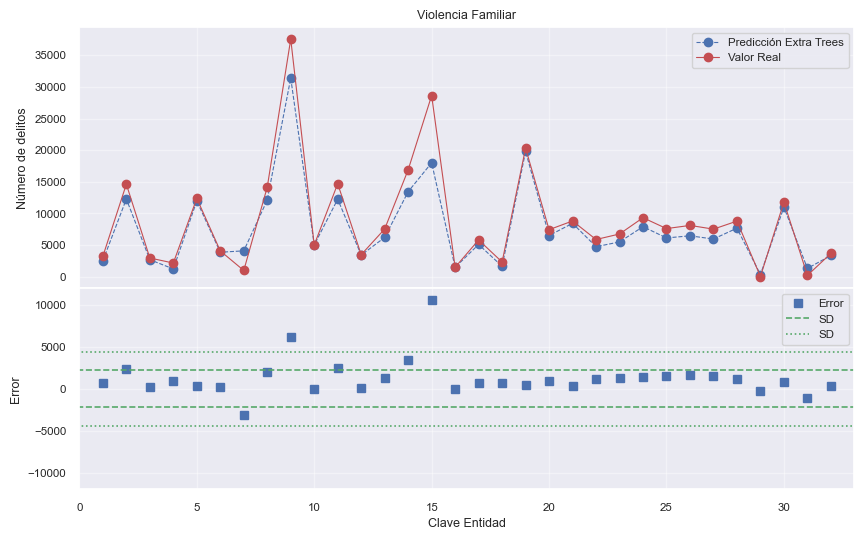

In [879]:
y_real  = y_test #Valores reales de target
muestra_datos = X_test #Datos para predicción

especie = range(1, len(y_real)+1) #Cantidad de eleemntos
y_prediccion = list(extra_trees_tuned.predict(muestra_datos)) #Valores de prediccion  de target


list_delta=[]

for i in range(len(y_real)):
    delta= y_real[i] -y_prediccion[i]
    list_delta.append(delta)

list_delta = np.array(list_delta)
std_list = np.std(list_delta)


fig, axs = plt.subplots(2, 1, sharex=True,gridspec_kw={'height_ratios': [1.3, 1], 'hspace': 0}, figsize=(10, 6))
fig.subplots_adjust(hspace=0)

axs[0].plot(especie, y_prediccion, 'ob--', linewidth=0.8 ,label='Predicción Extra Trees')
axs[0].plot(especie, y_real, 'or-' , linewidth=0.8 ,  label='Valor Real')
axs[0].grid (linestyle='-', alpha=0.4)
axs[0].set_ylabel('Número de delitos')
axs[0].set_title('Violencia Familiar')
axs[0].legend()


axs[1].plot(especie, list_delta  , 's', linewidth=0.8 ,label='Error')
axs[1].plot([-5,40,40,-5], [std_list,std_list,-std_list,-std_list]  , 'g--', linewidth=1.18 ,label='SD')
axs[1].plot([-5,40,40,-5], [2*std_list,2*std_list,-2*std_list,-2*std_list]  , 'g:', linewidth=1.18 ,label='SD')

axs[1].set_ylim(-12_000, 12_000)
axs[1].set_xlim(0, 33)

axs[1].grid (linestyle='-', alpha=0.4)

axs[1].set_xlabel('Clave Entidad')
axs[1].set_ylabel('Error')
axs[1].legend(loc='upper right')

plt.savefig('results/violfam.png', dpi = 200, bbox_inches = 'tight')
plt.show()

In [880]:
#Error para Yucatan
print('Valor real:', y_real[30])
print('Valor predicho: ', y_prediccion[30])


Valor real: 193.0
Valor predicho:  1296.566


In [881]:
print(y_real)
print(y_prediccion)

[3.2140e+03 1.4626e+04 2.9460e+03 2.1510e+03 1.2379e+04 4.0690e+03
 9.7200e+02 1.4165e+04 3.7578e+04 5.0180e+03 1.4695e+04 3.4720e+03
 7.5350e+03 1.6903e+04 2.8650e+04 1.4790e+03 5.8010e+03 2.3100e+03
 2.0320e+04 7.4280e+03 8.8040e+03 5.8720e+03 6.7450e+03 9.3200e+03
 7.6010e+03 8.1010e+03 7.5140e+03 8.7840e+03 1.8000e+01 1.1796e+04
 1.9300e+02 3.6740e+03]
[2516.654, 12283.762, 2679.264, 1218.778, 11986.036, 3857.642, 4079.06, 12124.194, 31412.142, 5011.874, 12248.444, 3412.258, 6203.624, 13442.176, 18011.672, 1466.936, 5093.112, 1629.654, 19811.992, 6499.496, 8433.28, 4736.258, 5488.752, 7903.306, 6118.792, 6456.68, 5950.64, 7666.292, 328.628, 10990.452, 1296.566, 3345.96]


## Violencia familiar por cada 100 mil habitantes

In [882]:
X = df_viol_fam[features]
y = df_viol_fam['DelitosPorPob']

In [883]:
X_train, X_test, y_train, y_test = train_test_split(X.values,y.values,train_size = 0.89, shuffle = False)

In [884]:
vfporpob_rmse = []
vfporpob_std = []

### Regresion

#### Linear Regression

In [885]:
lr = LinearRegression()

In [886]:
model_lr = Pipeline([
    ('scaler', scaler),   
    ('lr', lr)  
])

In [887]:
model_lr.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('lr', LinearRegression())])

In [888]:
display_metrics(model_lr, X_train, y_train)

RMSE:  87.43546418931273
NRMSE: 0.5089385687690008
MAPE: 3.1747681172708027
MAE 69.13425086031151
R2: 0.42713554572852597


In [889]:
lr_scores = cross_val_score(model_lr, X_train, y_train,
                               scoring = 'neg_mean_squared_error', cv =5)

In [890]:
display_scores(vfporpob_rmse, vfporpob_std, lr_scores)

CV_Scores: [ 84.68898704  78.89139617  90.90694899 101.64390953  97.95545983]
CV_RMSE: 90.81734031033315
CV_NRMSE: 0.5286235696864726
CV_Standard Dev: 8.342184829307012


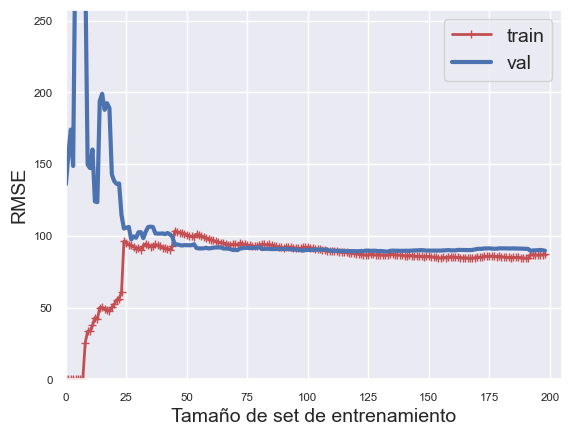

In [891]:
plot_learning_curves(model_lr, X_train, y_train)
plt.show()

#### Polynomial Regression

In [892]:
regression = LinearRegression()

In [893]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)

In [894]:
model_poly_regression = Pipeline([
     ("poly_features", poly_features),
    ('scaler', scaler),   
    ('regression', regression)  
])

In [895]:
model_poly_regression.fit(X_train, y_train)

Pipeline(steps=[('poly_features', PolynomialFeatures(include_bias=False)),
                ('scaler', StandardScaler()),
                ('regression', LinearRegression())])

In [896]:
display_metrics(model_poly_regression, X_train, y_train)

RMSE:  45.274273221605085
NRMSE: 0.26352949605861187
MAPE: 1.3812234469729034
MAE 36.19615493253649
R2: 0.846404104520777


In [897]:
poly_scores = cross_val_score(model_poly_regression, X_train, y_train,
                               scoring = 'neg_mean_squared_error', cv =5)

In [898]:
display_scores(vfporpob_rmse, vfporpob_std, poly_scores)

CV_Scores: [380.18356367  87.94851247 109.93578681 135.32396368 102.2655824 ]
CV_RMSE: 163.13148180773953
CV_NRMSE: 0.9495449431438517
CV_Standard Dev: 109.61002039938772


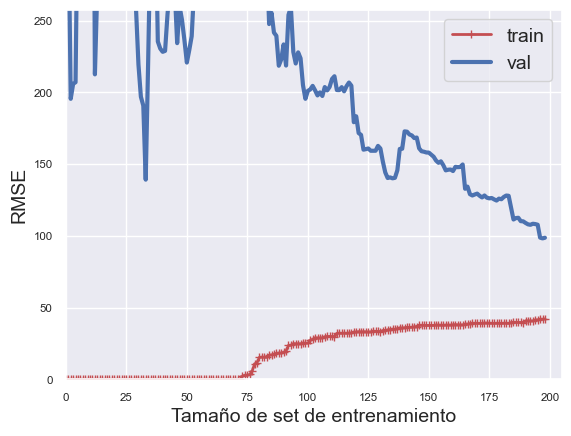

In [899]:
plot_learning_curves(model_poly_regression, X_train, y_train)
plt.show()    

#### Ridge

In [900]:
ridge_reg = Ridge(alpha=1, solver="cholesky")

In [901]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)

In [902]:
model_ridge_reg = Pipeline([
    ("poly_features", poly_features),
    ('scaler', scaler),   
    ('ridge_reg', ridge_reg)  
])

In [903]:
model_ridge_reg.fit(X_train, y_train)

Pipeline(steps=[('poly_features', PolynomialFeatures(include_bias=False)),
                ('scaler', StandardScaler()),
                ('ridge_reg', Ridge(alpha=1, solver='cholesky'))])

In [904]:
display_metrics(model_ridge_reg, X_train, y_train)

RMSE:  65.59529318093671
NRMSE: 0.3818127454233778
MAPE: 2.0964985241199106
MAE 51.82701837140863
R2: 0.6775799875152999


In [905]:
ridge_scores = cross_val_score(model_ridge_reg, X_train, y_train,
                               scoring = 'neg_mean_squared_error', cv =5)

In [906]:
display_scores(vfporpob_rmse, vfporpob_std, ridge_scores)

CV_Scores: [338.7114384   61.00949252  73.14602742  92.87268817  91.019617  ]
CV_RMSE: 131.35185270124086
CV_NRMSE: 0.7645641792921051
CV_Standard Dev: 104.34682443763789


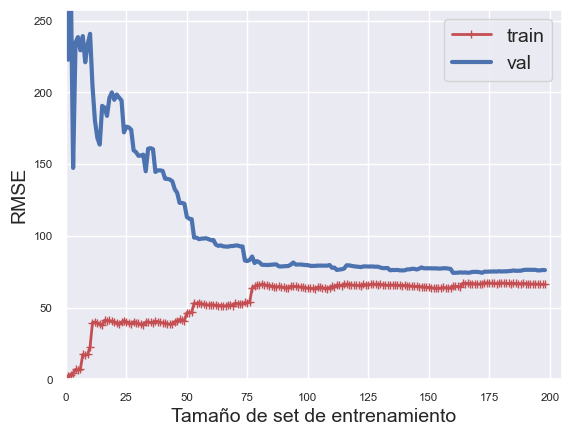

In [907]:
plot_learning_curves(model_ridge_reg, X_train, y_train)
plt.show()  

#### Lasso

In [908]:
lasso_reg = Lasso(alpha=1, max_iter=100_000, tol = 0.01)

In [909]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)

In [910]:
model_lasso_reg = Pipeline([
    ("poly_features", poly_features),
    ('scaler', scaler),   
    ('lasso_reg', lasso_reg)  
])

In [911]:
model_lasso_reg.fit(X_train,y_train)

Pipeline(steps=[('poly_features', PolynomialFeatures(include_bias=False)),
                ('scaler', StandardScaler()),
                ('lasso_reg', Lasso(alpha=1, max_iter=100000, tol=0.01))])

In [912]:
display_metrics(model_lasso_reg, X_train, y_train)

RMSE:  78.47316384422153
NRMSE: 0.45677140350259665
MAPE: 2.960041918707426
MAE 62.578320319369155
R2: 0.538556045299627


In [913]:
lasso_scores = cross_val_score(model_lasso_reg, X_train, y_train,
                               scoring = 'neg_mean_squared_error', cv =5)

In [914]:
display_scores(vfporpob_rmse, vfporpob_std, lasso_scores)

CV_Scores: [217.56352608  72.48308052  84.45466724  95.81754738  93.96763483]
CV_RMSE: 112.85729120854577
CV_NRMSE: 0.6569122586055215
CV_Standard Dev: 53.00444046582391


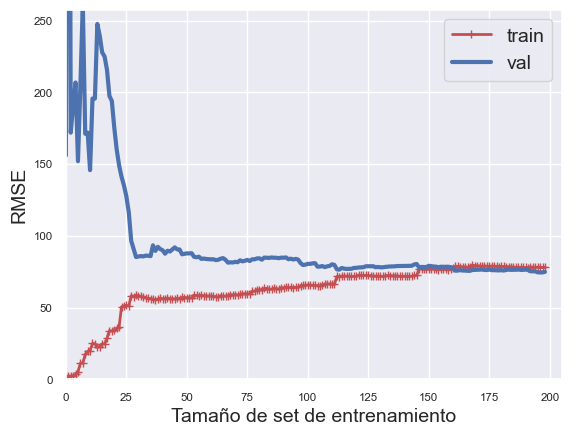

In [915]:
plot_learning_curves(model_lasso_reg, X_train, y_train)
plt.show()  

### K nearest neighbors

In [916]:
neig_reg = KNeighborsRegressor(n_neighbors=4)

In [917]:
model_neig_reg = Pipeline([
    ('scaler', scaler),   
    ('neig_reg', neig_reg)  
])

In [918]:
model_neig_reg.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('neig_reg', KNeighborsRegressor(n_neighbors=4))])

In [919]:
display_metrics(model_neig_reg, X_train, y_train)

RMSE:  43.251881499851976
NRMSE: 0.25175769204404463
MAPE: 0.7056478806549662
MAE 31.39319624290651
R2: 0.8598198099769349


In [920]:
neig_reg_scores = cross_val_score(model_neig_reg, X_train, y_train,
                               scoring = 'neg_mean_squared_error', cv =5)

In [921]:
display_scores(vfporpob_rmse, vfporpob_std, neig_reg_scores)

CV_Scores: [76.94364707 60.78402649 44.99761758 59.11690714 73.46481595]
CV_RMSE: 63.06140284923898
CV_NRMSE: 0.3670636441200478
CV_Standard Dev: 11.38414279998414


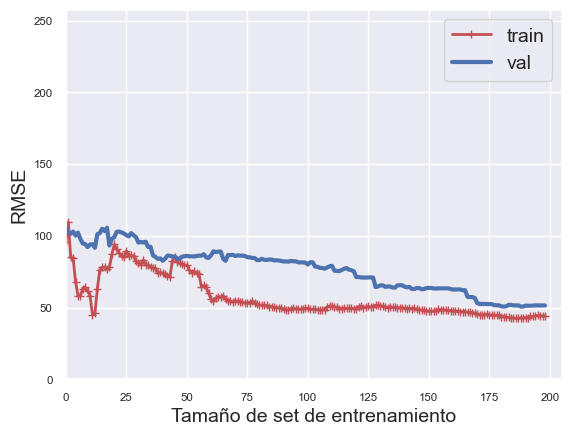

In [922]:
plot_learning_curves(model_neig_reg, X_train, y_train)
plt.savefig('learning-curves/vfporpob-knn.png', dpi = 200, bbox_inches = 'tight')
plt.show()  

### Support Vector Machines

#### LinearSVR

In [923]:
svm_reg = LinearSVR(epsilon=1.5, dual=True)

In [924]:
model_lin_svm = Pipeline([
    ('scaler', scaler),   
    ('svm_reg', svm_reg)  
])

In [925]:
model_lin_svm.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_reg', LinearSVR(dual=True, epsilon=1.5))])

In [926]:
display_metrics(model_lin_svm, X_train, y_train)

RMSE:  114.52845959927683
NRMSE: 0.6666396850775664
MAPE: 2.157531677396838
MAE 86.59101538177939
R2: 0.017113263605419093


In [927]:
svm_lin_scores = cross_val_score(model_lin_svm, X_train, y_train,
                               scoring = 'neg_mean_squared_error', cv =5)

In [928]:
display_scores(vfporpob_rmse, vfporpob_std, svm_lin_scores)

CV_Scores: [ 87.47942138 104.75345118 117.46816818 145.93403189 140.44715596]
CV_RMSE: 119.216445717805
CV_NRMSE: 0.6939272047092664
CV_Standard Dev: 21.835960558647482


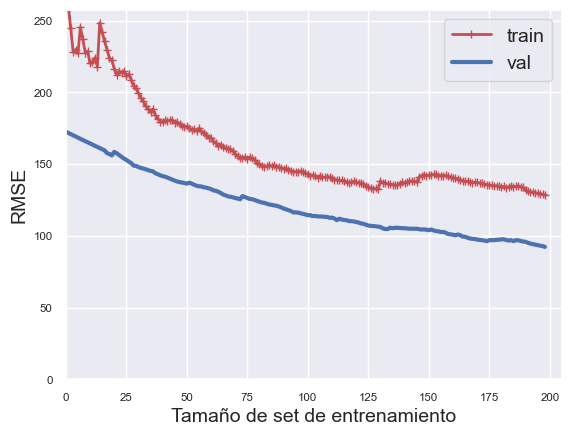

In [929]:
plot_learning_curves(model_lin_svm, X_train, y_train)
plt.show()  

#### Non linear SVR

In [930]:
svm_poly_reg = SVR(kernel="poly", degree=2, C=100, epsilon=0.1)

In [931]:
model_poly_svm = Pipeline([
    ('scaler', scaler),   
    ('svm_poly_reg', svm_poly_reg)  
])

In [932]:
model_poly_svm.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_poly_reg', SVR(C=100, degree=2, kernel='poly'))])

In [933]:
display_metrics(model_poly_svm, X_train, y_train)

RMSE:  76.23380403949814
NRMSE: 0.4437366860164847
MAPE: 1.9982143343514447
MAE 52.056266535166245
R2: 0.5645163860410967


In [934]:
poly_svm_scores = cross_val_score(model_poly_svm, X_train, y_train,
                               scoring = 'neg_mean_squared_error', cv =5)

In [935]:
display_scores(vfporpob_rmse, vfporpob_std, poly_svm_scores)

CV_Scores: [ 95.06663392  79.93783648  72.5248501  102.23493891 110.15506571]
CV_RMSE: 91.98386502446003
CV_NRMSE: 0.5354135996124985
CV_Standard Dev: 13.91790630660344


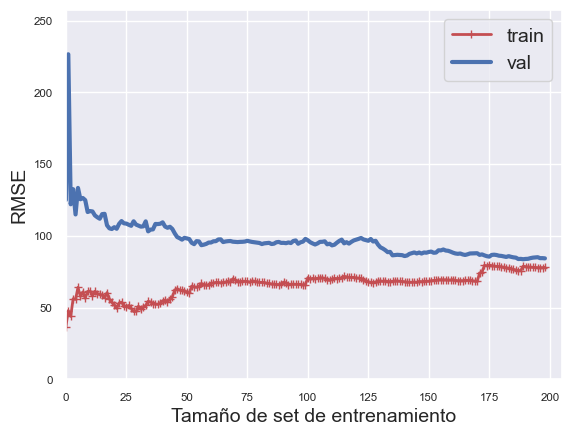

In [936]:
plot_learning_curves(model_poly_svm, X_train, y_train)
plt.show()

#### Gaussian Kernel

In [937]:
svm_gauss_reg = SVR(kernel="rbf", gamma=0.1, C=100)

In [938]:
model_gauss_svm = Pipeline([
    ('scaler', scaler),   
    ('svm_gauss_reg', svm_gauss_reg)  
])

In [939]:
model_gauss_svm.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_gauss_reg', SVR(C=100, gamma=0.1))])

In [940]:
display_metrics(model_gauss_svm, X_train, y_train)

RMSE:  50.212187000506354
NRMSE: 0.292271778090734
MAPE: 0.7397915280545648
MAE 29.75262464539755
R2: 0.811072616237129


In [941]:
gauss_svm_scores = cross_val_score(model_gauss_svm, X_train, y_train,
                               scoring = 'neg_mean_squared_error', cv =5)

In [942]:
display_scores(vfporpob_rmse, vfporpob_std, gauss_svm_scores)

CV_Scores: [70.17847822 54.03469712 52.70549884 78.47174624 81.64630918]
CV_RMSE: 67.4073459185145
CV_NRMSE: 0.3923602221863537
CV_Standard Dev: 12.064992723443819


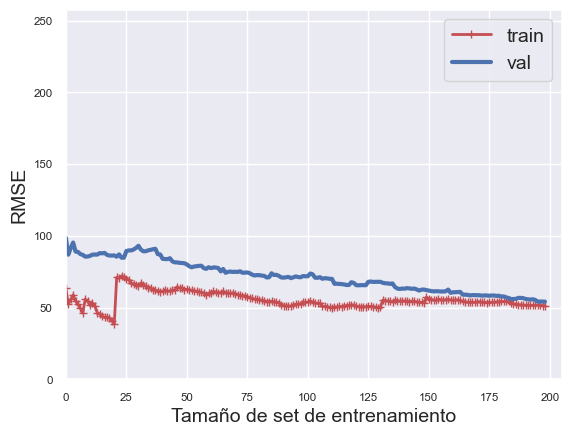

In [943]:
plot_learning_curves(model_gauss_svm, X_train, y_train)
plt.savefig('learning-curves/vfporpob-svr.png', dpi = 200, bbox_inches = 'tight')
plt.show()

### Decision Tree

In [944]:
tree_reg = DecisionTreeRegressor(max_depth=5)

In [945]:
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5)

In [946]:
display_metrics(tree_reg, X_train, y_train)

RMSE:  54.56502822942121
NRMSE: 0.31760850850856603
MAPE: 0.7877317858467863
MAE 41.27984524357057
R2: 0.7768970032117619


In [947]:
tree_reg_scores = cross_val_score(tree_reg, X_train, y_train,
                               scoring = 'neg_mean_squared_error', cv =5)

In [948]:
display_scores(vfporpob_rmse, vfporpob_std, tree_reg_scores)

CV_Scores: [127.5745679   71.15528871  84.37638216  95.72377108 110.24171659]
CV_RMSE: 97.81434528775594
CV_NRMSE: 0.5693512736209866
CV_Standard Dev: 19.676204201380322


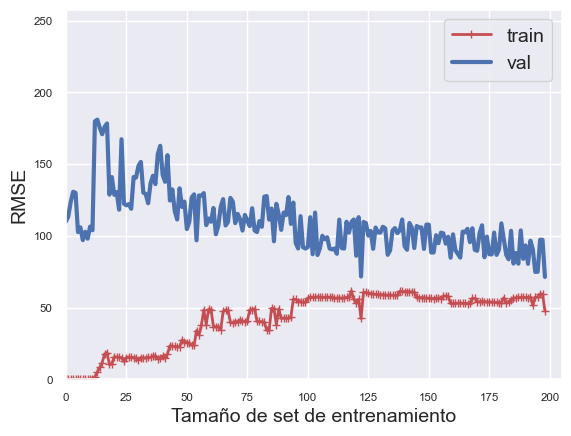

In [949]:
plot_learning_curves(tree_reg, X_train, y_train)
plt.show()

### Random Forest

In [950]:
forest_reg = RandomForestRegressor(n_estimators = 50,  max_leaf_nodes=64, n_jobs=-1, random_state=42)

In [951]:
forest_reg.fit(X_train, y_train)

RandomForestRegressor(max_leaf_nodes=64, n_estimators=50, n_jobs=-1,
                      random_state=42)

In [952]:
display_metrics(tree_reg, X_train, y_train)

RMSE:  53.192253507285855
NRMSE: 0.30961795217305993
MAPE: 0.648407485210037
MAE 38.65581050688394
R2: 0.7879816672945005


In [953]:
forest_reg_scores = cross_val_score(forest_reg, X_train, y_train,
                               scoring = 'neg_mean_squared_error', cv =5)

In [954]:
display_scores(vfporpob_rmse, vfporpob_std, forest_reg_scores)

CV_Scores: [90.22514752 56.60730018 63.49499137 69.76927835 71.85224755]
CV_RMSE: 70.3897929967817
CV_NRMSE: 0.40972025294179315
CV_Standard Dev: 11.255758512547464


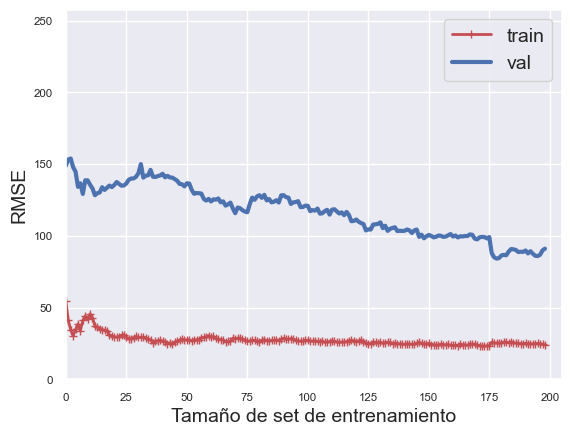

In [955]:
plot_learning_curves(forest_reg, X_train, y_train)
plt.show()

#### Extra Trees

In [956]:
extra_trees_reg = ExtraTreesRegressor(n_estimators = 50, n_jobs=-1, random_state=42)

In [957]:
extra_trees_reg.fit(X_train, y_train)

ExtraTreesRegressor(n_estimators=50, n_jobs=-1, random_state=42)

In [958]:
display_metrics(extra_trees_reg, X_train, y_train)

RMSE:  1.3259393066733672e-13
NRMSE: 7.717939845916532e-16
MAPE: 5.733825595737053e-16
MAE 9.719265323115955e-14
R2: 1.0


In [959]:
extra_trees_reg_scores = cross_val_score(extra_trees_reg, X_train, y_train,
                               scoring = 'neg_mean_squared_error', cv =5)

In [960]:
display_scores(vfporpob_rmse, vfporpob_std, extra_trees_reg_scores)

CV_Scores: [72.40022797 47.53123117 50.3220117  66.6022068  70.86876643]
CV_RMSE: 61.54488881270921
CV_NRMSE: 0.358236419487278
CV_Standard Dev: 10.513658911600931


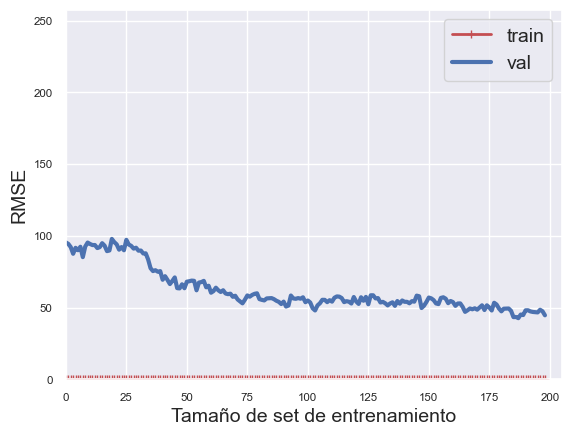

In [961]:
plot_learning_curves(extra_trees_reg, X_train, y_train)
plt.savefig('learning-curves/vfporpob-et.png', dpi = 200, bbox_inches = 'tight')
plt.show()

### Boosting

#### Adaboost

In [962]:
model_adaboost = AdaBoostRegressor(n_estimators=100, learning_rate=0.5, random_state=42)

In [963]:
model_adaboost.fit(X_train, y_train)

AdaBoostRegressor(learning_rate=0.5, n_estimators=100, random_state=42)

In [964]:
display_metrics(model_adaboost, X_train, y_train)

RMSE:  57.28462696170495
NRMSE: 0.33343856899109114
MAPE: 2.1503093813958714
MAE 49.99312095051125
R2: 0.754103235658159


In [965]:
adaboost_scores = cross_val_score(model_adaboost, X_train, y_train,
                               scoring = 'neg_mean_squared_error', cv =5)

In [966]:
display_scores(vfporpob_rmse, vfporpob_std, adaboost_scores)

CV_Scores: [88.1925394  66.73077507 70.96133977 77.24765025 78.98694338]
CV_RMSE: 76.42384957646644
CV_NRMSE: 0.4448428905123648
CV_Standard Dev: 7.342273006136795


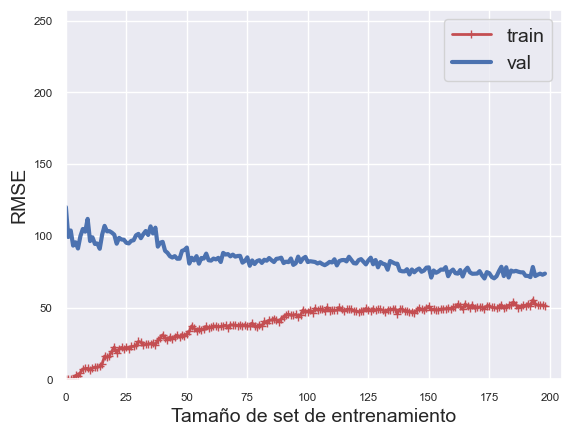

In [967]:
plot_learning_curves(model_adaboost, X_train, y_train)
plt.show()

#### Gradient Boosting

In [968]:
model_gbrt = GradientBoostingRegressor(max_depth=4, n_estimators=50, random_state=42)

In [969]:
model_gbrt.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=4, n_estimators=50, random_state=42)

In [970]:
display_metrics(model_gbrt, X_train, y_train)

RMSE:  22.80973115457516
NRMSE: 0.13276937493784258
MAPE: 0.4152540076786798
MAE 17.600052907630577
R2: 0.9610132558072428


In [971]:
gbrt_scores = cross_val_score(model_gbrt, X_train, y_train,
                               scoring = 'neg_mean_squared_error', cv =5)

In [972]:
display_scores(vfporpob_rmse, vfporpob_std, gbrt_scores)

CV_Scores: [72.36385982 57.43207159 54.65797647 65.31993185 68.29342041]
CV_RMSE: 63.61345202947359
CV_NRMSE: 0.3702769754871734
CV_Standard Dev: 6.630140581194106


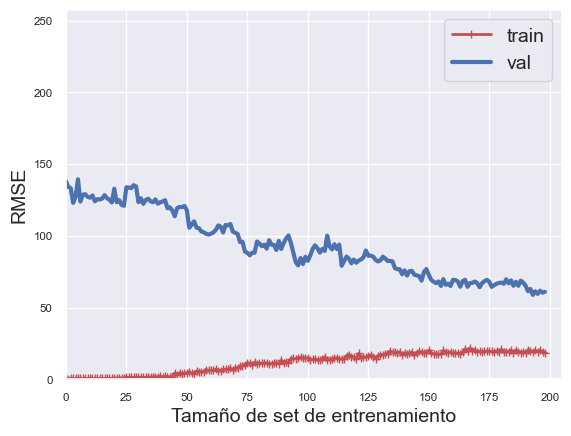

In [973]:
plot_learning_curves(model_gbrt, X_train, y_train)
plt.savefig('learning-curves/vfporpob-gb.png', dpi = 200, bbox_inches = 'tight')
plt.show()

### Selección de los mejores modelos

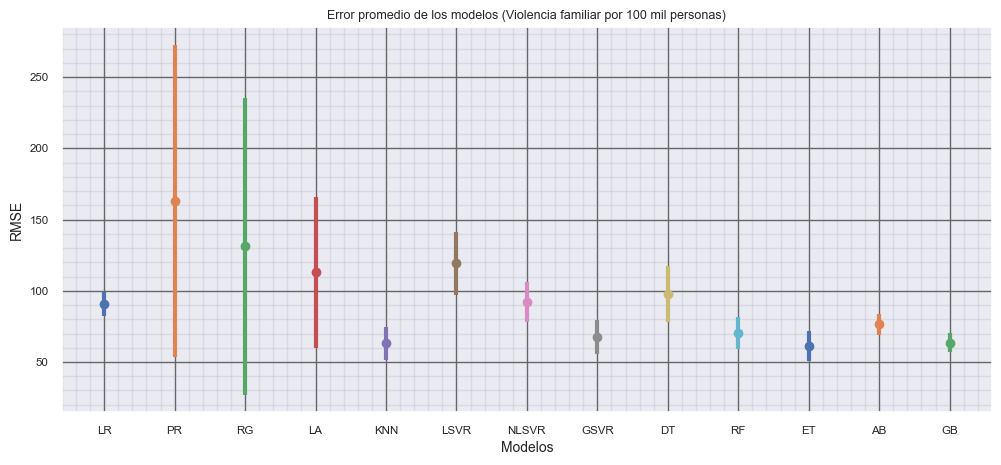

In [974]:
# Grafica para comparar visualmente los resultados
plt.figure(figsize=(12, 5))
for i, (model_mean, model_sd) in enumerate(zip(vfporpob_rmse, vfporpob_std)):
    plt.errorbar(i, model_mean,
                 xerr=0,
                 yerr=model_sd,
                 fmt='o',
                 linewidth=3)
plt.xticks(list(range(0, len(models))), models)
plt.title("Error promedio de los modelos (Violencia familiar por 100 mil personas)")
plt.grid('visible',
         which='major',
         color='#666',
         linestyle='-')
plt.minorticks_on ()
plt.grid('visible',
         which='minor',
         color='#999',
         linestyle='-',
         alpha=0.2)
plt.xlabel("Modelos", fontsize=10)
plt.ylabel("RMSE", fontsize=10)
plt.savefig('box-plots/bp_vfporpob.png', dpi = 200, bbox_inches = 'tight')
plt.show()

### Tuning de los mejores modelos

#### K Nearest Neighbors

In [975]:
n_neighbors=[1, 2, 3, 4, 5, 6, 8, 10]  

params = {'neig_reg__n_neighbors': n_neighbors}

In [976]:
grid_search = GridSearchCV(model_neig_reg, param_grid = params, cv = 5, scoring = 'neg_mean_squared_error',
                           n_jobs = -1, verbose = 2
                   )

In [977]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('neig_reg',
                                        KNeighborsRegressor(n_neighbors=4))]),
             n_jobs=-1,
             param_grid={'neig_reg__n_neighbors': [1, 2, 3, 4, 5, 6, 8, 10]},
             scoring='neg_mean_squared_error', verbose=2)

In [978]:
knn_tuned = grid_search.best_estimator_

In [979]:
grid_search.best_params_

{'neig_reg__n_neighbors': 4}

In [980]:
display_metrics(knn_tuned, X_test, y_test)

RMSE:  70.39101731620131
NRMSE: 0.30004865113078316
MAPE: 0.7898975777574903
MAE 58.10653612308056
R2: 0.6660683746897966


#### Kernelized SVR

In [981]:
gamma = [0.01, 0.1, 0.5, 1]
C = [10, 50, 100, 200, 500, 600]

params = {'svm_gauss_reg__gamma':gamma,
          'svm_gauss_reg__C':C,
         }

In [982]:
grid_search = GridSearchCV( model_gauss_svm, param_grid = params, cv = 5, scoring = 'neg_mean_squared_error',
                    n_jobs = -1, verbose = 2
                   )

In [983]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svm_gauss_reg',
                                        SVR(C=100, gamma=0.1))]),
             n_jobs=-1,
             param_grid={'svm_gauss_reg__C': [10, 50, 100, 200, 500, 600],
                         'svm_gauss_reg__gamma': [0.01, 0.1, 0.5, 1]},
             scoring='neg_mean_squared_error', verbose=2)

In [984]:
gauss_svr_tuned = grid_search.best_estimator_

In [985]:
grid_search.best_params_

{'svm_gauss_reg__C': 500, 'svm_gauss_reg__gamma': 0.1}

In [986]:
display_metrics(gauss_svr_tuned, X_test, y_test)

RMSE:  62.19784334851486
NRMSE: 0.265124439331981
MAPE: 1.115597146320478
MAE 48.02426823230009
R2: 0.7392803766707757


#### Extra trees

In [987]:
param_grid = {
    'n_estimators': [10, 50, 100, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

In [988]:
grid_search = GridSearchCV(ExtraTreesRegressor(random_state=42), param_grid, cv=5, scoring = 'neg_mean_squared_error',
                    n_jobs = -1, verbose = 2)

In [989]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5, estimator=ExtraTreesRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 50, 100, 500]},
             scoring='neg_mean_squared_error', verbose=2)

In [990]:
extra_trees_tuned = grid_search.best_estimator_

In [991]:
grid_search.best_params_

{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}

In [992]:
display_metrics(extra_trees_tuned, X_test, y_test)

RMSE:  47.297650628387224
NRMSE: 0.20161089885877048
MAPE: 1.5806244668485971
MAE 38.370338513393584
R2: 0.849234419038352


In [993]:
for name, score in zip(X.keys().to_list(), extra_trees_tuned.feature_importances_):
    print(name,':', score)

Poblacion : 0.0841589008506555
PIB : 0.058301746257296554
EficienciaPrimaria : 0.07860025682358955
EficienciaSecundaria : 0.05816753004713737
EficienciaBachillerato : 0.056566095210761363
Desocupacion : 0.05497449663402814
MedianaSalarios : 0.1762640263108188
Pobreza : 0.15711648819000812
MedicosPorPob : 0.10317110221347409
Internamiento : 0.03793914705619192
PIBPerCapita : 0.13474021040603856


#### Gradient Boosting

In [994]:
param_grid = {
    'n_estimators': [10, 50, 100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

In [995]:
grid_search = GridSearchCV(GradientBoostingRegressor(random_state=42), param_grid, cv=5, scoring = 'neg_mean_squared_error',
                    n_jobs = -1, verbose = 2)

In [996]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 45 candidates, totalling 225 fits


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [10, 50, 100, 200, 300]},
             scoring='neg_mean_squared_error', verbose=2)

In [997]:
gbrt_tuned = grid_search.best_estimator_

In [998]:
grid_search.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300}

In [999]:
display_metrics(gbrt_tuned, X_test, y_test)

RMSE:  56.03851235924768
NRMSE: 0.23886968374440565
MAPE: 1.232934202539158
MAE 42.17109532180865
R2: 0.7883607260705718


### Modelo con mejor desempeño

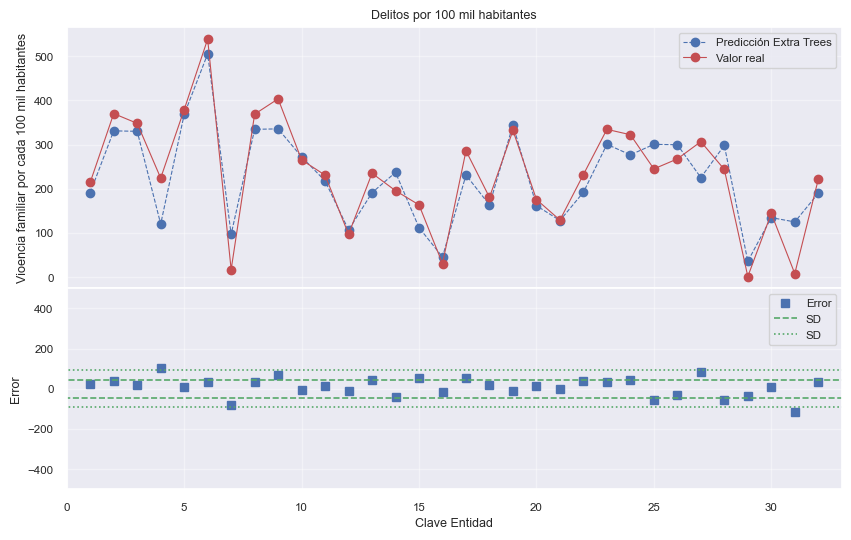

In [1000]:
y_real  = y_test #Valores reales de target
muestra_datos = X_test #Datos para predicción

especie = range(1, len(y_real)+1) #Cantidad de eleemntos
y_prediccion = list(extra_trees_tuned.predict(muestra_datos)) #Valores de prediccion  de target


list_delta=[]

for i in range(len(y_real)):
    delta= y_real[i] -y_prediccion[i]
    list_delta.append(delta)

list_delta = np.array(list_delta)
std_list = np.std(list_delta)


fig, axs = plt.subplots(2, 1, sharex=True,gridspec_kw={'height_ratios': [1.3, 1], 'hspace': 0}, figsize=(10, 6))
fig.subplots_adjust(hspace=0)

axs[0].plot(especie, y_prediccion, 'ob--', linewidth=0.8 ,label='Predicción Extra Trees')
axs[0].plot(especie, y_real, 'or-' , linewidth=0.8 ,  label='Valor real')
axs[0].grid (linestyle='-', alpha=0.4)
axs[0].set_ylabel('Vioencia familiar por cada 100 mil habitantes')
axs[0].set_title('Delitos por 100 mil habitantes')
axs[0].legend()


axs[1].plot(especie, list_delta  , 's', linewidth=0.8 ,label='Error')
axs[1].plot([-5,40,40,-5], [std_list,std_list,-std_list,-std_list]  , 'g--', linewidth=1.18 ,label='SD')
axs[1].plot([-5,40,40,-5], [2*std_list,2*std_list,-2*std_list,-2*std_list]  , 'g:', linewidth=1.18 ,label='SD')

axs[1].set_ylim(-500, 500)
axs[1].set_xlim(0, 33)

axs[1].grid (linestyle='-', alpha=0.4)

axs[1].set_xlabel('Clave Entidad')
axs[1].set_ylabel('Error')
axs[1].legend(loc='upper right')

plt.savefig('results/violfamporpob.png', dpi = 200, bbox_inches = 'tight')
plt.show()

In [1001]:
#Error para Yucatan
print('Valor real:', y_real[30])
print('Valor predicho: ', y_prediccion[30])


Valor real: 7.940771554164929
Valor predicho:  124.7976447369669
